# Network analysis `Yim-Choe-Bae-et_al-2024`
> Contact; 'ggtaeyun@gmail.com' (Choe)

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
import function_compilation as fc

## Load data

In [2]:
# common type

com_fname = r'directory\230724_neurontype_new.csv'
com_id_df = pd.read_csv(com_fname)
com_id = np.array(com_id_df[['Neuron','Common_id']])
com_type = np.array(com_id_df['Cook_typecode'])

# color code
com_type_color = []
for ii in range(com_type.shape[0]):
    if com_type[ii]==1:
        com_type_color.append('#FCB0E5')  # sensory
    elif com_type[ii]==2:
        com_type_color.append('#D65E00')  # inter
    elif com_type[ii]==3:
        com_type_color.append('#0174B3')  # motor
    elif com_type[ii]==4:
        com_type_color.append('#BCBD22')  # modulatory (witvliet type)
    else:
        com_type_color.append('#808080')  # others


In [3]:
# type-wise index

# w/ muscle
sen_idx_222 = np.where(com_type==1)[0].astype(int); int_idx_222 = np.where(com_type==2)[0].astype(int)
mot_idx_222 = np.where(com_type==3)[0].astype(int); mus_idx_222 = np.where(com_type==0)[0].astype(int)

# w/o muscle
sen_idx_180 = np.where(com_type[:180]==1)[0].astype(int); int_idx_180 = np.where(com_type[:180]==2)[0].astype(int)
mot_idx_180 = np.where(com_type[:180]==3)[0].astype(int); mus_idx_180 = np.where(com_type[:180]==0)[0].astype(int)


# type-wsie index (witvliet type)

com_type_wit = np.array(com_id_df['Witvliet_typecode'])

sen_idx_180_w = np.where(com_type_wit[:180]==1)[0]; int_idx_180_w = np.where(com_type_wit[:180]==2)[0]
mot_idx_180_w = np.where(com_type_wit[:180]==3)[0]; mod_idx_180_w = np.where(com_type_wit[:180]==4)[0]


In [4]:
# L/R/D/V index

LRDV_df = pd.read_csv(r'directory\LRDV_info.csv')

LR_id_temp = np.array(LRDV_df['LR_id'])
DV_id_temp = np.array(LRDV_df['DV_id'])
L_idx_temp = np.array(LRDV_df['L_index'])
R_idx_temp = np.array(LRDV_df['R_index'])
D_idx_temp = np.array(LRDV_df['D_index'])
V_idx_temp = np.array(LRDV_df['V_index'])

LR_id = [str(x) for x in LR_id_temp if type(x) == str]
DV_id = [str(x) for x in DV_id_temp if type(x) == str]
com_L_idx = np.array([int(x) for x in L_idx_temp if np.isnan(x) == False])
com_R_idx = np.array([int(x) for x in R_idx_temp if np.isnan(x) == False])
com_D_idx = np.array([int(x) for x in D_idx_temp if np.isnan(x) == False])
com_V_idx = np.array([int(x) for x in V_idx_temp if np.isnan(x) == False])


In [5]:
# normalized matrix
    # from matrix by HSY
    # Dataset order along axis 2 : witvliet dataset 1 ~ 8, JSH, N2U, Dauer (11 datasets)

norm180_comp = # numpy array;  shape=(180,180,11)
norm222_comp = # numpy array;  shape=(222,222,11)

# binarize
norm180_comp_bi = np.copy(norm180_comp); norm180_comp_bi[norm180_comp_bi!=0] = 1
norm222_comp_bi = np.copy(norm222_comp); norm222_comp_bi[norm222_comp_bi!=0] = 1


---

In [6]:
# common id matched & normalized data

# without muscle (180 X 180)
dauer_G_180 = nx.from_numpy_array(norm180_comp[:,:,10], parallel_edges=False, create_using=nx.DiGraph)
dset1_G_180 = nx.from_numpy_array(norm180_comp[:,:,0], parallel_edges=False, create_using=nx.DiGraph)
dset2_G_180 = nx.from_numpy_array(norm180_comp[:,:,1], parallel_edges=False, create_using=nx.DiGraph)
dset3_G_180 = nx.from_numpy_array(norm180_comp[:,:,2], parallel_edges=False, create_using=nx.DiGraph)
dset4_G_180 = nx.from_numpy_array(norm180_comp[:,:,3], parallel_edges=False, create_using=nx.DiGraph)
dset5_G_180 = nx.from_numpy_array(norm180_comp[:,:,4], parallel_edges=False, create_using=nx.DiGraph)
dset6_G_180 = nx.from_numpy_array(norm180_comp[:,:,5], parallel_edges=False, create_using=nx.DiGraph)
dset7_G_180 = nx.from_numpy_array(norm180_comp[:,:,6], parallel_edges=False, create_using=nx.DiGraph)
dset8_G_180 = nx.from_numpy_array(norm180_comp[:,:,7], parallel_edges=False, create_using=nx.DiGraph)
jsh_G_180 = nx.from_numpy_array(norm180_comp[:,:,8], parallel_edges=False, create_using=nx.DiGraph)
n2u_G_180 = nx.from_numpy_array(norm180_comp[:,:,9], parallel_edges=False, create_using=nx.DiGraph)

dauer_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,10], parallel_edges=False, create_using=nx.DiGraph)
dset1_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,0], parallel_edges=False, create_using=nx.DiGraph)
dset2_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,1], parallel_edges=False, create_using=nx.DiGraph)
dset3_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,2], parallel_edges=False, create_using=nx.DiGraph)
dset4_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,3], parallel_edges=False, create_using=nx.DiGraph)
dset5_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,4], parallel_edges=False, create_using=nx.DiGraph)
dset6_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,5], parallel_edges=False, create_using=nx.DiGraph)
dset7_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,6], parallel_edges=False, create_using=nx.DiGraph)
dset8_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,7], parallel_edges=False, create_using=nx.DiGraph)
jsh_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,8], parallel_edges=False, create_using=nx.DiGraph)
n2u_G_180bi = nx.from_numpy_array(norm180_comp_bi[:,:,9], parallel_edges=False, create_using=nx.DiGraph)


---
---

### Degree distribution (IN, OUT)

In [7]:
# OUT
dauer_out_deg = np.sum(norm180_comp_bi[:,:,10], axis=1)
dset1_out_deg = np.sum(norm180_comp_bi[:,:,0], axis=1); dset2_out_deg = np.sum(norm180_comp_bi[:,:,1], axis=1)
dset3_out_deg = np.sum(norm180_comp_bi[:,:,2], axis=1); dset4_out_deg = np.sum(norm180_comp_bi[:,:,3], axis=1)
dset5_out_deg = np.sum(norm180_comp_bi[:,:,4], axis=1); dset6_out_deg = np.sum(norm180_comp_bi[:,:,5], axis=1)
dset7_out_deg = np.sum(norm180_comp_bi[:,:,6], axis=1); dset8_out_deg = np.sum(norm180_comp_bi[:,:,7], axis=1)
jsh_out_deg = np.sum(norm180_comp_bi[:,:,8], axis=1); n2u_out_deg = np.sum(norm180_comp_bi[:,:,9], axis=1)
# IN
dauer_in_deg = np.sum(norm180_comp_bi[:,:,10], axis=0)
dset1_in_deg = np.sum(norm180_comp_bi[:,:,0], axis=0); dset2_in_deg = np.sum(norm180_comp_bi[:,:,1], axis=0)
dset3_in_deg = np.sum(norm180_comp_bi[:,:,2], axis=0); dset4_in_deg = np.sum(norm180_comp_bi[:,:,3], axis=0)
dset5_in_deg = np.sum(norm180_comp_bi[:,:,4], axis=0); dset6_in_deg = np.sum(norm180_comp_bi[:,:,5], axis=0)
dset7_in_deg = np.sum(norm180_comp_bi[:,:,6], axis=0); dset8_in_deg = np.sum(norm180_comp_bi[:,:,7], axis=0)
jsh_in_deg = np.sum(norm180_comp_bi[:,:,8], axis=0); n2u_in_deg = np.sum(norm180_comp_bi[:,:,9], axis=0)

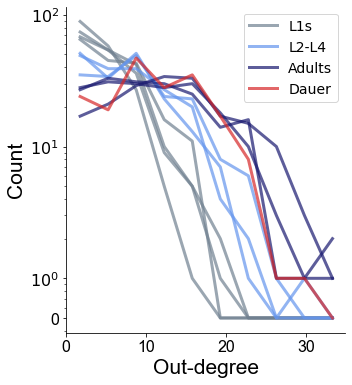

In [8]:
# plot line histogram (OUT-degree)

maxmax = np.max([np.max(dauer_out_deg),np.max(dset1_out_deg),np.max(dset2_out_deg),np.max(dset3_out_deg),\
                 np.max(dset4_out_deg),np.max(dset5_out_deg),np.max(dset6_out_deg),np.max(dset7_out_deg),\
                 np.max(dset8_out_deg),np.max(jsh_out_deg),np.max(n2u_out_deg)])

# =======================================================================================================
# line histogram
bins = np.linspace(0, maxmax+1, 10+1, endpoint=True); lw = 3; adj = 0.5

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,6))

dset1_y,binEdges = np.histogram(dset1_out_deg, bins=bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
dset1_y_adj = np.copy(dset1_y).astype(float); dset1_y_adj[dset1_y_adj==0] = adj  # 0 -> adj (for visualization; y-axis log)
ax1.plot(bincenters, dset1_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw, label="L1s")
dset2_y,_ = np.histogram(dset2_out_deg, bins=bins)
dset2_y_adj = np.copy(dset2_y).astype(float); dset2_y_adj[dset2_y_adj==0] = adj
ax1.plot(bincenters, dset2_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw)
dset3_y,_ = np.histogram(dset3_out_deg, bins=bins)
dset3_y_adj = np.copy(dset3_y).astype(float); dset3_y_adj[dset3_y_adj==0] = adj
ax1.plot(bincenters, dset3_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw)
dset4_y,_ = np.histogram(dset4_out_deg, bins=bins)
dset4_y_adj = np.copy(dset4_y).astype(float); dset4_y_adj[dset4_y_adj==0] = adj
ax1.plot(bincenters, dset4_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw)
dset5_y,_ = np.histogram(dset5_out_deg, bins=bins)
dset5_y_adj = np.copy(dset5_y).astype(float); dset5_y_adj[dset5_y_adj==0] = adj
ax1.plot(bincenters, dset5_y_adj, color="cornflowerblue", alpha=0.7, linestyle='solid', linewidth=lw, label="L2-L4")
dset6_y,_ = np.histogram(dset6_out_deg, bins=bins)
dset6_y_adj = np.copy(dset6_y).astype(float); dset6_y_adj[dset6_y_adj==0] = adj
ax1.plot(bincenters, dset6_y_adj, color="cornflowerblue", alpha=0.7, linestyle='solid', linewidth=lw)
jsh_y,_ = np.histogram(jsh_out_deg, bins=bins)
jsh_y_adj = np.copy(jsh_y).astype(float); jsh_y_adj[jsh_y_adj==0] = adj
ax1.plot(bincenters, jsh_y_adj, color="cornflowerblue", alpha=0.7, linestyle='solid', linewidth=lw)
dset7_y,_ = np.histogram(dset7_out_deg, bins=bins)
dset7_y_adj = np.copy(dset7_y).astype(float); dset7_y_adj[dset7_y_adj==0] = adj
ax1.plot(bincenters, dset7_y_adj, color="midnightblue", alpha=0.7, linestyle='solid', linewidth=lw, label="Adults")
dset8_y,_ = np.histogram(dset8_out_deg, bins=bins)
dset8_y_adj = np.copy(dset8_y).astype(float); dset8_y_adj[dset8_y_adj==0] = adj
ax1.plot(bincenters, dset8_y_adj, color="midnightblue", alpha=0.7, linestyle='solid', linewidth=lw)
n2u_y,_ = np.histogram(n2u_out_deg, bins=bins)
n2u_y_adj = np.copy(n2u_y).astype(float); n2u_y_adj[n2u_y_adj==0] = adj
ax1.plot(bincenters, n2u_y_adj, color="midnightblue", alpha=0.7, linestyle='solid', linewidth=lw)
dauer_y,_ = np.histogram(dauer_out_deg, bins=bins)
dauer_y_adj = np.copy(dauer_y).astype(float); dauer_y_adj[dauer_y_adj==0] = adj
ax1.plot(bincenters, dauer_y_adj, color="tab:red", alpha=0.7, linestyle='solid', linewidth=lw, label="Dauer")

ax1.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=14)
ax1.set_xlabel("Out-degree", fontsize=21, fontname='Arial')
ax1.set_xticks(np.arange(0,40,10))
ax1.set_xticklabels(["0","10","20","30"], fontsize=16, fontname='Arial')
ax1.set_ylabel("Count", fontsize=21, fontname='Arial')
ax1.set_yscale('log')
ax1.set_yticks([0.5,1,10,100])
ax1.set_yticklabels(["0","$10^0$","$10^1$","$10^2$"], fontsize=16, fontname='Arial')
ax1.spines[['right','top']].set_visible(False)

# plt.savefig(r'D:\fig_5b1.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


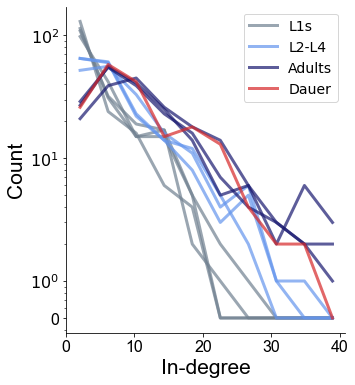

In [9]:
# plot line histogram (IN-degree)

maxmax = np.max([np.max(dauer_in_deg),np.max(dset1_in_deg),np.max(dset2_in_deg),np.max(dset3_in_deg),\
                 np.max(dset4_in_deg),np.max(dset5_in_deg),np.max(dset6_in_deg),np.max(dset7_in_deg),\
                 np.max(dset8_in_deg),np.max(jsh_in_deg),np.max(n2u_in_deg)])

# =======================================================================================================
# line histogram
bins = np.linspace(0, maxmax+1, 10+1, endpoint=True); lw = 3; adj = 0.5

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,6))

dset1_y,binEdges = np.histogram(dset1_in_deg, bins=bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
dset1_y_adj = np.copy(dset1_y).astype(float); dset1_y_adj[dset1_y_adj==0] = adj  # 0 -> adj (y-axis log)
ax1.plot(bincenters, dset1_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw, label="L1s")
dset2_y,_ = np.histogram(dset2_in_deg, bins=bins)
dset2_y_adj = np.copy(dset2_y).astype(float); dset2_y_adj[dset2_y_adj==0] = adj
ax1.plot(bincenters, dset2_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw)
dset3_y,_ = np.histogram(dset3_in_deg, bins=bins)
dset3_y_adj = np.copy(dset3_y).astype(float); dset3_y_adj[dset3_y_adj==0] = adj
ax1.plot(bincenters, dset3_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw)
dset4_y,_ = np.histogram(dset4_in_deg, bins=bins)
dset4_y_adj = np.copy(dset4_y).astype(float); dset4_y_adj[dset4_y_adj==0] = adj
ax1.plot(bincenters, dset4_y_adj, color="slategrey", alpha=0.7, linestyle='solid', linewidth=lw)
dset5_y,_ = np.histogram(dset5_in_deg, bins=bins)
dset5_y_adj = np.copy(dset5_y).astype(float); dset5_y_adj[dset5_y_adj==0] = adj
ax1.plot(bincenters, dset5_y_adj, color="cornflowerblue", alpha=0.7, linestyle='solid', linewidth=lw, label="L2-L4")
dset6_y,_ = np.histogram(dset6_in_deg, bins=bins)
dset6_y_adj = np.copy(dset6_y).astype(float); dset6_y_adj[dset6_y_adj==0] = adj
ax1.plot(bincenters, dset6_y_adj, color="cornflowerblue", alpha=0.7, linestyle='solid', linewidth=lw)
jsh_y,_ = np.histogram(jsh_in_deg, bins=bins)
jsh_y_adj = np.copy(jsh_y).astype(float); jsh_y_adj[jsh_y_adj==0] = adj
ax1.plot(bincenters, jsh_y_adj, color="cornflowerblue", alpha=0.7, linestyle='solid', linewidth=lw)
dset7_y,_ = np.histogram(dset7_in_deg, bins=bins)
dset7_y_adj = np.copy(dset7_y).astype(float); dset7_y_adj[dset7_y_adj==0] = adj
ax1.plot(bincenters, dset7_y_adj, color="midnightblue", alpha=0.7, linestyle='solid', linewidth=lw, label="Adults")
dset8_y,_ = np.histogram(dset8_in_deg, bins=bins)
dset8_y_adj = np.copy(dset8_y).astype(float); dset8_y_adj[dset8_y_adj==0] = adj
ax1.plot(bincenters, dset8_y_adj, color="midnightblue", alpha=0.7, linestyle='solid', linewidth=lw)
n2u_y,_ = np.histogram(n2u_in_deg, bins=bins)
n2u_y_adj = np.copy(n2u_y).astype(float); n2u_y_adj[n2u_y_adj==0] = adj
ax1.plot(bincenters, n2u_y_adj, color="midnightblue", alpha=0.7, linestyle='solid', linewidth=lw)
dauer_y,_ = np.histogram(dauer_in_deg, bins=bins)
dauer_y_adj = np.copy(dauer_y).astype(float); dauer_y_adj[dauer_y_adj==0] = adj
ax1.plot(bincenters, dauer_y_adj, color="tab:red", alpha=0.7, linestyle='solid', linewidth=lw, label="Dauer")

ax1.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=14)
ax1.set_xlabel("In-degree", fontsize=21, fontname='Arial')
ax1.set_xticks(np.arange(0,50,10))
ax1.set_xticklabels(["0","10","20","30","40"], fontsize=16, fontname='Arial')
ax1.set_ylabel("Count", fontsize=21, fontname='Arial')
ax1.set_yscale('log')
ax1.set_yticks([0.5,1,10,100])
ax1.set_yticklabels(["0","$10^0$","$10^1$","$10^2$"], fontsize=16, fontname='Arial')
ax1.spines[['right','top']].set_visible(False)

# plt.savefig(r'D:\fig_5b2.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


### Average degree

In [10]:
# average degree & standard deviation

from scipy.stats import sem

out_deg_comp = np.zeros((11,dauer_out_deg.size))
out_deg_comp[0,:] = np.copy(dset1_out_deg); out_deg_comp[1,:] = np.copy(dset2_out_deg)
out_deg_comp[2,:] = np.copy(dset3_out_deg); out_deg_comp[3,:] = np.copy(dset4_out_deg)
out_deg_comp[4,:] = np.copy(dset5_out_deg); out_deg_comp[5,:] = np.copy(dset6_out_deg)
out_deg_comp[6,:] = np.copy(jsh_out_deg); out_deg_comp[7,:] = np.copy(dset7_out_deg)
out_deg_comp[8,:] = np.copy(dset8_out_deg); out_deg_comp[9,:] = np.copy(n2u_out_deg)
out_deg_comp[10,:] = np.copy(dauer_out_deg)

in_deg_comp = np.zeros((11,dauer_in_deg.size))
in_deg_comp[0,:] = np.copy(dset1_in_deg); in_deg_comp[1,:] = np.copy(dset2_in_deg)
in_deg_comp[2,:] = np.copy(dset3_in_deg); in_deg_comp[3,:] = np.copy(dset4_in_deg)
in_deg_comp[4,:] = np.copy(dset5_in_deg); in_deg_comp[5,:] = np.copy(dset6_in_deg)
in_deg_comp[6,:] = np.copy(jsh_in_deg); in_deg_comp[7,:] = np.copy(dset7_in_deg)
in_deg_comp[8,:] = np.copy(dset8_in_deg); in_deg_comp[9,:] = np.copy(n2u_in_deg)
in_deg_comp[10,:] = np.copy(dauer_in_deg)

out_deg_mean = np.mean(out_deg_comp, axis=1); out_deg_std = np.std(out_deg_comp, axis=1)
out_deg_sem = sem(out_deg_comp, axis=1)
in_deg_mean = np.mean(in_deg_comp, axis=1); in_deg_std = np.std(in_deg_comp, axis=1)
in_deg_sem = sem(in_deg_comp, axis=1)


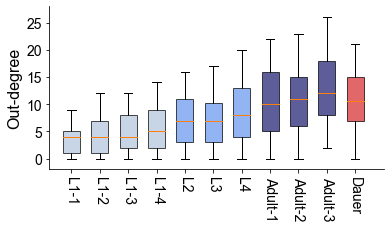

In [11]:
# (plot) OUT, box

label = ["L1-1","L1-2","L1-3","L1-4","L2","L3","L4","Adult-1","Adult-2","Adult-3","Dauer"]

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6,3))
xpos = np.arange(1,12,1); bw = 0.6; lw = 1.0; ba = 0.7

ax1.set_ylabel('Out-degree', fontsize=16, fontname='Arial')
ax1.boxplot(out_deg_comp[0,:], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[1,:], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[2,:], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[3,:], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[4,:], positions=[xpos[4]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "cornflowerblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[5,:], positions=[xpos[5]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "cornflowerblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[6,:], positions=[xpos[6]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "cornflowerblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[7,:], positions=[xpos[7]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "midnightblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[8,:], positions=[xpos[8]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "midnightblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[9,:], positions=[xpos[9]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "midnightblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(out_deg_comp[10,:], positions=[xpos[10]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "tab:red", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, rotation=-90, fontsize=14, fontname='Arial')
ax1.spines[['right','top']].set_visible(False)

plt.xlim(0.2, 12)
plt.ylim(-2,28)
plt.yticks(fontsize=14, fontname="Arial")

# plt.savefig(r'D:\fig_5a1.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


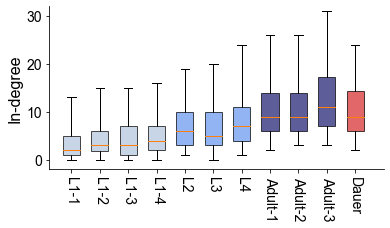

In [12]:
# (plot) IN, box

label = ["L1-1","L1-2","L1-3","L1-4","L2","L3","L4","Adult-1","Adult-2","Adult-3","Dauer"]

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6,3))
xpos = np.arange(1,12,1); bw = 0.6; lw = 1.0; ba = 0.7

ax1.set_ylabel('In-degree', fontsize=16, fontname='Arial')
ax1.boxplot(in_deg_comp[0,:], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[1,:], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[2,:], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[3,:], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "lightsteelblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[4,:], positions=[xpos[4]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "cornflowerblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[5,:], positions=[xpos[5]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "cornflowerblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[6,:], positions=[xpos[6]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "cornflowerblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[7,:], positions=[xpos[7]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "midnightblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[8,:], positions=[xpos[8]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "midnightblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[9,:], positions=[xpos[9]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "midnightblue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(in_deg_comp[10,:], positions=[xpos[10]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": "tab:red", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.set_yticks(np.arange(0,35,10))
ax1.set_yticklabels(["0","10","20","30"], fontsize=14, rotation=0, fontname='Arial')
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, rotation=-90, fontsize=14, fontname='Arial')
ax1.spines[['right','top']].set_visible(False)

plt.xlim(0.2, 12)
plt.ylim(-2,32)

# plt.savefig(r'D:\fig_5a2.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


### Degree by type

In [13]:
# OUT
dauer_out_deg_SS = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dauer_out_deg_SI = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dauer_out_deg_SM = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dauer_out_deg_IS = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dauer_out_deg_II = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180,int_idx_180)], axis=1)
dauer_out_deg_IM = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dauer_out_deg_MS = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dauer_out_deg_MI = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dauer_out_deg_MM = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset1_out_deg_SS = np.sum(norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset1_out_deg_SI = np.sum(norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset1_out_deg_SM = np.sum(norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset1_out_deg_IS = np.sum(norm180_comp_bi[:,:,0][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset1_out_deg_II = np.sum(norm180_comp_bi[:,:,0][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset1_out_deg_IM = np.sum(norm180_comp_bi[:,:,0][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset1_out_deg_MS = np.sum(norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset1_out_deg_MI = np.sum(norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset1_out_deg_MM = np.sum(norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset2_out_deg_SS = np.sum(norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset2_out_deg_SI = np.sum(norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset2_out_deg_SM = np.sum(norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset2_out_deg_IS = np.sum(norm180_comp_bi[:,:,1][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset2_out_deg_II = np.sum(norm180_comp_bi[:,:,1][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset2_out_deg_IM = np.sum(norm180_comp_bi[:,:,1][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset2_out_deg_MS = np.sum(norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset2_out_deg_MI = np.sum(norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset2_out_deg_MM = np.sum(norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset3_out_deg_SS = np.sum(norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset3_out_deg_SI = np.sum(norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset3_out_deg_SM = np.sum(norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset3_out_deg_IS = np.sum(norm180_comp_bi[:,:,2][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset3_out_deg_II = np.sum(norm180_comp_bi[:,:,2][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset3_out_deg_IM = np.sum(norm180_comp_bi[:,:,2][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset3_out_deg_MS = np.sum(norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset3_out_deg_MI = np.sum(norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset3_out_deg_MM = np.sum(norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset4_out_deg_SS = np.sum(norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset4_out_deg_SI = np.sum(norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset4_out_deg_SM = np.sum(norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset4_out_deg_IS = np.sum(norm180_comp_bi[:,:,3][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset4_out_deg_II = np.sum(norm180_comp_bi[:,:,3][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset4_out_deg_IM = np.sum(norm180_comp_bi[:,:,3][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset4_out_deg_MS = np.sum(norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset4_out_deg_MI = np.sum(norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset4_out_deg_MM = np.sum(norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset5_out_deg_SS = np.sum(norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset5_out_deg_SI = np.sum(norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset5_out_deg_SM = np.sum(norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset5_out_deg_IS = np.sum(norm180_comp_bi[:,:,4][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset5_out_deg_II = np.sum(norm180_comp_bi[:,:,4][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset5_out_deg_IM = np.sum(norm180_comp_bi[:,:,4][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset5_out_deg_MS = np.sum(norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset5_out_deg_MI = np.sum(norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset5_out_deg_MM = np.sum(norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset6_out_deg_SS = np.sum(norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset6_out_deg_SI = np.sum(norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset6_out_deg_SM = np.sum(norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset6_out_deg_IS = np.sum(norm180_comp_bi[:,:,5][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset6_out_deg_II = np.sum(norm180_comp_bi[:,:,5][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset6_out_deg_IM = np.sum(norm180_comp_bi[:,:,5][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset6_out_deg_MS = np.sum(norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset6_out_deg_MI = np.sum(norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset6_out_deg_MM = np.sum(norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset7_out_deg_SS = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset7_out_deg_SI = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset7_out_deg_SM = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset7_out_deg_IS = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset7_out_deg_II = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset7_out_deg_IM = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset7_out_deg_MS = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset7_out_deg_MI = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset7_out_deg_MM = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

dset8_out_deg_SS = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
dset8_out_deg_SI = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,int_idx_180)], axis=1)
dset8_out_deg_SM = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
dset8_out_deg_IS = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180,sen_idx_180)], axis=1)
dset8_out_deg_II = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180,int_idx_180)], axis=1)
dset8_out_deg_IM = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180,mot_idx_180)], axis=1)
dset8_out_deg_MS = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
dset8_out_deg_MI = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,int_idx_180)], axis=1)
dset8_out_deg_MM = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

jsh_out_deg_SS = np.sum(norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
jsh_out_deg_SI = np.sum(norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,int_idx_180)], axis=1)
jsh_out_deg_SM = np.sum(norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
jsh_out_deg_IS = np.sum(norm180_comp_bi[:,:,8][np.ix_(int_idx_180,sen_idx_180)], axis=1)
jsh_out_deg_II = np.sum(norm180_comp_bi[:,:,8][np.ix_(int_idx_180,int_idx_180)], axis=1)
jsh_out_deg_IM = np.sum(norm180_comp_bi[:,:,8][np.ix_(int_idx_180,mot_idx_180)], axis=1)
jsh_out_deg_MS = np.sum(norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
jsh_out_deg_MI = np.sum(norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,int_idx_180)], axis=1)
jsh_out_deg_MM = np.sum(norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,mot_idx_180)], axis=1)

n2u_out_deg_SS = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,sen_idx_180)], axis=1)
n2u_out_deg_SI = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,int_idx_180)], axis=1)
n2u_out_deg_SM = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,mot_idx_180)], axis=1)
n2u_out_deg_IS = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180,sen_idx_180)], axis=1)
n2u_out_deg_II = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180,int_idx_180)], axis=1)
n2u_out_deg_IM = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180,mot_idx_180)], axis=1)
n2u_out_deg_MS = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,sen_idx_180)], axis=1)
n2u_out_deg_MI = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,int_idx_180)], axis=1)
n2u_out_deg_MM = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,mot_idx_180)], axis=1)


In [14]:
# IN
dauer_in_deg_SS = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dauer_in_deg_SI = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dauer_in_deg_SM = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dauer_in_deg_IS = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dauer_in_deg_II = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180,int_idx_180)], axis=0)
dauer_in_deg_IM = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dauer_in_deg_MS = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dauer_in_deg_MI = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dauer_in_deg_MM = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset1_in_deg_SS = np.sum(norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset1_in_deg_SI = np.sum(norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset1_in_deg_SM = np.sum(norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset1_in_deg_IS = np.sum(norm180_comp_bi[:,:,0][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset1_in_deg_II = np.sum(norm180_comp_bi[:,:,0][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset1_in_deg_IM = np.sum(norm180_comp_bi[:,:,0][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset1_in_deg_MS = np.sum(norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset1_in_deg_MI = np.sum(norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset1_in_deg_MM = np.sum(norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset2_in_deg_SS = np.sum(norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset2_in_deg_SI = np.sum(norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset2_in_deg_SM = np.sum(norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset2_in_deg_IS = np.sum(norm180_comp_bi[:,:,1][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset2_in_deg_II = np.sum(norm180_comp_bi[:,:,1][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset2_in_deg_IM = np.sum(norm180_comp_bi[:,:,1][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset2_in_deg_MS = np.sum(norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset2_in_deg_MI = np.sum(norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset2_in_deg_MM = np.sum(norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset3_in_deg_SS = np.sum(norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset3_in_deg_SI = np.sum(norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset3_in_deg_SM = np.sum(norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset3_in_deg_IS = np.sum(norm180_comp_bi[:,:,2][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset3_in_deg_II = np.sum(norm180_comp_bi[:,:,2][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset3_in_deg_IM = np.sum(norm180_comp_bi[:,:,2][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset3_in_deg_MS = np.sum(norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset3_in_deg_MI = np.sum(norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset3_in_deg_MM = np.sum(norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset4_in_deg_SS = np.sum(norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset4_in_deg_SI = np.sum(norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset4_in_deg_SM = np.sum(norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset4_in_deg_IS = np.sum(norm180_comp_bi[:,:,3][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset4_in_deg_II = np.sum(norm180_comp_bi[:,:,3][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset4_in_deg_IM = np.sum(norm180_comp_bi[:,:,3][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset4_in_deg_MS = np.sum(norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset4_in_deg_MI = np.sum(norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset4_in_deg_MM = np.sum(norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset5_in_deg_SS = np.sum(norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset5_in_deg_SI = np.sum(norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset5_in_deg_SM = np.sum(norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset5_in_deg_IS = np.sum(norm180_comp_bi[:,:,4][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset5_in_deg_II = np.sum(norm180_comp_bi[:,:,4][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset5_in_deg_IM = np.sum(norm180_comp_bi[:,:,4][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset5_in_deg_MS = np.sum(norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset5_in_deg_MI = np.sum(norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset5_in_deg_MM = np.sum(norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset6_in_deg_SS = np.sum(norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset6_in_deg_SI = np.sum(norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset6_in_deg_SM = np.sum(norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset6_in_deg_IS = np.sum(norm180_comp_bi[:,:,5][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset6_in_deg_II = np.sum(norm180_comp_bi[:,:,5][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset6_in_deg_IM = np.sum(norm180_comp_bi[:,:,5][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset6_in_deg_MS = np.sum(norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset6_in_deg_MI = np.sum(norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset6_in_deg_MM = np.sum(norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset7_in_deg_SS = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset7_in_deg_SI = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset7_in_deg_SM = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset7_in_deg_IS = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset7_in_deg_II = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset7_in_deg_IM = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset7_in_deg_MS = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset7_in_deg_MI = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset7_in_deg_MM = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

dset8_in_deg_SS = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
dset8_in_deg_SI = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,int_idx_180)], axis=0)
dset8_in_deg_SM = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
dset8_in_deg_IS = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180,sen_idx_180)], axis=0)
dset8_in_deg_II = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180,int_idx_180)], axis=0)
dset8_in_deg_IM = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180,mot_idx_180)], axis=0)
dset8_in_deg_MS = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
dset8_in_deg_MI = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,int_idx_180)], axis=0)
dset8_in_deg_MM = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

jsh_in_deg_SS = np.sum(norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
jsh_in_deg_SI = np.sum(norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,int_idx_180)], axis=0)
jsh_in_deg_SM = np.sum(norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
jsh_in_deg_IS = np.sum(norm180_comp_bi[:,:,8][np.ix_(int_idx_180,sen_idx_180)], axis=0)
jsh_in_deg_II = np.sum(norm180_comp_bi[:,:,8][np.ix_(int_idx_180,int_idx_180)], axis=0)
jsh_in_deg_IM = np.sum(norm180_comp_bi[:,:,8][np.ix_(int_idx_180,mot_idx_180)], axis=0)
jsh_in_deg_MS = np.sum(norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
jsh_in_deg_MI = np.sum(norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,int_idx_180)], axis=0)
jsh_in_deg_MM = np.sum(norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,mot_idx_180)], axis=0)

n2u_in_deg_SS = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,sen_idx_180)], axis=0)
n2u_in_deg_SI = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,int_idx_180)], axis=0)
n2u_in_deg_SM = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,mot_idx_180)], axis=0)
n2u_in_deg_IS = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180,sen_idx_180)], axis=0)
n2u_in_deg_II = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180,int_idx_180)], axis=0)
n2u_in_deg_IM = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180,mot_idx_180)], axis=0)
n2u_in_deg_MS = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,sen_idx_180)], axis=0)
n2u_in_deg_MI = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,int_idx_180)], axis=0)
n2u_in_deg_MM = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,mot_idx_180)], axis=0)


In [15]:
# connection=0 excluded (if both neurons are 0)

temp_S = np.concatenate((np.sum(norm180_comp_bi[:,:,6][sen_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][sen_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][sen_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][sen_idx_180,:], axis=1).reshape(1,-1)), axis=0)
temp_S_bi = np.copy(temp_S); temp_S_bi[temp_S_bi!=0] = 1
S_no0_idx = np.where(np.sum(temp_S_bi, axis=0)==4)[0]

temp_I = np.concatenate((np.sum(norm180_comp_bi[:,:,6][int_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][int_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][int_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][int_idx_180,:], axis=1).reshape(1,-1)), axis=0)
temp_I_bi = np.copy(temp_I); temp_I_bi[temp_I_bi!=0] = 1
I_no0_idx = np.where(np.sum(temp_I_bi, axis=0)==4)[0]

temp_M = np.concatenate((np.sum(norm180_comp_bi[:,:,6][mot_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][mot_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][mot_idx_180,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][mot_idx_180,:], axis=1).reshape(1,-1)), axis=0)
temp_M_bi = np.copy(temp_M); temp_M_bi[temp_M_bi!=0] = 1
M_no0_idx = np.where(np.sum(temp_M_bi, axis=0)==4)[0]


In [16]:
# adults mean

adults_out_deg_SS = (dset7_out_deg_SS + dset8_out_deg_SS + n2u_out_deg_SS) / 3
adults_out_deg_SI = (dset7_out_deg_SI + dset8_out_deg_SI + n2u_out_deg_SI) / 3
adults_out_deg_SM = (dset7_out_deg_SM + dset8_out_deg_SM + n2u_out_deg_SM) / 3
adults_out_deg_IS = (dset7_out_deg_IS + dset8_out_deg_IS + n2u_out_deg_IS) / 3
adults_out_deg_II = (dset7_out_deg_II + dset8_out_deg_II + n2u_out_deg_II) / 3
adults_out_deg_IM = (dset7_out_deg_IM + dset8_out_deg_IM + n2u_out_deg_IM) / 3
adults_out_deg_MS = (dset7_out_deg_MS + dset8_out_deg_MS + n2u_out_deg_MS) / 3
adults_out_deg_MI = (dset7_out_deg_MI + dset8_out_deg_MI + n2u_out_deg_MI) / 3
adults_out_deg_MM = (dset7_out_deg_MM + dset8_out_deg_MM + n2u_out_deg_MM) / 3


adults_out_deg_SS_no0 = (dset7_out_deg_SS[S_no0_idx] + dset8_out_deg_SS[S_no0_idx] + n2u_out_deg_SS[S_no0_idx]) / 3
dauer_out_deg_SS_no0 = dauer_out_deg_SS[S_no0_idx]
adults_out_deg_SI_no0 = (dset7_out_deg_SI[S_no0_idx] + dset8_out_deg_SI[S_no0_idx] + n2u_out_deg_SI[S_no0_idx]) / 3
dauer_out_deg_SI_no0 = dauer_out_deg_SI[S_no0_idx]
adults_out_deg_SM_no0 = (dset7_out_deg_SM[S_no0_idx] + dset8_out_deg_SM[S_no0_idx] + n2u_out_deg_SM[S_no0_idx]) / 3
dauer_out_deg_SM_no0 = dauer_out_deg_SM[S_no0_idx]
adults_out_deg_IS_no0 = (dset7_out_deg_IS[I_no0_idx] + dset8_out_deg_IS[I_no0_idx] + n2u_out_deg_IS[I_no0_idx]) / 3
dauer_out_deg_IS_no0 = dauer_out_deg_IS[I_no0_idx]
adults_out_deg_II_no0 = (dset7_out_deg_II[I_no0_idx] + dset8_out_deg_II[I_no0_idx] + n2u_out_deg_II[I_no0_idx]) / 3
dauer_out_deg_II_no0 = dauer_out_deg_II[I_no0_idx]
adults_out_deg_IM_no0 = (dset7_out_deg_IM[I_no0_idx] + dset8_out_deg_IM[I_no0_idx] + n2u_out_deg_IM[I_no0_idx]) / 3
dauer_out_deg_IM_no0 = dauer_out_deg_IM[I_no0_idx]
adults_out_deg_MS_no0 = (dset7_out_deg_MS[M_no0_idx] + dset8_out_deg_MS[M_no0_idx] + n2u_out_deg_MS[M_no0_idx]) / 3
dauer_out_deg_MS_no0 = dauer_out_deg_MS[M_no0_idx]
adults_out_deg_MI_no0 = (dset7_out_deg_MI[M_no0_idx] + dset8_out_deg_MI[M_no0_idx] + n2u_out_deg_MI[M_no0_idx]) / 3
dauer_out_deg_MI_no0 = dauer_out_deg_MI[M_no0_idx]
adults_out_deg_MM_no0 = (dset7_out_deg_MM[M_no0_idx] + dset8_out_deg_MM[M_no0_idx] + n2u_out_deg_MM[M_no0_idx]) / 3
dauer_out_deg_MM_no0 = dauer_out_deg_MM[M_no0_idx]


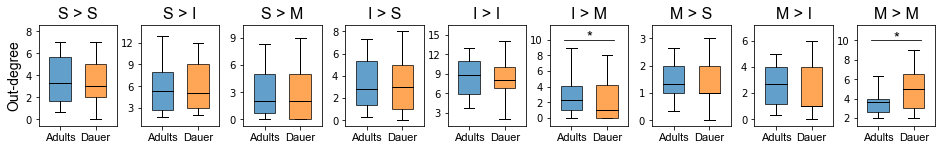

In [17]:
# (plot) OUT, box

label = ["Adults","Dauer"]

fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(13,2))
xpos = np.arange(1,3,1); bw = 0.6; lw = 1.0; ba = 0.7; tsz=16; fsz=11; ssz=15

ax1.set_title("S > S", fontsize=tsz, fontname="Arial")
ax1.set_ylabel('Out-degree', fontsize=14, fontname='Arial')
ax1.boxplot(adults_out_deg_SS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(dauer_out_deg_SS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax2.set_title("S > I", fontsize=tsz, fontname="Arial")
ax2.boxplot(adults_out_deg_SI_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax2.boxplot(dauer_out_deg_SI_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax3.set_title("S > M", fontsize=tsz, fontname="Arial")
ax3.boxplot(adults_out_deg_SM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax3.boxplot(dauer_out_deg_SM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax4.set_title("I > S", fontsize=tsz, fontname="Arial")
ax4.boxplot(adults_out_deg_IS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax4.boxplot(dauer_out_deg_IS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax5.set_title("I > I", fontsize=tsz, fontname="Arial")
ax5.boxplot(adults_out_deg_II_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax5.boxplot(dauer_out_deg_II_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax6.set_title("I > M", fontsize=tsz, fontname="Arial")
ax6.boxplot(adults_out_deg_IM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax6.boxplot(dauer_out_deg_IM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax7.set_title("M > S", fontsize=tsz, fontname="Arial")
ax7.boxplot(adults_out_deg_MS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax7.boxplot(dauer_out_deg_MS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax8.set_title("M > I", fontsize=tsz, fontname="Arial")
ax8.boxplot(adults_out_deg_MI_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax8.boxplot(dauer_out_deg_MI_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax9.set_title("M > M", fontsize=tsz, fontname="Arial")
ax9.boxplot(adults_out_deg_MM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax9.boxplot(dauer_out_deg_MM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax1.set_xticks(xpos); ax1.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax2.set_xticks(xpos); ax2.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax3.set_xticks(xpos); ax3.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax4.set_xticks(xpos); ax4.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax5.set_xticks(xpos); ax5.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax6.set_xticks(xpos); ax6.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax7.set_xticks(xpos); ax7.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax8.set_xticks(xpos); ax8.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax9.set_xticks(xpos); ax9.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax1.set_ylim(-0.6,8.6); ax2.set_ylim(0.5,14.5); ax3.set_ylim(-0.7,10.4); ax4.set_ylim(-0.5,8.6); ax5.set_ylim(1.0,16.5)
ax6.set_ylim(-1,11.9); ax7.set_ylim(-0.2,3.5); ax8.set_ylim(-0.5,7.2); ax9.set_ylim(1.2,11.6)
ax1.set_yticks([0,2,4,6,8]); ax1.set_yticklabels(["0","2","4","6","8"])
ax2.set_yticks([3,6,9,12]); ax2.set_yticklabels(["3","6","9","12"])
ax3.set_yticks([0,3,6,9]); ax3.set_yticklabels(["0","3","6","9"])
ax5.set_yticks([3,6,9,12,15]); ax5.set_yticklabels(["3","6","9","12","15"])
ax6.set_yticks([0,2,4,6,8,10]); ax6.set_yticklabels(["0","2","4","6","8","10"])
ax8.set_yticks([0,2,4,6]); ax8.set_yticklabels(["0","2","4","6"])
ax9.set_yticks([2,4,6,8,10]); ax9.set_yticklabels(["2","4","6","8","10"])

ax6.plot([0.8,2.2], [10,10], lw=0.8, c='k')
ax6.text(1.5, 9.5, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax9.plot([0.8,2.2], [10,10], lw=0.8, c='k')
ax9.text(1.5, 9.5, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

plt.xlim(0.4,2.6)
fig.tight_layout(pad=0.4)

# plt.savefig(r'D:\fig_6a.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


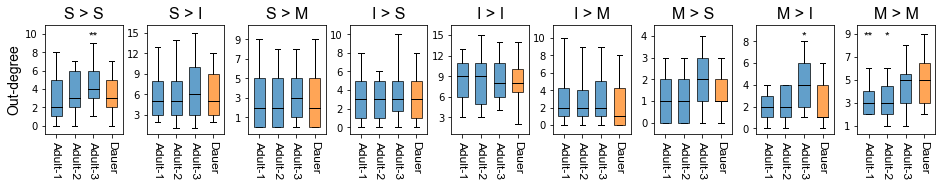

In [18]:
# OUT-degree (full version)

label = ["Adult-1","Adult-2","Adult-3","Dauer"]

fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(13,2.5))
xpos = np.arange(1,5,1); bw = 0.6; lw = 1.0; ba = 0.7; tsz=16; fsz=12; ssz=12

ax1.set_title("S > S", fontsize=tsz, fontname="Arial")
ax1.set_ylabel('Out-degree', fontsize=14, fontname='Arial')
ax1.boxplot(dset7_out_deg_SS[S_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(dset8_out_deg_SS[S_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(n2u_out_deg_SS[S_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(dauer_out_deg_SS[S_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax2.set_title("S > I", fontsize=tsz, fontname="Arial")
ax2.boxplot(dset7_out_deg_SI[S_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax2.boxplot(dset8_out_deg_SI[S_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax2.boxplot(n2u_out_deg_SI[S_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax2.boxplot(dauer_out_deg_SI[S_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax3.set_title("S > M", fontsize=tsz, fontname="Arial")
ax3.boxplot(dset7_out_deg_SM[S_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax3.boxplot(dset8_out_deg_SM[S_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax3.boxplot(n2u_out_deg_SM[S_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax3.boxplot(dauer_out_deg_SM[S_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax4.set_title("I > S", fontsize=tsz, fontname="Arial")
ax4.boxplot(dset7_out_deg_IS[I_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax4.boxplot(dset8_out_deg_IS[I_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax4.boxplot(n2u_out_deg_IS[I_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax4.boxplot(dauer_out_deg_IS[I_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax5.set_title("I > I", fontsize=tsz, fontname="Arial")
ax5.boxplot(dset7_out_deg_II[I_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax5.boxplot(dset8_out_deg_II[I_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax5.boxplot(n2u_out_deg_II[I_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax5.boxplot(dauer_out_deg_II[I_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax6.set_title("I > M", fontsize=tsz, fontname="Arial")
ax6.boxplot(dset7_out_deg_IM[I_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax6.boxplot(dset8_out_deg_IM[I_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax6.boxplot(n2u_out_deg_IM[I_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax6.boxplot(dauer_out_deg_IM[I_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax7.set_title("M > S", fontsize=tsz, fontname="Arial")
ax7.boxplot(dset7_out_deg_MS[M_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax7.boxplot(dset8_out_deg_MS[M_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax7.boxplot(n2u_out_deg_MS[M_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax7.boxplot(dauer_out_deg_MS[M_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax8.set_title("M > I", fontsize=tsz, fontname="Arial")
ax8.boxplot(dset7_out_deg_MI[M_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax8.boxplot(dset8_out_deg_MI[M_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax8.boxplot(n2u_out_deg_MI[M_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax8.boxplot(dauer_out_deg_MI[M_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax9.set_title("M > M", fontsize=tsz, fontname="Arial")
ax9.boxplot(dset7_out_deg_MM[M_no0_idx], positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax9.boxplot(dset8_out_deg_MM[M_no0_idx], positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax9.boxplot(n2u_out_deg_MM[M_no0_idx], positions=[xpos[2]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax9.boxplot(dauer_out_deg_MM[M_no0_idx], positions=[xpos[3]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax1.set_xticks(xpos); ax1.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax2.set_xticks(xpos); ax2.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax3.set_xticks(xpos); ax3.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax4.set_xticks(xpos); ax4.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax5.set_xticks(xpos); ax5.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax6.set_xticks(xpos); ax6.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax7.set_xticks(xpos); ax7.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax8.set_xticks(xpos); ax8.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax9.set_xticks(xpos); ax9.set_xticklabels(label, rotation=-90, fontsize=fsz, fontname='Arial')
ax1.set_ylim(-0.9,11); ax2.set_ylim(0.2,16.2); ax3.set_ylim(-0.7,10.5); ax4.set_ylim(-0.7,11); ax5.set_ylim(0.6,16.5)
ax6.set_ylim(-1,11.5); ax7.set_ylim(-0.5,4.5); ax8.set_ylim(-0.5,9.5); ax9.set_ylim(0.3,9.8)
ax1.set_yticks([0,2,4,6,8,10]); ax1.set_yticklabels(["0","2","4","6","8","10"])
ax2.set_yticks([3,6,9,12,15]); ax2.set_yticklabels(["3","6","9","12","15"])
ax3.set_yticks([1,3,5,7,9]); ax3.set_yticklabels(["1","3","5","7","9"])
ax4.set_yticks([0,2,4,6,8,10]); ax4.set_yticklabels(["0","2","4","6","8","10"])
ax5.set_yticks([3,6,9,12,15]); ax5.set_yticklabels(["3","6","9","12","15"])
ax6.set_yticks([0,2,4,6,8,10]); ax6.set_yticklabels(["0","2","4","6","8","10"])
ax8.set_yticks([0,2,4,6,8]); ax8.set_yticklabels(["0","2","4","6","8"])
ax9.set_yticks([1,3,5,7,9]); ax9.set_yticklabels(["1","3","5","7","9"])

ax1.text(3, 9.2, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax8.text(3, 8.0, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax9.text(1, 8.4, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax9.text(2, 8.4, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

plt.xlim(0.4,4.6)
fig.tight_layout(pad=0.4)

# plt.savefig(r'D:\fig_s7a.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


In [19]:
# OUT-degree (S>, I>, M>)

dauer_out_deg_S = np.copy(dauer_out_deg[sen_idx_180])
dset7_out_deg_S = np.copy(dset7_out_deg[sen_idx_180])
dset8_out_deg_S = np.copy(dset8_out_deg[sen_idx_180])
n2u_out_deg_S = np.copy(n2u_out_deg[sen_idx_180])

dauer_out_deg_I = np.copy(dauer_out_deg[int_idx_180])
dset7_out_deg_I = np.copy(dset7_out_deg[int_idx_180])
dset8_out_deg_I = np.copy(dset8_out_deg[int_idx_180])
n2u_out_deg_I = np.copy(n2u_out_deg[int_idx_180])

dauer_out_deg_M = np.copy(dauer_out_deg[mot_idx_180])
dset7_out_deg_M = np.copy(dset7_out_deg[mot_idx_180])
dset8_out_deg_M = np.copy(dset8_out_deg[mot_idx_180])
n2u_out_deg_M = np.copy(n2u_out_deg[mot_idx_180])


adults_out_deg_S_no0 = (dset7_out_deg_S[S_no0_idx] + dset8_out_deg_S[S_no0_idx] + n2u_out_deg_S[S_no0_idx]) / 3
dauer_out_deg_S_no0 = dauer_out_deg_S[S_no0_idx]
adults_out_deg_I_no0 = (dset7_out_deg_I[I_no0_idx] + dset8_out_deg_I[I_no0_idx] + n2u_out_deg_I[I_no0_idx]) / 3
dauer_out_deg_I_no0 = dauer_out_deg_I[I_no0_idx]
adults_out_deg_M_no0 = (dset7_out_deg_M[M_no0_idx] + dset8_out_deg_M[M_no0_idx] + n2u_out_deg_M[M_no0_idx]) / 3
dauer_out_deg_M_no0 = dauer_out_deg_M[M_no0_idx]


#### ( Witvliet type )

In [20]:
# without muscle, binarized

# OUT
dauer_out_deg_wSS = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180_w,sen_idx_180_w)], axis=1)
dauer_out_deg_wSI = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180_w,int_idx_180_w)], axis=1)
dauer_out_deg_wSM = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180_w,mot_idx_180_w)], axis=1)
dauer_out_deg_wSm = np.sum(norm180_comp_bi[:,:,10][np.ix_(sen_idx_180_w,mod_idx_180_w)], axis=1)
dauer_out_deg_wIS = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180_w,sen_idx_180_w)], axis=1)
dauer_out_deg_wII = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180_w,int_idx_180_w)], axis=1)
dauer_out_deg_wIM = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180_w,mot_idx_180_w)], axis=1)
dauer_out_deg_wIm = np.sum(norm180_comp_bi[:,:,10][np.ix_(int_idx_180_w,mod_idx_180_w)], axis=1)
dauer_out_deg_wMS = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180_w,sen_idx_180_w)], axis=1)
dauer_out_deg_wMI = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180_w,int_idx_180_w)], axis=1)
dauer_out_deg_wMM = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180_w,mot_idx_180_w)], axis=1)
dauer_out_deg_wMm = np.sum(norm180_comp_bi[:,:,10][np.ix_(mot_idx_180_w,mod_idx_180_w)], axis=1)
dauer_out_deg_wmS = np.sum(norm180_comp_bi[:,:,10][np.ix_(mod_idx_180_w,sen_idx_180_w)], axis=1)
dauer_out_deg_wmI = np.sum(norm180_comp_bi[:,:,10][np.ix_(mod_idx_180_w,int_idx_180_w)], axis=1)
dauer_out_deg_wmM = np.sum(norm180_comp_bi[:,:,10][np.ix_(mod_idx_180_w,mot_idx_180_w)], axis=1)
dauer_out_deg_wmm = np.sum(norm180_comp_bi[:,:,10][np.ix_(mod_idx_180_w,mod_idx_180_w)], axis=1)

dset7_out_deg_wSS = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180_w,sen_idx_180_w)], axis=1)
dset7_out_deg_wSI = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180_w,int_idx_180_w)], axis=1)
dset7_out_deg_wSM = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180_w,mot_idx_180_w)], axis=1)
dset7_out_deg_wSm = np.sum(norm180_comp_bi[:,:,6][np.ix_(sen_idx_180_w,mod_idx_180_w)], axis=1)
dset7_out_deg_wIS = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180_w,sen_idx_180_w)], axis=1)
dset7_out_deg_wII = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180_w,int_idx_180_w)], axis=1)
dset7_out_deg_wIM = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180_w,mot_idx_180_w)], axis=1)
dset7_out_deg_wIm = np.sum(norm180_comp_bi[:,:,6][np.ix_(int_idx_180_w,mod_idx_180_w)], axis=1)
dset7_out_deg_wMS = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180_w,sen_idx_180_w)], axis=1)
dset7_out_deg_wMI = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180_w,int_idx_180_w)], axis=1)
dset7_out_deg_wMM = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180_w,mot_idx_180_w)], axis=1)
dset7_out_deg_wMm = np.sum(norm180_comp_bi[:,:,6][np.ix_(mot_idx_180_w,mod_idx_180_w)], axis=1)
dset7_out_deg_wmS = np.sum(norm180_comp_bi[:,:,6][np.ix_(mod_idx_180_w,sen_idx_180_w)], axis=1)
dset7_out_deg_wmI = np.sum(norm180_comp_bi[:,:,6][np.ix_(mod_idx_180_w,int_idx_180_w)], axis=1)
dset7_out_deg_wmM = np.sum(norm180_comp_bi[:,:,6][np.ix_(mod_idx_180_w,mot_idx_180_w)], axis=1)
dset7_out_deg_wmm = np.sum(norm180_comp_bi[:,:,6][np.ix_(mod_idx_180_w,mod_idx_180_w)], axis=1)

dset8_out_deg_wSS = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180_w,sen_idx_180_w)], axis=1)
dset8_out_deg_wSI = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180_w,int_idx_180_w)], axis=1)
dset8_out_deg_wSM = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180_w,mot_idx_180_w)], axis=1)
dset8_out_deg_wSm = np.sum(norm180_comp_bi[:,:,7][np.ix_(sen_idx_180_w,mod_idx_180_w)], axis=1)
dset8_out_deg_wIS = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180_w,sen_idx_180_w)], axis=1)
dset8_out_deg_wII = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180_w,int_idx_180_w)], axis=1)
dset8_out_deg_wIM = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180_w,mot_idx_180_w)], axis=1)
dset8_out_deg_wIm = np.sum(norm180_comp_bi[:,:,7][np.ix_(int_idx_180_w,mod_idx_180_w)], axis=1)
dset8_out_deg_wMS = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180_w,sen_idx_180_w)], axis=1)
dset8_out_deg_wMI = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180_w,int_idx_180_w)], axis=1)
dset8_out_deg_wMM = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180_w,mot_idx_180_w)], axis=1)
dset8_out_deg_wMm = np.sum(norm180_comp_bi[:,:,7][np.ix_(mot_idx_180_w,mod_idx_180_w)], axis=1)
dset8_out_deg_wmS = np.sum(norm180_comp_bi[:,:,7][np.ix_(mod_idx_180_w,sen_idx_180_w)], axis=1)
dset8_out_deg_wmI = np.sum(norm180_comp_bi[:,:,7][np.ix_(mod_idx_180_w,int_idx_180_w)], axis=1)
dset8_out_deg_wmM = np.sum(norm180_comp_bi[:,:,7][np.ix_(mod_idx_180_w,mot_idx_180_w)], axis=1)
dset8_out_deg_wmm = np.sum(norm180_comp_bi[:,:,7][np.ix_(mod_idx_180_w,mod_idx_180_w)], axis=1)

n2u_out_deg_wSS = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180_w,sen_idx_180_w)], axis=1)
n2u_out_deg_wSI = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180_w,int_idx_180_w)], axis=1)
n2u_out_deg_wSM = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180_w,mot_idx_180_w)], axis=1)
n2u_out_deg_wSm = np.sum(norm180_comp_bi[:,:,9][np.ix_(sen_idx_180_w,mod_idx_180_w)], axis=1)
n2u_out_deg_wIS = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180_w,sen_idx_180_w)], axis=1)
n2u_out_deg_wII = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180_w,int_idx_180_w)], axis=1)
n2u_out_deg_wIM = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180_w,mot_idx_180_w)], axis=1)
n2u_out_deg_wIm = np.sum(norm180_comp_bi[:,:,9][np.ix_(int_idx_180_w,mod_idx_180_w)], axis=1)
n2u_out_deg_wMS = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180_w,sen_idx_180_w)], axis=1)
n2u_out_deg_wMI = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180_w,int_idx_180_w)], axis=1)
n2u_out_deg_wMM = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180_w,mot_idx_180_w)], axis=1)
n2u_out_deg_wMm = np.sum(norm180_comp_bi[:,:,9][np.ix_(mot_idx_180_w,mod_idx_180_w)], axis=1)
n2u_out_deg_wmS = np.sum(norm180_comp_bi[:,:,9][np.ix_(mod_idx_180_w,sen_idx_180_w)], axis=1)
n2u_out_deg_wmI = np.sum(norm180_comp_bi[:,:,9][np.ix_(mod_idx_180_w,int_idx_180_w)], axis=1)
n2u_out_deg_wmM = np.sum(norm180_comp_bi[:,:,9][np.ix_(mod_idx_180_w,mot_idx_180_w)], axis=1)
n2u_out_deg_wmm = np.sum(norm180_comp_bi[:,:,9][np.ix_(mod_idx_180_w,mod_idx_180_w)], axis=1)


In [21]:
# connection=0 excluded (if both neurons are 0) - witvliet type

temp_S = np.concatenate((np.sum(norm180_comp_bi[:,:,6][sen_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][sen_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][sen_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][sen_idx_180_w,:], axis=1).reshape(1,-1)), axis=0)
temp_S_bi = np.copy(temp_S); temp_S_bi[temp_S_bi!=0] = 1
wS_no0_idx = np.where(np.sum(temp_S_bi, axis=0)==4)[0]

temp_I = np.concatenate((np.sum(norm180_comp_bi[:,:,6][int_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][int_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][int_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][int_idx_180_w,:], axis=1).reshape(1,-1)), axis=0)
temp_I_bi = np.copy(temp_I); temp_I_bi[temp_I_bi!=0] = 1
wI_no0_idx = np.where(np.sum(temp_I_bi, axis=0)==4)[0]

temp_M = np.concatenate((np.sum(norm180_comp_bi[:,:,6][mot_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][mot_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][mot_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][mot_idx_180_w,:], axis=1).reshape(1,-1)), axis=0)
temp_M_bi = np.copy(temp_M); temp_M_bi[temp_M_bi!=0] = 1
wM_no0_idx = np.where(np.sum(temp_M_bi, axis=0)==4)[0]

temp_m = np.concatenate((np.sum(norm180_comp_bi[:,:,6][mod_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][mod_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][mod_idx_180_w,:], axis=1).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][mod_idx_180_w,:], axis=1).reshape(1,-1)), axis=0)
temp_m_bi = np.copy(temp_m); temp_m_bi[temp_m_bi!=0] = 1
wm_no0_idx = np.where(np.sum(temp_m_bi, axis=0)==4)[0]


In [22]:
# adults mean

adults_out_deg_wSS = (dset7_out_deg_wSS + dset8_out_deg_wSS + n2u_out_deg_wSS) / 3
adults_out_deg_wSI = (dset7_out_deg_wSI + dset8_out_deg_wSI + n2u_out_deg_wSI) / 3
adults_out_deg_wSM = (dset7_out_deg_wSM + dset8_out_deg_wSM + n2u_out_deg_wSM) / 3
adults_out_deg_wSm = (dset7_out_deg_wSm + dset8_out_deg_wSm + n2u_out_deg_wSm) / 3
adults_out_deg_wIS = (dset7_out_deg_wIS + dset8_out_deg_wIS + n2u_out_deg_wIS) / 3
adults_out_deg_wII = (dset7_out_deg_wII + dset8_out_deg_wII + n2u_out_deg_wII) / 3
adults_out_deg_wIM = (dset7_out_deg_wIM + dset8_out_deg_wIM + n2u_out_deg_wIM) / 3
adults_out_deg_wIm = (dset7_out_deg_wIm + dset8_out_deg_wIm + n2u_out_deg_wIm) / 3
adults_out_deg_wMS = (dset7_out_deg_wMS + dset8_out_deg_wMS + n2u_out_deg_wMS) / 3
adults_out_deg_wMI = (dset7_out_deg_wMI + dset8_out_deg_wMI + n2u_out_deg_wMI) / 3
adults_out_deg_wMM = (dset7_out_deg_wMM + dset8_out_deg_wMM + n2u_out_deg_wMM) / 3
adults_out_deg_wMm = (dset7_out_deg_wMm + dset8_out_deg_wMm + n2u_out_deg_wMm) / 3
adults_out_deg_wmS = (dset7_out_deg_wmS + dset8_out_deg_wmS + n2u_out_deg_wmS) / 3
adults_out_deg_wmI = (dset7_out_deg_wmI + dset8_out_deg_wmI + n2u_out_deg_wmI) / 3
adults_out_deg_wmM = (dset7_out_deg_wmM + dset8_out_deg_wmM + n2u_out_deg_wmM) / 3
adults_out_deg_wmm = (dset7_out_deg_wmm + dset8_out_deg_wmm + n2u_out_deg_wmm) / 3


adults_out_deg_wSS_no0 = (dset7_out_deg_wSS[wS_no0_idx]+dset8_out_deg_wSS[wS_no0_idx]+n2u_out_deg_wSS[wS_no0_idx]) / 3
dauer_out_deg_wSS_no0 = dauer_out_deg_wSS[wS_no0_idx]
adults_out_deg_wSI_no0 = (dset7_out_deg_wSI[wS_no0_idx]+dset8_out_deg_wSI[wS_no0_idx]+n2u_out_deg_wSI[wS_no0_idx]) / 3
dauer_out_deg_wSI_no0 = dauer_out_deg_wSI[wS_no0_idx]
adults_out_deg_wSM_no0 = (dset7_out_deg_wSM[wS_no0_idx]+dset8_out_deg_wSM[wS_no0_idx]+n2u_out_deg_wSM[wS_no0_idx]) / 3
dauer_out_deg_wSM_no0 = dauer_out_deg_wSM[wS_no0_idx]
adults_out_deg_wSm_no0 = (dset7_out_deg_wSm[wS_no0_idx]+dset8_out_deg_wSm[wS_no0_idx]+n2u_out_deg_wSm[wS_no0_idx]) / 3
dauer_out_deg_wSm_no0 = dauer_out_deg_wSm[wS_no0_idx]
adults_out_deg_wIS_no0 = (dset7_out_deg_wIS[wI_no0_idx]+dset8_out_deg_wIS[wI_no0_idx]+n2u_out_deg_wIS[wI_no0_idx]) / 3
dauer_out_deg_wIS_no0 = dauer_out_deg_wIS[wI_no0_idx]
adults_out_deg_wII_no0 = (dset7_out_deg_wII[wI_no0_idx]+dset8_out_deg_wII[wI_no0_idx]+n2u_out_deg_wII[wI_no0_idx]) / 3
dauer_out_deg_wII_no0 = dauer_out_deg_wII[wI_no0_idx]
adults_out_deg_wIM_no0 = (dset7_out_deg_wIM[wI_no0_idx]+dset8_out_deg_wIM[wI_no0_idx]+n2u_out_deg_wIM[wI_no0_idx]) / 3
dauer_out_deg_wIM_no0 = dauer_out_deg_wIM[wI_no0_idx]
adults_out_deg_wIm_no0 = (dset7_out_deg_wIm[wI_no0_idx]+dset8_out_deg_wIm[wI_no0_idx]+n2u_out_deg_wIm[wI_no0_idx]) / 3
dauer_out_deg_wIm_no0 = dauer_out_deg_wIm[wI_no0_idx]
adults_out_deg_wMS_no0 = (dset7_out_deg_wMS[wM_no0_idx]+dset8_out_deg_wMS[wM_no0_idx]+n2u_out_deg_wMS[wM_no0_idx]) / 3
dauer_out_deg_wMS_no0 = dauer_out_deg_wMS[wM_no0_idx]
adults_out_deg_wMI_no0 = (dset7_out_deg_wMI[wM_no0_idx]+dset8_out_deg_wMI[wM_no0_idx]+n2u_out_deg_wMI[wM_no0_idx]) / 3
dauer_out_deg_wMI_no0 = dauer_out_deg_wMI[wM_no0_idx]
adults_out_deg_wMM_no0 = (dset7_out_deg_wMM[wM_no0_idx]+dset8_out_deg_wMM[wM_no0_idx]+n2u_out_deg_wMM[wM_no0_idx]) / 3
dauer_out_deg_wMM_no0 = dauer_out_deg_wMM[wM_no0_idx]
adults_out_deg_wMm_no0 = (dset7_out_deg_wMm[wM_no0_idx]+dset8_out_deg_wMm[wM_no0_idx]+n2u_out_deg_wMm[wM_no0_idx]) / 3
dauer_out_deg_wMm_no0 = dauer_out_deg_wMm[wM_no0_idx]
adults_out_deg_wmS_no0 = (dset7_out_deg_wmS[wm_no0_idx]+dset8_out_deg_wmS[wm_no0_idx]+n2u_out_deg_wmS[wm_no0_idx]) / 3
dauer_out_deg_wmS_no0 = dauer_out_deg_wmS[wm_no0_idx]
adults_out_deg_wmI_no0 = (dset7_out_deg_wmI[wm_no0_idx]+dset8_out_deg_wmI[wm_no0_idx]+n2u_out_deg_wmI[wm_no0_idx]) / 3
dauer_out_deg_wmI_no0 = dauer_out_deg_wmI[wm_no0_idx]
adults_out_deg_wmM_no0 = (dset7_out_deg_wmM[wm_no0_idx]+dset8_out_deg_wmM[wm_no0_idx]+n2u_out_deg_wmM[wm_no0_idx]) / 3
dauer_out_deg_wmM_no0 = dauer_out_deg_wmM[wm_no0_idx]
adults_out_deg_wmm_no0 = (dset7_out_deg_wmm[wm_no0_idx]+dset8_out_deg_wmm[wm_no0_idx]+n2u_out_deg_wmm[wm_no0_idx]) / 3
dauer_out_deg_wmm_no0 = dauer_out_deg_wmm[wm_no0_idx]


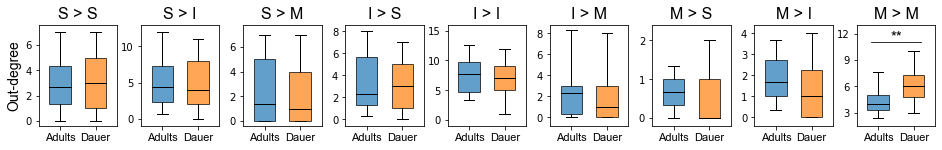

In [23]:
# (plot) OUT, box

label = ["Adults","Dauer"]

fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(13,2))
xpos = np.arange(1,3,1); bw = 0.6; lw = 1.0; ba = 0.7; tsz=16; fsz=11; ssz=15

ax1.set_title("S > S", fontsize=tsz, fontname="Arial")
ax1.set_ylabel('Out-degree', fontsize=14, fontname='Arial')
ax1.boxplot(adults_out_deg_wSS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(dauer_out_deg_wSS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax2.set_title("S > I", fontsize=tsz, fontname="Arial")
ax2.boxplot(adults_out_deg_wSI_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax2.boxplot(dauer_out_deg_wSI_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax3.set_title("S > M", fontsize=tsz, fontname="Arial")
ax3.boxplot(adults_out_deg_wSM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax3.boxplot(dauer_out_deg_wSM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax4.set_title("I > S", fontsize=tsz, fontname="Arial")
ax4.boxplot(adults_out_deg_wIS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax4.boxplot(dauer_out_deg_wIS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax5.set_title("I > I", fontsize=tsz, fontname="Arial")
ax5.boxplot(adults_out_deg_wII_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax5.boxplot(dauer_out_deg_wII_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax6.set_title("I > M", fontsize=tsz, fontname="Arial")
ax6.boxplot(adults_out_deg_wIM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax6.boxplot(dauer_out_deg_wIM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax7.set_title("M > S", fontsize=tsz, fontname="Arial")
ax7.boxplot(adults_out_deg_wMS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax7.boxplot(dauer_out_deg_wMS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax8.set_title("M > I", fontsize=tsz, fontname="Arial")
ax8.boxplot(adults_out_deg_wMI_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax8.boxplot(dauer_out_deg_wMI_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax9.set_title("M > M", fontsize=tsz, fontname="Arial")
ax9.boxplot(adults_out_deg_wMM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax9.boxplot(dauer_out_deg_wMM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax1.set_xticks(xpos); ax1.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax2.set_xticks(xpos); ax2.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax3.set_xticks(xpos); ax3.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax4.set_xticks(xpos); ax4.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax5.set_xticks(xpos); ax5.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax6.set_xticks(xpos); ax6.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax7.set_xticks(xpos); ax7.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax8.set_xticks(xpos); ax8.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax9.set_xticks(xpos); ax9.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax1.set_ylim(-0.4,7.6); ax2.set_ylim(-1,13); ax3.set_ylim(-0.4,7.8)
ax4.set_ylim(-0.6,8.6); ax5.set_ylim(-1,16); ax6.set_ylim(-0.8,8.8)
ax7.set_ylim(-0.2,2.4); ax8.set_ylim(-0.4,4.4); ax9.set_ylim(1.5,13)
ax9.set_yticks([3,6,9,12]); ax9.set_yticklabels(["3","6","9","12"])

ax9.plot([0.8,2.2], [11,11], lw=0.8, c='k')
ax9.text(1.5, 10.8, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

plt.xlim(0.4,2.6)
fig.tight_layout(pad=0.4)

# plt.savefig(r'D:\fig_s7a_witvliet.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


---

In [24]:
# adults mean (IN)

adults_in_deg_SS = (dset7_in_deg_SS + dset8_in_deg_SS + n2u_in_deg_SS) / 3
adults_in_deg_SI = (dset7_in_deg_SI + dset8_in_deg_SI + n2u_in_deg_SI) / 3
adults_in_deg_SM = (dset7_in_deg_SM + dset8_in_deg_SM + n2u_in_deg_SM) / 3
adults_in_deg_IS = (dset7_in_deg_IS + dset8_in_deg_IS + n2u_in_deg_IS) / 3
adults_in_deg_II = (dset7_in_deg_II + dset8_in_deg_II + n2u_in_deg_II) / 3
adults_in_deg_IM = (dset7_in_deg_IM + dset8_in_deg_IM + n2u_in_deg_IM) / 3
adults_in_deg_MS = (dset7_in_deg_MS + dset8_in_deg_MS + n2u_in_deg_MS) / 3
adults_in_deg_MI = (dset7_in_deg_MI + dset8_in_deg_MI + n2u_in_deg_MI) / 3
adults_in_deg_MM = (dset7_in_deg_MM + dset8_in_deg_MM + n2u_in_deg_MM) / 3


# connection=0 excluded (if at least one is 0)

temp_S = np.concatenate((np.sum(norm180_comp_bi[:,:,6][:,sen_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][:,sen_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][:,sen_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][:,sen_idx_180], axis=0).reshape(1,-1)), axis=0)
temp_S_bi = np.copy(temp_S); temp_S_bi[temp_S_bi!=0] = 1
S_in_no0_idx = np.where(np.sum(temp_S_bi, axis=0)==4)[0]
temp_I = np.concatenate((np.sum(norm180_comp_bi[:,:,6][:,int_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][:,int_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][:,int_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][:,int_idx_180], axis=0).reshape(1,-1)), axis=0)
temp_I_bi = np.copy(temp_I); temp_I_bi[temp_I_bi!=0] = 1
I_in_no0_idx = np.where(np.sum(temp_I_bi, axis=0)==4)[0]
temp_M = np.concatenate((np.sum(norm180_comp_bi[:,:,6][:,mot_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,7][:,mot_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,9][:,mot_idx_180], axis=0).reshape(1,-1),\
                         np.sum(norm180_comp_bi[:,:,10][:,mot_idx_180], axis=0).reshape(1,-1)), axis=0)
temp_M_bi = np.copy(temp_M); temp_M_bi[temp_M_bi!=0] = 1
M_in_no0_idx = np.where(np.sum(temp_M_bi, axis=0)==4)[0]


adults_in_deg_SS_no0 = (dset7_in_deg_SS[S_in_no0_idx]+dset8_in_deg_SS[S_in_no0_idx]+n2u_in_deg_SS[S_in_no0_idx]) / 3
dauer_in_deg_SS_no0 = dauer_in_deg_SS[S_in_no0_idx]
adults_in_deg_SI_no0 = (dset7_in_deg_SI[I_in_no0_idx]+dset8_in_deg_SI[I_in_no0_idx]+n2u_in_deg_SI[I_in_no0_idx]) / 3
dauer_in_deg_SI_no0 = dauer_in_deg_SI[I_in_no0_idx]
adults_in_deg_SM_no0 = (dset7_in_deg_SM[M_in_no0_idx]+dset8_in_deg_SM[M_in_no0_idx]+n2u_in_deg_SM[M_in_no0_idx]) / 3
dauer_in_deg_SM_no0 = dauer_in_deg_SM[M_in_no0_idx]
adults_in_deg_IS_no0 = (dset7_in_deg_IS[S_in_no0_idx]+dset8_in_deg_IS[S_in_no0_idx]+n2u_in_deg_IS[S_in_no0_idx]) / 3
dauer_in_deg_IS_no0 = dauer_in_deg_IS[S_in_no0_idx]
adults_in_deg_II_no0 = (dset7_in_deg_II[I_in_no0_idx]+dset8_in_deg_II[I_in_no0_idx]+n2u_in_deg_II[I_in_no0_idx]) / 3
dauer_in_deg_II_no0 = dauer_in_deg_II[I_in_no0_idx]
adults_in_deg_IM_no0 = (dset7_in_deg_IM[M_in_no0_idx]+dset8_in_deg_IM[M_in_no0_idx]+n2u_in_deg_IM[M_in_no0_idx]) / 3
dauer_in_deg_IM_no0 = dauer_in_deg_IM[M_in_no0_idx]
adults_in_deg_MS_no0 = (dset7_in_deg_MS[S_in_no0_idx]+dset8_in_deg_MS[S_in_no0_idx]+n2u_in_deg_MS[S_in_no0_idx]) / 3
dauer_in_deg_MS_no0 = dauer_in_deg_MS[S_in_no0_idx]
adults_in_deg_MI_no0 = (dset7_in_deg_MI[I_in_no0_idx]+dset8_in_deg_MI[I_in_no0_idx]+n2u_in_deg_MI[I_in_no0_idx]) / 3
dauer_in_deg_MI_no0 = dauer_in_deg_MI[I_in_no0_idx]
adults_in_deg_MM_no0 = (dset7_in_deg_MM[M_in_no0_idx]+dset8_in_deg_MM[M_in_no0_idx]+n2u_in_deg_MM[M_in_no0_idx]) / 3
dauer_in_deg_MM_no0 = dauer_in_deg_MM[M_in_no0_idx]


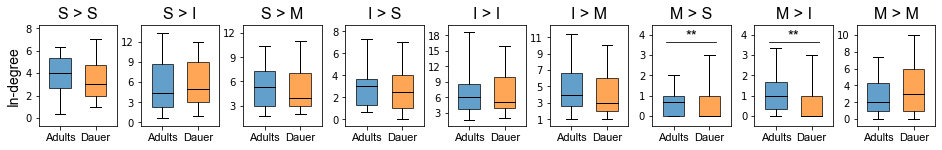

In [25]:
# (plot) IN, box

label = ["Adults","Dauer"]

fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(13,2))
xpos = np.arange(1,3,1); bw = 0.6; lw = 1.0; ba = 0.7; tsz=16; fsz=11

ax1.set_title("S > S", fontsize=tsz, fontname="Arial")
ax1.set_ylabel('In-degree', fontsize=14, fontname='Arial')
ax1.boxplot(adults_in_deg_SS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(dauer_in_deg_SS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax2.set_title("S > I", fontsize=tsz, fontname="Arial")
ax2.boxplot(adults_in_deg_SI_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax2.boxplot(dauer_in_deg_SI_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax3.set_title("S > M", fontsize=tsz, fontname="Arial")
ax3.boxplot(adults_in_deg_SM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax3.boxplot(dauer_in_deg_SM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax4.set_title("I > S", fontsize=tsz, fontname="Arial")
ax4.boxplot(adults_in_deg_IS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax4.boxplot(dauer_in_deg_IS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax5.set_title("I > I", fontsize=tsz, fontname="Arial")
ax5.boxplot(adults_in_deg_II_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax5.boxplot(dauer_in_deg_II_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax6.set_title("I > M", fontsize=tsz, fontname="Arial")
ax6.boxplot(adults_in_deg_IM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax6.boxplot(dauer_in_deg_IM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax7.set_title("M > S", fontsize=tsz, fontname="Arial")
ax7.boxplot(adults_in_deg_MS_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax7.boxplot(dauer_in_deg_MS_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax8.set_title("M > I", fontsize=tsz, fontname="Arial")
ax8.boxplot(adults_in_deg_MI_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax8.boxplot(dauer_in_deg_MI_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax9.set_title("M > M", fontsize=tsz, fontname="Arial")
ax9.boxplot(adults_in_deg_MM_no0, positions=[xpos[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:blue", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax9.boxplot(dauer_in_deg_MM_no0, positions=[xpos[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": lw},\
            boxprops={"facecolor": "tab:orange", "edgecolor": "k", "linewidth": lw, "alpha": ba},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax1.set_xticks(xpos); ax1.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax2.set_xticks(xpos); ax2.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax3.set_xticks(xpos); ax3.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax4.set_xticks(xpos); ax4.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax5.set_xticks(xpos); ax5.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax6.set_xticks(xpos); ax6.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax7.set_xticks(xpos); ax7.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax8.set_xticks(xpos); ax8.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax9.set_xticks(xpos); ax9.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax1.set_ylim(-0.7,8.3); ax2.set_ylim(-0.5,14.5); ax3.set_ylim(0.5,13); ax4.set_ylim(-0.6,8.6); ax5.set_ylim(0.5,20)
ax6.set_ylim(0.2,12.5); ax7.set_ylim(-0.5,4.5); ax8.set_ylim(-0.5,4.5); ax9.set_ylim(-0.8,11.2)
ax2.set_yticks([0,3,6,9,12]); ax2.set_yticklabels(["0","3","6","9","12"])
ax3.set_yticks([3,6,9,12]); ax3.set_yticklabels(["3","6","9","12"])
ax5.set_yticks([3,6,9,12,15,18]); ax5.set_yticklabels(["3","6","9","12","15","18"])
ax6.set_yticks([1,3,5,7,9,11]); ax6.set_yticklabels(["1","3","5","7","9","11"])
ax7.set_yticks([0,1,2,3,4]); ax7.set_yticklabels(["0","1","2","3","4"])
ax9.set_yticks([0,2,4,6,8,10]); ax9.set_yticklabels(["0","2","4","6","8","10"])

ax7.plot([0.8,2.2], [3.65,3.65], lw=0.8, c='k')
ax7.text(1.5, 3.6, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax8.plot([0.8,2.2], [3.65,3.65], lw=0.8, c='k')
ax8.text(1.5, 3.6, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

plt.xlim(0.4,2.6)
fig.tight_layout(pad=0.4)

# plt.savefig(r'D:\fig_s7b.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


### Clustering coefficient

In [26]:
# clustering coefficient
    # binarized ver.
    # neuron-only (180 X 180)

dauer_cc = nx.clustering(dauer_G_180bi); dauer_cc_val = np.array(list(dauer_cc.values()))
dset1_cc = nx.clustering(dset1_G_180bi); dset1_cc_val = np.array(list(dset1_cc.values()))
dset2_cc = nx.clustering(dset2_G_180bi); dset2_cc_val = np.array(list(dset2_cc.values()))
dset3_cc = nx.clustering(dset3_G_180bi); dset3_cc_val = np.array(list(dset3_cc.values()))
dset4_cc = nx.clustering(dset4_G_180bi); dset4_cc_val = np.array(list(dset4_cc.values()))
dset5_cc = nx.clustering(dset5_G_180bi); dset5_cc_val = np.array(list(dset5_cc.values()))
dset6_cc = nx.clustering(dset6_G_180bi); dset6_cc_val = np.array(list(dset6_cc.values()))
dset7_cc = nx.clustering(dset7_G_180bi); dset7_cc_val = np.array(list(dset7_cc.values()))
dset8_cc = nx.clustering(dset8_G_180bi); dset8_cc_val = np.array(list(dset8_cc.values()))
jsh_cc = nx.clustering(jsh_G_180bi); jsh_cc_val = np.array(list(jsh_cc.values()))
n2u_cc = nx.clustering(n2u_G_180bi); n2u_cc_val = np.array(list(n2u_cc.values()))

cc_val_comp = np.zeros((11,dauer_cc_val.size))
cc_val_comp[0,:] = np.copy(dset1_cc_val); cc_val_comp[1,:] = np.copy(dset2_cc_val); cc_val_comp[2,:] = np.copy(dset3_cc_val)
cc_val_comp[3,:] = np.copy(dset4_cc_val); cc_val_comp[4,:] = np.copy(dset5_cc_val); cc_val_comp[5,:] = np.copy(dset6_cc_val)
cc_val_comp[6,:] = np.copy(jsh_cc_val); cc_val_comp[7,:] = np.copy(dset7_cc_val); cc_val_comp[8,:] = np.copy(dset8_cc_val)
cc_val_comp[9,:] = np.copy(n2u_cc_val); cc_val_comp[10,:] = np.copy(dauer_cc_val)

cc_val_mean = np.mean(cc_val_comp, axis=1); cc_val_std = np.std(cc_val_comp, axis=1); cc_val_sem = sem(cc_val_comp, axis=1)

# no 0 value
dauer_cc_val_no0 = np.copy(dauer_cc_val[np.nonzero(dauer_cc_val)])
dset1_cc_val_no0 = np.copy(dset1_cc_val[np.nonzero(dset1_cc_val)])
dset2_cc_val_no0 = np.copy(dset2_cc_val[np.nonzero(dset2_cc_val)])
dset3_cc_val_no0 = np.copy(dset3_cc_val[np.nonzero(dset3_cc_val)])
dset4_cc_val_no0 = np.copy(dset4_cc_val[np.nonzero(dset4_cc_val)])
dset5_cc_val_no0 = np.copy(dset5_cc_val[np.nonzero(dset5_cc_val)])
dset6_cc_val_no0 = np.copy(dset6_cc_val[np.nonzero(dset6_cc_val)])
dset7_cc_val_no0 = np.copy(dset7_cc_val[np.nonzero(dset7_cc_val)])
dset8_cc_val_no0 = np.copy(dset8_cc_val[np.nonzero(dset8_cc_val)])
jsh_cc_val_no0 = np.copy(jsh_cc_val[np.nonzero(jsh_cc_val)])
n2u_cc_val_no0 = np.copy(n2u_cc_val[np.nonzero(n2u_cc_val)])

cc_val_no0_mean = np.zeros(11); cc_val_no0_std = np.zeros(11)
cc_val_no0_mean[0] = np.mean(dset1_cc_val_no0); cc_val_no0_std[0] = np.std(dset1_cc_val_no0)
cc_val_no0_mean[1] = np.mean(dset2_cc_val_no0); cc_val_no0_std[1] = np.std(dset2_cc_val_no0)
cc_val_no0_mean[2] = np.mean(dset3_cc_val_no0); cc_val_no0_std[2] = np.std(dset3_cc_val_no0)
cc_val_no0_mean[3] = np.mean(dset4_cc_val_no0); cc_val_no0_std[3] = np.std(dset4_cc_val_no0)
cc_val_no0_mean[4] = np.mean(dset5_cc_val_no0); cc_val_no0_std[4] = np.std(dset5_cc_val_no0)
cc_val_no0_mean[5] = np.mean(dset6_cc_val_no0); cc_val_no0_std[5] = np.std(dset6_cc_val_no0)
cc_val_no0_mean[6] = np.mean(jsh_cc_val_no0); cc_val_no0_std[6] = np.std(jsh_cc_val_no0)
cc_val_no0_mean[7] = np.mean(dset7_cc_val_no0); cc_val_no0_std[7] = np.std(dset7_cc_val_no0)
cc_val_no0_mean[8] = np.mean(dset8_cc_val_no0); cc_val_no0_std[8] = np.std(dset8_cc_val_no0)
cc_val_no0_mean[9] = np.mean(n2u_cc_val_no0); cc_val_no0_std[9] = np.std(n2u_cc_val_no0)
cc_val_no0_mean[10] = np.mean(dauer_cc_val_no0); cc_val_no0_std[10] = np.std(dauer_cc_val_no0)

cc_val_no0_sem = np.zeros(11)
cc_val_no0_sem[0] = sem(dset1_cc_val_no0); cc_val_no0_sem[1] = sem(dset2_cc_val_no0)
cc_val_no0_sem[2] = sem(dset3_cc_val_no0); cc_val_no0_sem[3] = sem(dset4_cc_val_no0)
cc_val_no0_sem[4] = sem(dset5_cc_val_no0); cc_val_no0_sem[5] = sem(dset6_cc_val_no0)
cc_val_no0_sem[6] = sem(jsh_cc_val_no0); cc_val_no0_sem[7] = sem(dset7_cc_val_no0)
cc_val_no0_sem[8] = sem(dset8_cc_val_no0); cc_val_no0_sem[9] = sem(n2u_cc_val_no0)
cc_val_no0_sem[10] = sem(dauer_cc_val_no0)


In [27]:
# exclude neurons with less than 2 degrees

dauer_degsum = np.copy(np.sum(norm180_comp_bi[:,:,10], axis=0) + np.sum(norm180_comp_bi[:,:,10], axis=1))
dset1_degsum = np.copy(np.sum(norm180_comp_bi[:,:,0], axis=0) + np.sum(norm180_comp_bi[:,:,0], axis=1))
dset2_degsum = np.copy(np.sum(norm180_comp_bi[:,:,1], axis=0) + np.sum(norm180_comp_bi[:,:,1], axis=1))
dset3_degsum = np.copy(np.sum(norm180_comp_bi[:,:,2], axis=0) + np.sum(norm180_comp_bi[:,:,2], axis=1))
dset4_degsum = np.copy(np.sum(norm180_comp_bi[:,:,3], axis=0) + np.sum(norm180_comp_bi[:,:,3], axis=1))
dset5_degsum = np.copy(np.sum(norm180_comp_bi[:,:,4], axis=0) + np.sum(norm180_comp_bi[:,:,4], axis=1))
dset6_degsum = np.copy(np.sum(norm180_comp_bi[:,:,5], axis=0) + np.sum(norm180_comp_bi[:,:,5], axis=1))
dset7_degsum = np.copy(np.sum(norm180_comp_bi[:,:,6], axis=0) + np.sum(norm180_comp_bi[:,:,6], axis=1))
dset8_degsum = np.copy(np.sum(norm180_comp_bi[:,:,7], axis=0) + np.sum(norm180_comp_bi[:,:,7], axis=1))
jsh_degsum = np.copy(np.sum(norm180_comp_bi[:,:,8], axis=0) + np.sum(norm180_comp_bi[:,:,8], axis=1))
n2u_degsum = np.copy(np.sum(norm180_comp_bi[:,:,9], axis=0) + np.sum(norm180_comp_bi[:,:,9], axis=1))

dauer_cc_thresh_idx = np.where(dauer_degsum >= 2)[0]
dset1_cc_thresh_idx = np.where(dset1_degsum >= 2)[0]; dset2_cc_thresh_idx = np.where(dset2_degsum >= 2)[0]
dset3_cc_thresh_idx = np.where(dset3_degsum >= 2)[0]; dset4_cc_thresh_idx = np.where(dset4_degsum >= 2)[0]
dset5_cc_thresh_idx = np.where(dset5_degsum >= 2)[0]; dset6_cc_thresh_idx = np.where(dset6_degsum >= 2)[0]
dset7_cc_thresh_idx = np.where(dset7_degsum >= 2)[0]; dset8_cc_thresh_idx = np.where(dset8_degsum >= 2)[0]
jsh_cc_thresh_idx = np.where(jsh_degsum >= 2)[0]; n2u_cc_thresh_idx = np.where(n2u_degsum >= 2)[0]


In [28]:
# threshed values

dauer_cc_threshed = np.copy(dauer_cc_val[dauer_cc_thresh_idx])
dset1_cc_threshed = np.copy(dset1_cc_val[dset1_cc_thresh_idx])
dset2_cc_threshed = np.copy(dset2_cc_val[dset2_cc_thresh_idx])
dset3_cc_threshed = np.copy(dset3_cc_val[dset3_cc_thresh_idx])
dset4_cc_threshed = np.copy(dset4_cc_val[dset4_cc_thresh_idx])
dset5_cc_threshed = np.copy(dset5_cc_val[dset5_cc_thresh_idx])
dset6_cc_threshed = np.copy(dset6_cc_val[dset6_cc_thresh_idx])
dset7_cc_threshed = np.copy(dset7_cc_val[dset7_cc_thresh_idx])
dset8_cc_threshed = np.copy(dset8_cc_val[dset8_cc_thresh_idx])
jsh_cc_threshed = np.copy(jsh_cc_val[jsh_cc_thresh_idx])
n2u_cc_threshed = np.copy(n2u_cc_val[n2u_cc_thresh_idx])


In [29]:
# mean & std

cc_val_threshed_mean = np.zeros(11); cc_val_threshed_std = np.zeros(11)
cc_val_threshed_mean[0] = np.mean(dset1_cc_threshed); cc_val_threshed_std[0] = np.std(dset1_cc_threshed)
cc_val_threshed_mean[1] = np.mean(dset2_cc_threshed); cc_val_threshed_std[1] = np.std(dset2_cc_threshed)
cc_val_threshed_mean[2] = np.mean(dset3_cc_threshed); cc_val_threshed_std[2] = np.std(dset3_cc_threshed)
cc_val_threshed_mean[3] = np.mean(dset4_cc_threshed); cc_val_threshed_std[3] = np.std(dset4_cc_threshed)
cc_val_threshed_mean[4] = np.mean(dset5_cc_threshed); cc_val_threshed_std[4] = np.std(dset5_cc_threshed)
cc_val_threshed_mean[5] = np.mean(dset6_cc_threshed); cc_val_threshed_std[5] = np.std(dset6_cc_threshed)
cc_val_threshed_mean[6] = np.mean(jsh_cc_threshed); cc_val_threshed_std[6] = np.std(jsh_cc_threshed)
cc_val_threshed_mean[7] = np.mean(dset7_cc_threshed); cc_val_threshed_std[7] = np.std(dset7_cc_threshed)
cc_val_threshed_mean[8] = np.mean(dset8_cc_threshed); cc_val_threshed_std[8] = np.std(dset8_cc_threshed)
cc_val_threshed_mean[9] = np.mean(n2u_cc_threshed); cc_val_threshed_std[9] = np.std(n2u_cc_threshed)
cc_val_threshed_mean[10] = np.mean(dauer_cc_threshed); cc_val_threshed_std[10] = np.std(dauer_cc_threshed)


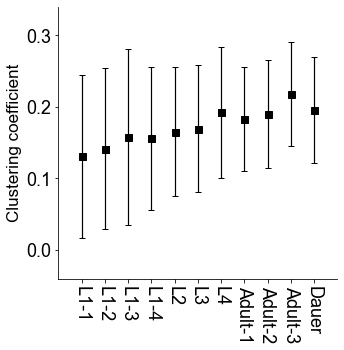

In [30]:
# plot

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,5))
xpos = np.arange(1,12,1)

ax1.errorbar(xpos, cc_val_threshed_mean, yerr=cc_val_threshed_std, alpha=1.0, markersize=7, elinewidth=1.2,\
             fmt='s', ecolor='k', color='k', capsize=3, label='Reference')
ax1.set_ylabel("Clustering coefficient", fontsize=17, fontname='Arial')
ax1.set_yticks(np.arange(0.0,0.35,0.1))
ax1.set_yticklabels(["0.0","0.1","0.2","0.3"], fontsize=18, fontname='Arial')
ax1.set_xticks(xpos)
ax1.set_xticklabels(["L1-1","L1-2","L1-3","L1-4","L2","L3","L4","Adult-1","Adult-2","Adult-3","Dauer"],\
                    rotation=-90, fontsize=18, fontname='Arial')
ax1.set_xlim(0,12)
ax1.set_ylim(-0.04,0.34)
ax1.spines[['right','top']].set_visible(False)

# plt.savefig(r'D:\fig_5d.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


### Intra-class CC

In [31]:
# intra-class submatrix

dauer_SS_mat = norm180_comp_bi[:,:,10][np.ix_(sen_idx_180,sen_idx_180)]
dauer_II_mat = norm180_comp_bi[:,:,10][np.ix_(int_idx_180,int_idx_180)]
dauer_MM_mat = norm180_comp_bi[:,:,10][np.ix_(mot_idx_180,mot_idx_180)]
dset1_SS_mat = norm180_comp_bi[:,:,0][np.ix_(sen_idx_180,sen_idx_180)]
dset1_II_mat = norm180_comp_bi[:,:,0][np.ix_(int_idx_180,int_idx_180)]
dset1_MM_mat = norm180_comp_bi[:,:,0][np.ix_(mot_idx_180,mot_idx_180)]
dset2_SS_mat = norm180_comp_bi[:,:,1][np.ix_(sen_idx_180,sen_idx_180)]
dset2_II_mat = norm180_comp_bi[:,:,1][np.ix_(int_idx_180,int_idx_180)]
dset2_MM_mat = norm180_comp_bi[:,:,1][np.ix_(mot_idx_180,mot_idx_180)]
dset3_SS_mat = norm180_comp_bi[:,:,2][np.ix_(sen_idx_180,sen_idx_180)]
dset3_II_mat = norm180_comp_bi[:,:,2][np.ix_(int_idx_180,int_idx_180)]
dset3_MM_mat = norm180_comp_bi[:,:,2][np.ix_(mot_idx_180,mot_idx_180)]
dset4_SS_mat = norm180_comp_bi[:,:,3][np.ix_(sen_idx_180,sen_idx_180)]
dset4_II_mat = norm180_comp_bi[:,:,3][np.ix_(int_idx_180,int_idx_180)]
dset4_MM_mat = norm180_comp_bi[:,:,3][np.ix_(mot_idx_180,mot_idx_180)]
dset5_SS_mat = norm180_comp_bi[:,:,4][np.ix_(sen_idx_180,sen_idx_180)]
dset5_II_mat = norm180_comp_bi[:,:,4][np.ix_(int_idx_180,int_idx_180)]
dset5_MM_mat = norm180_comp_bi[:,:,4][np.ix_(mot_idx_180,mot_idx_180)]
dset6_SS_mat = norm180_comp_bi[:,:,5][np.ix_(sen_idx_180,sen_idx_180)]
dset6_II_mat = norm180_comp_bi[:,:,5][np.ix_(int_idx_180,int_idx_180)]
dset6_MM_mat = norm180_comp_bi[:,:,5][np.ix_(mot_idx_180,mot_idx_180)]
dset7_SS_mat = norm180_comp_bi[:,:,6][np.ix_(sen_idx_180,sen_idx_180)]
dset7_II_mat = norm180_comp_bi[:,:,6][np.ix_(int_idx_180,int_idx_180)]
dset7_MM_mat = norm180_comp_bi[:,:,6][np.ix_(mot_idx_180,mot_idx_180)]
dset8_SS_mat = norm180_comp_bi[:,:,7][np.ix_(sen_idx_180,sen_idx_180)]
dset8_II_mat = norm180_comp_bi[:,:,7][np.ix_(int_idx_180,int_idx_180)]
dset8_MM_mat = norm180_comp_bi[:,:,7][np.ix_(mot_idx_180,mot_idx_180)]
jsh_SS_mat = norm180_comp_bi[:,:,8][np.ix_(sen_idx_180,sen_idx_180)]
jsh_II_mat = norm180_comp_bi[:,:,8][np.ix_(int_idx_180,int_idx_180)]
jsh_MM_mat = norm180_comp_bi[:,:,8][np.ix_(mot_idx_180,mot_idx_180)]
n2u_SS_mat = norm180_comp_bi[:,:,9][np.ix_(sen_idx_180,sen_idx_180)]
n2u_II_mat = norm180_comp_bi[:,:,9][np.ix_(int_idx_180,int_idx_180)]
n2u_MM_mat = norm180_comp_bi[:,:,9][np.ix_(mot_idx_180,mot_idx_180)]

dauer_SS_G = nx.from_numpy_array(dauer_SS_mat, create_using=nx.DiGraph)
dauer_II_G = nx.from_numpy_array(dauer_II_mat, create_using=nx.DiGraph)
dauer_MM_G = nx.from_numpy_array(dauer_MM_mat, create_using=nx.DiGraph)
dset1_SS_G = nx.from_numpy_array(dset1_SS_mat, create_using=nx.DiGraph)
dset1_II_G = nx.from_numpy_array(dset1_II_mat, create_using=nx.DiGraph)
dset1_MM_G = nx.from_numpy_array(dset1_MM_mat, create_using=nx.DiGraph)
dset2_SS_G = nx.from_numpy_array(dset2_SS_mat, create_using=nx.DiGraph)
dset2_II_G = nx.from_numpy_array(dset2_II_mat, create_using=nx.DiGraph)
dset2_MM_G = nx.from_numpy_array(dset2_MM_mat, create_using=nx.DiGraph)
dset3_SS_G = nx.from_numpy_array(dset3_SS_mat, create_using=nx.DiGraph)
dset3_II_G = nx.from_numpy_array(dset3_II_mat, create_using=nx.DiGraph)
dset3_MM_G = nx.from_numpy_array(dset3_MM_mat, create_using=nx.DiGraph)
dset4_SS_G = nx.from_numpy_array(dset4_SS_mat, create_using=nx.DiGraph)
dset4_II_G = nx.from_numpy_array(dset4_II_mat, create_using=nx.DiGraph)
dset4_MM_G = nx.from_numpy_array(dset4_MM_mat, create_using=nx.DiGraph)
dset5_SS_G = nx.from_numpy_array(dset5_SS_mat, create_using=nx.DiGraph)
dset5_II_G = nx.from_numpy_array(dset5_II_mat, create_using=nx.DiGraph)
dset5_MM_G = nx.from_numpy_array(dset5_MM_mat, create_using=nx.DiGraph)
dset6_SS_G = nx.from_numpy_array(dset6_SS_mat, create_using=nx.DiGraph)
dset6_II_G = nx.from_numpy_array(dset6_II_mat, create_using=nx.DiGraph)
dset6_MM_G = nx.from_numpy_array(dset6_MM_mat, create_using=nx.DiGraph)
dset7_SS_G = nx.from_numpy_array(dset7_SS_mat, create_using=nx.DiGraph)
dset7_II_G = nx.from_numpy_array(dset7_II_mat, create_using=nx.DiGraph)
dset7_MM_G = nx.from_numpy_array(dset7_MM_mat, create_using=nx.DiGraph)
dset8_SS_G = nx.from_numpy_array(dset8_SS_mat, create_using=nx.DiGraph)
dset8_II_G = nx.from_numpy_array(dset8_II_mat, create_using=nx.DiGraph)
dset8_MM_G = nx.from_numpy_array(dset8_MM_mat, create_using=nx.DiGraph)
jsh_SS_G = nx.from_numpy_array(jsh_SS_mat, create_using=nx.DiGraph)
jsh_II_G = nx.from_numpy_array(jsh_II_mat, create_using=nx.DiGraph)
jsh_MM_G = nx.from_numpy_array(jsh_MM_mat, create_using=nx.DiGraph)
n2u_SS_G = nx.from_numpy_array(n2u_SS_mat, create_using=nx.DiGraph)
n2u_II_G = nx.from_numpy_array(n2u_II_mat, create_using=nx.DiGraph)
n2u_MM_G = nx.from_numpy_array(n2u_MM_mat, create_using=nx.DiGraph)


In [32]:
# submatrix cc

dauer_SS_cc = list(nx.clustering(dauer_SS_G).values()); dauer_SS_cc_avg = sum(dauer_SS_cc) / len(dauer_SS_cc)
dauer_II_cc = list(nx.clustering(dauer_II_G).values()); dauer_II_cc_avg = sum(dauer_II_cc) / len(dauer_II_cc)
dauer_MM_cc = list(nx.clustering(dauer_MM_G).values()); dauer_MM_cc_avg = sum(dauer_MM_cc) / len(dauer_MM_cc)
dset1_SS_cc = list(nx.clustering(dset1_SS_G).values()); dset1_SS_cc_avg = sum(dset1_SS_cc) / len(dset1_SS_cc)
dset1_II_cc = list(nx.clustering(dset1_II_G).values()); dset1_II_cc_avg = sum(dset1_II_cc) / len(dset1_II_cc)
dset1_MM_cc = list(nx.clustering(dset1_MM_G).values()); dset1_MM_cc_avg = sum(dset1_MM_cc) / len(dset1_MM_cc)
dset2_SS_cc = list(nx.clustering(dset2_SS_G).values()); dset2_SS_cc_avg = sum(dset2_SS_cc) / len(dset2_SS_cc)
dset2_II_cc = list(nx.clustering(dset2_II_G).values()); dset2_II_cc_avg = sum(dset2_II_cc) / len(dset2_II_cc)
dset2_MM_cc = list(nx.clustering(dset2_MM_G).values()); dset2_MM_cc_avg = sum(dset2_MM_cc) / len(dset2_MM_cc)
dset3_SS_cc = list(nx.clustering(dset3_SS_G).values()); dset3_SS_cc_avg = sum(dset3_SS_cc) / len(dset3_SS_cc)
dset3_II_cc = list(nx.clustering(dset3_II_G).values()); dset3_II_cc_avg = sum(dset3_II_cc) / len(dset3_II_cc)
dset3_MM_cc = list(nx.clustering(dset3_MM_G).values()); dset3_MM_cc_avg = sum(dset3_MM_cc) / len(dset3_MM_cc)
dset4_SS_cc = list(nx.clustering(dset4_SS_G).values()); dset4_SS_cc_avg = sum(dset4_SS_cc) / len(dset4_SS_cc)
dset4_II_cc = list(nx.clustering(dset4_II_G).values()); dset4_II_cc_avg = sum(dset4_II_cc) / len(dset4_II_cc)
dset4_MM_cc = list(nx.clustering(dset4_MM_G).values()); dset4_MM_cc_avg = sum(dset4_MM_cc) / len(dset4_MM_cc)
dset5_SS_cc = list(nx.clustering(dset5_SS_G).values()); dset5_SS_cc_avg = sum(dset5_SS_cc) / len(dset5_SS_cc)
dset5_II_cc = list(nx.clustering(dset5_II_G).values()); dset5_II_cc_avg = sum(dset5_II_cc) / len(dset5_II_cc)
dset5_MM_cc = list(nx.clustering(dset5_MM_G).values()); dset5_MM_cc_avg = sum(dset5_MM_cc) / len(dset5_MM_cc)
dset6_SS_cc = list(nx.clustering(dset6_SS_G).values()); dset6_SS_cc_avg = sum(dset6_SS_cc) / len(dset6_SS_cc)
dset6_II_cc = list(nx.clustering(dset6_II_G).values()); dset6_II_cc_avg = sum(dset6_II_cc) / len(dset6_II_cc)
dset6_MM_cc = list(nx.clustering(dset6_MM_G).values()); dset6_MM_cc_avg = sum(dset6_MM_cc) / len(dset6_MM_cc)
dset7_SS_cc = list(nx.clustering(dset7_SS_G).values()); dset7_SS_cc_avg = sum(dset7_SS_cc) / len(dset7_SS_cc)
dset7_II_cc = list(nx.clustering(dset7_II_G).values()); dset7_II_cc_avg = sum(dset7_II_cc) / len(dset7_II_cc)
dset7_MM_cc = list(nx.clustering(dset7_MM_G).values()); dset7_MM_cc_avg = sum(dset7_MM_cc) / len(dset7_MM_cc)
dset8_SS_cc = list(nx.clustering(dset8_SS_G).values()); dset8_SS_cc_avg = sum(dset8_SS_cc) / len(dset8_SS_cc)
dset8_II_cc = list(nx.clustering(dset8_II_G).values()); dset8_II_cc_avg = sum(dset8_II_cc) / len(dset8_II_cc)
dset8_MM_cc = list(nx.clustering(dset8_MM_G).values()); dset8_MM_cc_avg = sum(dset8_MM_cc) / len(dset8_MM_cc)
jsh_SS_cc = list(nx.clustering(jsh_SS_G).values()); jsh_SS_cc_avg = sum(jsh_SS_cc) / len(jsh_SS_cc)
jsh_II_cc = list(nx.clustering(jsh_II_G).values()); jsh_II_cc_avg = sum(jsh_II_cc) / len(jsh_II_cc)
jsh_MM_cc = list(nx.clustering(jsh_MM_G).values()); jsh_MM_cc_avg = sum(jsh_MM_cc) / len(jsh_MM_cc)
n2u_SS_cc = list(nx.clustering(n2u_SS_G).values()); n2u_SS_cc_avg = sum(n2u_SS_cc) / len(n2u_SS_cc)
n2u_II_cc = list(nx.clustering(n2u_II_G).values()); n2u_II_cc_avg = sum(n2u_II_cc) / len(n2u_II_cc)
n2u_MM_cc = list(nx.clustering(n2u_MM_G).values()); n2u_MM_cc_avg = sum(n2u_MM_cc) / len(n2u_MM_cc)

dauer_SS_cc = np.array(dauer_SS_cc); dauer_II_cc = np.array(dauer_II_cc); dauer_MM_cc = np.array(dauer_MM_cc)
dset1_SS_cc = np.array(dset1_SS_cc); dset1_II_cc = np.array(dset1_II_cc); dset1_MM_cc = np.array(dset1_MM_cc)
dset2_SS_cc = np.array(dset2_SS_cc); dset2_II_cc = np.array(dset2_II_cc); dset2_MM_cc = np.array(dset2_MM_cc)
dset3_SS_cc = np.array(dset3_SS_cc); dset3_II_cc = np.array(dset3_II_cc); dset3_MM_cc = np.array(dset3_MM_cc)
dset4_SS_cc = np.array(dset4_SS_cc); dset4_II_cc = np.array(dset4_II_cc); dset4_MM_cc = np.array(dset4_MM_cc)
dset5_SS_cc = np.array(dset5_SS_cc); dset5_II_cc = np.array(dset5_II_cc); dset5_MM_cc = np.array(dset5_MM_cc)
dset6_SS_cc = np.array(dset6_SS_cc); dset6_II_cc = np.array(dset6_II_cc); dset6_MM_cc = np.array(dset6_MM_cc)
dset7_SS_cc = np.array(dset7_SS_cc); dset7_II_cc = np.array(dset7_II_cc); dset7_MM_cc = np.array(dset7_MM_cc)
dset8_SS_cc = np.array(dset8_SS_cc); dset8_II_cc = np.array(dset8_II_cc); dset8_MM_cc = np.array(dset8_MM_cc)
jsh_SS_cc = np.array(jsh_SS_cc); jsh_II_cc = np.array(jsh_II_cc); jsh_MM_cc = np.array(jsh_MM_cc)
n2u_SS_cc = np.array(n2u_SS_cc); n2u_II_cc = np.array(n2u_II_cc); n2u_MM_cc = np.array(n2u_MM_cc)


In [33]:
# degree sum thresh
    # cutoff neurons with small number of degrees (< 2)

deg_thresh = 2

dset1_SS_degsum = np.sum(dset1_SS_mat, axis=1) + np.sum(dset1_SS_mat, axis=0)  # OUT + IN
dset2_SS_degsum = np.sum(dset2_SS_mat, axis=1) + np.sum(dset2_SS_mat, axis=0)
dset3_SS_degsum = np.sum(dset3_SS_mat, axis=1) + np.sum(dset3_SS_mat, axis=0)
dset4_SS_degsum = np.sum(dset4_SS_mat, axis=1) + np.sum(dset4_SS_mat, axis=0)
dset5_SS_degsum = np.sum(dset5_SS_mat, axis=1) + np.sum(dset5_SS_mat, axis=0)
dset6_SS_degsum = np.sum(dset6_SS_mat, axis=1) + np.sum(dset6_SS_mat, axis=0)
jsh_SS_degsum = np.sum(jsh_SS_mat, axis=1) + np.sum(jsh_SS_mat, axis=0)
dset7_SS_degsum = np.sum(dset7_SS_mat, axis=1) + np.sum(dset7_SS_mat, axis=0)
dset8_SS_degsum = np.sum(dset8_SS_mat, axis=1) + np.sum(dset8_SS_mat, axis=0)
n2u_SS_degsum = np.sum(n2u_SS_mat, axis=1) + np.sum(n2u_SS_mat, axis=0)
dauer_SS_degsum = np.sum(dauer_SS_mat, axis=1) + np.sum(dauer_SS_mat, axis=0)

dset1_II_degsum = np.sum(dset1_II_mat, axis=1) + np.sum(dset1_II_mat, axis=0)
dset2_II_degsum = np.sum(dset2_II_mat, axis=1) + np.sum(dset2_II_mat, axis=0)
dset3_II_degsum = np.sum(dset3_II_mat, axis=1) + np.sum(dset3_II_mat, axis=0)
dset4_II_degsum = np.sum(dset4_II_mat, axis=1) + np.sum(dset4_II_mat, axis=0)
dset5_II_degsum = np.sum(dset5_II_mat, axis=1) + np.sum(dset5_II_mat, axis=0)
dset6_II_degsum = np.sum(dset6_II_mat, axis=1) + np.sum(dset6_II_mat, axis=0)
jsh_II_degsum = np.sum(jsh_II_mat, axis=1) + np.sum(jsh_II_mat, axis=0)
dset7_II_degsum = np.sum(dset7_II_mat, axis=1) + np.sum(dset7_II_mat, axis=0)
dset8_II_degsum = np.sum(dset8_II_mat, axis=1) + np.sum(dset8_II_mat, axis=0)
n2u_II_degsum = np.sum(n2u_II_mat, axis=1) + np.sum(n2u_II_mat, axis=0)
dauer_II_degsum = np.sum(dauer_II_mat, axis=1) + np.sum(dauer_II_mat, axis=0)

dset1_MM_degsum = np.sum(dset1_MM_mat, axis=1) + np.sum(dset1_MM_mat, axis=0)
dset2_MM_degsum = np.sum(dset2_MM_mat, axis=1) + np.sum(dset2_MM_mat, axis=0)
dset3_MM_degsum = np.sum(dset3_MM_mat, axis=1) + np.sum(dset3_MM_mat, axis=0)
dset4_MM_degsum = np.sum(dset4_MM_mat, axis=1) + np.sum(dset4_MM_mat, axis=0)
dset5_MM_degsum = np.sum(dset5_MM_mat, axis=1) + np.sum(dset5_MM_mat, axis=0)
dset6_MM_degsum = np.sum(dset6_MM_mat, axis=1) + np.sum(dset6_MM_mat, axis=0)
jsh_MM_degsum = np.sum(jsh_MM_mat, axis=1) + np.sum(jsh_MM_mat, axis=0)
dset7_MM_degsum = np.sum(dset7_MM_mat, axis=1) + np.sum(dset7_MM_mat, axis=0)
dset8_MM_degsum = np.sum(dset8_MM_mat, axis=1) + np.sum(dset8_MM_mat, axis=0)
n2u_MM_degsum = np.sum(n2u_MM_mat, axis=1) + np.sum(n2u_MM_mat, axis=0)
dauer_MM_degsum = np.sum(dauer_MM_mat, axis=1) + np.sum(dauer_MM_mat, axis=0)

dauer_SS_cc_threshed = np.copy(dauer_SS_cc[dauer_SS_degsum>=deg_thresh])
dset1_SS_cc_threshed = np.copy(dset1_SS_cc[dset1_SS_degsum>=deg_thresh])
dset2_SS_cc_threshed = np.copy(dset2_SS_cc[dset2_SS_degsum>=deg_thresh])
dset3_SS_cc_threshed = np.copy(dset3_SS_cc[dset3_SS_degsum>=deg_thresh])
dset4_SS_cc_threshed = np.copy(dset4_SS_cc[dset4_SS_degsum>=deg_thresh])
dset5_SS_cc_threshed = np.copy(dset5_SS_cc[dset5_SS_degsum>=deg_thresh])
dset6_SS_cc_threshed = np.copy(dset6_SS_cc[dset6_SS_degsum>=deg_thresh])
dset7_SS_cc_threshed = np.copy(dset7_SS_cc[dset7_SS_degsum>=deg_thresh])
dset8_SS_cc_threshed = np.copy(dset8_SS_cc[dset8_SS_degsum>=deg_thresh])
jsh_SS_cc_threshed = np.copy(jsh_SS_cc[jsh_SS_degsum>=deg_thresh])
n2u_SS_cc_threshed = np.copy(n2u_SS_cc[n2u_SS_degsum>=deg_thresh])

dauer_II_cc_threshed = np.copy(dauer_II_cc[dauer_II_degsum>=deg_thresh])
dset1_II_cc_threshed = np.copy(dset1_II_cc[dset1_II_degsum>=deg_thresh])
dset2_II_cc_threshed = np.copy(dset2_II_cc[dset2_II_degsum>=deg_thresh])
dset3_II_cc_threshed = np.copy(dset3_II_cc[dset3_II_degsum>=deg_thresh])
dset4_II_cc_threshed = np.copy(dset4_II_cc[dset4_II_degsum>=deg_thresh])
dset5_II_cc_threshed = np.copy(dset5_II_cc[dset5_II_degsum>=deg_thresh])
dset6_II_cc_threshed = np.copy(dset6_II_cc[dset6_II_degsum>=deg_thresh])
dset7_II_cc_threshed = np.copy(dset7_II_cc[dset7_II_degsum>=deg_thresh])
dset8_II_cc_threshed = np.copy(dset8_II_cc[dset8_II_degsum>=deg_thresh])
jsh_II_cc_threshed = np.copy(jsh_II_cc[jsh_II_degsum>=deg_thresh])
n2u_II_cc_threshed = np.copy(n2u_II_cc[n2u_II_degsum>=deg_thresh])

dauer_MM_cc_threshed = np.copy(dauer_MM_cc[dauer_MM_degsum>=deg_thresh])
dset1_MM_cc_threshed = np.copy(dset1_MM_cc[dset1_MM_degsum>=deg_thresh])
dset2_MM_cc_threshed = np.copy(dset2_MM_cc[dset2_MM_degsum>=deg_thresh])
dset3_MM_cc_threshed = np.copy(dset3_MM_cc[dset3_MM_degsum>=deg_thresh])
dset4_MM_cc_threshed = np.copy(dset4_MM_cc[dset4_MM_degsum>=deg_thresh])
dset5_MM_cc_threshed = np.copy(dset5_MM_cc[dset5_MM_degsum>=deg_thresh])
dset6_MM_cc_threshed = np.copy(dset6_MM_cc[dset6_MM_degsum>=deg_thresh])
dset7_MM_cc_threshed = np.copy(dset7_MM_cc[dset7_MM_degsum>=deg_thresh])
dset8_MM_cc_threshed = np.copy(dset8_MM_cc[dset8_MM_degsum>=deg_thresh])
jsh_MM_cc_threshed = np.copy(jsh_MM_cc[jsh_MM_degsum>=deg_thresh])
n2u_MM_cc_threshed = np.copy(n2u_MM_cc[n2u_MM_degsum>=deg_thresh])


In [34]:
# adult mean CC

SS_cc_temp = np.concatenate(( dset7_SS_cc.reshape(1,-1),dset8_SS_cc.reshape(1,-1),n2u_SS_cc.reshape(1,-1) ), axis=0)
SS_cc_temp[0,np.where(dset7_SS_degsum<deg_thresh)] = 0
SS_cc_temp[1,np.where(dset8_SS_degsum<deg_thresh)] = 0
SS_cc_temp[2,np.where(n2u_SS_degsum<deg_thresh)] = 0
SS_cc_temp_bi = np.copy(SS_cc_temp); SS_cc_temp_bi[SS_cc_temp_bi!=0] = 1
nz_temp = np.copy(np.sum(SS_cc_temp_bi, axis=0))
SS_cc_temp = np.copy(SS_cc_temp[:,np.where(nz_temp!=0)])
adults_SS_cc_threshed_mean = np.copy( np.sum(SS_cc_temp, axis=0) / 3 ).reshape(-1)

II_cc_temp = np.concatenate(( dset7_II_cc.reshape(1,-1),dset8_II_cc.reshape(1,-1),n2u_II_cc.reshape(1,-1) ), axis=0)
II_cc_temp[0,np.where(dset7_II_degsum<deg_thresh)] = 0
II_cc_temp[1,np.where(dset8_II_degsum<deg_thresh)] = 0
II_cc_temp[2,np.where(n2u_II_degsum<deg_thresh)] = 0
II_cc_temp_bi = np.copy(II_cc_temp); II_cc_temp_bi[II_cc_temp_bi!=0] = 1
nz_temp = np.copy(np.sum(II_cc_temp_bi, axis=0))
II_cc_temp = np.copy(II_cc_temp[:,np.where(nz_temp!=0)])
adults_II_cc_threshed_mean = np.copy( np.sum(II_cc_temp, axis=0) / 3 ).reshape(-1)

MM_cc_temp = np.concatenate(( dset7_MM_cc.reshape(1,-1),dset8_MM_cc.reshape(1,-1),n2u_MM_cc.reshape(1,-1) ), axis=0)
MM_cc_temp[0,np.where(dset7_MM_degsum<deg_thresh)] = 0
MM_cc_temp[1,np.where(dset8_MM_degsum<deg_thresh)] = 0
MM_cc_temp[2,np.where(n2u_MM_degsum<deg_thresh)] = 0
MM_cc_temp_bi = np.copy(MM_cc_temp); MM_cc_temp_bi[MM_cc_temp_bi!=0] = 1
nz_temp = np.copy(np.sum(MM_cc_temp_bi, axis=0))
MM_cc_temp = np.copy(MM_cc_temp[:,np.where(nz_temp!=0)])
adults_MM_cc_threshed_mean = np.copy( np.sum(MM_cc_temp, axis=0) / 3 ).reshape(-1)


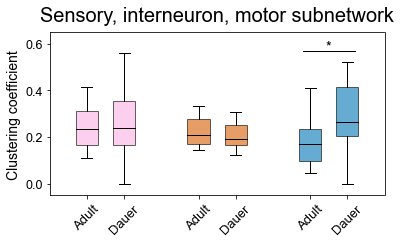

In [35]:
# adult mean (threshed)

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(6,3))
body_alpha = 0.3; bw = 0.6
xpos1 = np.arange(1,3,1)  # 1 ~ 2
xpos2 = np.arange(4,6,1)  # 4 ~ 5
xpos3 = np.arange(7,9,1)  # 7 ~ 8
ax1.set_title("Sensory, interneuron, motor subnetwork", x=0.5, y=1.03, fontsize=20, fontname='Arial')
# =====================================================================================
# sensory
ax1.set_ylabel('Clustering coefficient', fontsize=14, fontname='Arial')
ax1.boxplot(adults_SS_cc_threshed_mean, positions=[xpos1[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(dauer_SS_cc_threshed, positions=[xpos1[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})

# inter
ax1.boxplot(adults_II_cc_threshed_mean, positions=[xpos2[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(dauer_II_cc_threshed, positions=[xpos2[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})

# motor
ax1.boxplot(adults_MM_cc_threshed_mean, positions=[xpos3[0]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(dauer_MM_cc_threshed, positions=[xpos3[1]], widths=bw, patch_artist=True, showmeans=False,\
            showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})

ax1.plot([6.8,8.2], [0.57,0.57], lw=1.0, c='k')
ax1.text(7.5, 0.62, "*", ha='center', va='top', color='k', fontsize=14, fontname='Arial', rotation=0)

ax1.set_xticks(np.concatenate((xpos1,xpos2,xpos3), axis=None))
ax1.set_xticklabels(["Adult","Dauer"]*3, fontsize=13, rotation=45, fontname='Arial', ha='center')
ax1.set_yticks(np.arange(0,0.65,0.2))
ax1.set_yticklabels(["0.0","0.2","0.4","0.6"], fontsize=12.5, rotation=0, fontname='Arial')
ax1.set_ylim(-0.05,0.65)
plt.xlim(0, 9)

# plt.savefig(r'D:\fig_6c.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


### Average path length

In [36]:
# original pl

dauer_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dauer_G_180bi, cutoff=None, weight=None))
dauer_pl_temp = []
for ii in range(len(dauer_pl_dict)):
    if len(dauer_pl_dict[ii])-1==0:
        continue
    else:
        dauer_pl_temp.append( sum(dauer_pl_dict[ii].values()) / (len(dauer_pl_dict[ii])-1) )  # exclude pl to 'self'
dauer_PL = np.mean(dauer_pl_temp)

dset1_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset1_G_180bi, cutoff=None, weight=None))
dset1_pl_temp = []
for ii in range(len(dset1_pl_dict)):
    if len(dset1_pl_dict[ii])-1==0:
        continue
    else:
        dset1_pl_temp.append( sum(dset1_pl_dict[ii].values()) / (len(dset1_pl_dict[ii])-1) )
dset1_PL = np.mean(dset1_pl_temp)

dset2_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset2_G_180bi, cutoff=None, weight=None))
dset2_pl_temp = []
for ii in range(len(dset2_pl_dict)):
    if len(dset2_pl_dict[ii])-1==0:
        continue
    else:
        dset2_pl_temp.append( sum(dset2_pl_dict[ii].values()) / (len(dset2_pl_dict[ii])-1) )
dset2_PL = np.mean(dset2_pl_temp)

dset3_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset3_G_180bi, cutoff=None, weight=None))
dset3_pl_temp = []
for ii in range(len(dset3_pl_dict)):
    if len(dset3_pl_dict[ii])-1==0:
        continue
    else:
        dset3_pl_temp.append( sum(dset3_pl_dict[ii].values()) / (len(dset3_pl_dict[ii])-1) )
dset3_PL = np.mean(dset3_pl_temp)

dset4_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset4_G_180bi, cutoff=None, weight=None))
dset4_pl_temp = []
for ii in range(len(dset4_pl_dict)):
    if len(dset4_pl_dict[ii])-1==0:
        continue
    else:
        dset4_pl_temp.append( sum(dset4_pl_dict[ii].values()) / (len(dset4_pl_dict[ii])-1) )
dset4_PL = np.mean(dset4_pl_temp)

dset5_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset5_G_180bi, cutoff=None, weight=None))
dset5_pl_temp = []
for ii in range(len(dset5_pl_dict)):
    if len(dset5_pl_dict[ii])-1==0:
        continue
    else:
        dset5_pl_temp.append( sum(dset5_pl_dict[ii].values()) / (len(dset5_pl_dict[ii])-1) )
dset5_PL = np.mean(dset5_pl_temp)

dset6_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset6_G_180bi, cutoff=None, weight=None))
dset6_pl_temp = []
for ii in range(len(dset6_pl_dict)):
    if len(dset6_pl_dict[ii])-1==0:
        continue
    else:
        dset6_pl_temp.append( sum(dset6_pl_dict[ii].values()) / (len(dset6_pl_dict[ii])-1) )
dset6_PL = np.mean(dset6_pl_temp)

dset7_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset7_G_180bi, cutoff=None, weight=None))
dset7_pl_temp = []
for ii in range(len(dset7_pl_dict)):
    if len(dset7_pl_dict[ii])-1==0:
        continue
    else:
        dset7_pl_temp.append( sum(dset7_pl_dict[ii].values()) / (len(dset7_pl_dict[ii])-1) )
dset7_PL = np.mean(dset7_pl_temp)

dset8_pl_dict = dict(nx.all_pairs_dijkstra_path_length(dset8_G_180bi, cutoff=None, weight=None))
dset8_pl_temp = []
for ii in range(len(dset8_pl_dict)):
    if len(dset8_pl_dict[ii])-1==0:
        continue
    else:
        dset8_pl_temp.append( sum(dset8_pl_dict[ii].values()) / (len(dset8_pl_dict[ii])-1) )
dset8_PL = np.mean(dset8_pl_temp)

jsh_pl_dict = dict(nx.all_pairs_dijkstra_path_length(jsh_G_180bi, cutoff=None, weight=None))
jsh_pl_temp = []
for ii in range(len(jsh_pl_dict)):
    if len(jsh_pl_dict[ii])-1==0:
        continue
    else:
        jsh_pl_temp.append( sum(jsh_pl_dict[ii].values()) / (len(jsh_pl_dict[ii])-1) )
jsh_PL = np.mean(jsh_pl_temp)

n2u_pl_dict = dict(nx.all_pairs_dijkstra_path_length(n2u_G_180bi, cutoff=None, weight=None))
n2u_pl_temp = []
for ii in range(len(n2u_pl_dict)):
    if len(n2u_pl_dict[ii])-1==0:
        continue
    else:
        n2u_pl_temp.append( sum(n2u_pl_dict[ii].values()) / (len(n2u_pl_dict[ii])-1) )
n2u_PL = np.mean(n2u_pl_temp)



In [37]:

PL_sem = np.zeros(11)
PL_sem[0] = sem(dset1_pl_temp); PL_sem[1] = sem(dset2_pl_temp)
PL_sem[2] = sem(dset3_pl_temp); PL_sem[3] = sem(dset4_pl_temp)
PL_sem[4] = sem(dset5_pl_temp); PL_sem[5] = sem(dset6_pl_temp)
PL_sem[6] = sem(jsh_pl_temp); PL_sem[7] = sem(dset7_pl_temp)
PL_sem[8] = sem(dset8_pl_temp); PL_sem[9] = sem(n2u_pl_temp)
PL_sem[10] = sem(dauer_pl_temp)

PL_std = np.zeros(11)
PL_std[0] = np.std(dset1_pl_temp); PL_std[1] = np.std(dset2_pl_temp)
PL_std[2] = np.std(dset3_pl_temp); PL_std[3] = np.std(dset4_pl_temp)
PL_std[4] = np.std(dset5_pl_temp); PL_std[5] = np.std(dset6_pl_temp)
PL_std[6] = np.std(jsh_pl_temp); PL_std[7] = np.std(dset7_pl_temp)
PL_std[8] = np.std(dset8_pl_temp); PL_std[9] = np.std(n2u_pl_temp)
PL_std[10] = np.std(dauer_pl_temp)

PL_mean = [dset1_PL, dset2_PL, dset3_PL, dset4_PL, dset5_PL, dset6_PL, jsh_PL, dset7_PL, dset8_PL, n2u_PL, dauer_PL]


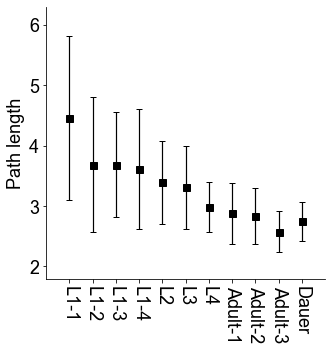

In [38]:
# plot average path length

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,5))
xpos = np.arange(1,12,1)

ax1.errorbar(xpos, PL_mean, yerr=PL_std, alpha=1.0, markersize=7, elinewidth=1.2,\
             fmt='s', ecolor='k', color='k', capsize=3, label='Reference')
ax1.set_ylabel("Path length", fontsize=18, fontname='Arial')
ax1.set_yticks(np.arange(2,6.5,1))
ax1.set_yticklabels(["2","3","4","5","6"], fontsize=18, fontname='Arial')
ax1.set_xticks(xpos)
ax1.set_xticklabels(["L1-1","L1-2","L1-3","L1-4","L2","L3","L4","Adult-1","Adult-2","Adult-3","Dauer"],\
                    rotation=-90, fontsize=18, fontname='Arial')
ax1.set_xlim(0,12)
ax1.set_ylim(1.8,6.3)
ax1.spines[['right','top']].set_visible(False)

# plt.savefig(r'D:\fig_5c.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


### Dauer, Adults - Pairwise common connections

In [39]:
# Dauer & Adult-1
d_a1_cm = np.copy(norm180_comp_bi[:,:,10] + norm180_comp_bi[:,:,6])
d_a1_cm[d_a1_cm==1] = 0; d_a1_cm[d_a1_cm==2] = 1

# Dauer & Adult-2
d_a2_cm = np.copy(norm180_comp_bi[:,:,10] + norm180_comp_bi[:,:,7])
d_a2_cm[d_a2_cm==1] = 0; d_a2_cm[d_a2_cm==2] = 1

# Dauer & Adult-3
d_a3_cm = np.copy(norm180_comp_bi[:,:,10] + norm180_comp_bi[:,:,9])
d_a3_cm[d_a3_cm==1] = 0; d_a3_cm[d_a3_cm==2] = 1

# Adult-1 & Adult-2
a1_a2_cm = np.copy(norm180_comp_bi[:,:,6] + norm180_comp_bi[:,:,7])
a1_a2_cm[a1_a2_cm==1] = 0; a1_a2_cm[a1_a2_cm==2] = 1

# Adult-1 & Adult-3
a1_a3_cm = np.copy(norm180_comp_bi[:,:,6] + norm180_comp_bi[:,:,9])
a1_a3_cm[a1_a3_cm==1] = 0; a1_a3_cm[a1_a3_cm==2] = 1

# Adult-2 & Adult-3
a2_a3_cm = np.copy(norm180_comp_bi[:,:,7] + norm180_comp_bi[:,:,9])
a2_a3_cm[a2_a3_cm==1] = 0; a2_a3_cm[a2_a3_cm==2] = 1


In [40]:
# connection number
d_a1_cm_N = np.zeros(9)
d_a1_cm_N[0] = np.nonzero(d_a1_cm[np.ix_(sen_idx_180,sen_idx_180)])[0].size
d_a1_cm_N[1] = np.nonzero(d_a1_cm[np.ix_(sen_idx_180,int_idx_180)])[0].size
d_a1_cm_N[2] = np.nonzero(d_a1_cm[np.ix_(sen_idx_180,mot_idx_180)])[0].size
d_a1_cm_N[3] = np.nonzero(d_a1_cm[np.ix_(int_idx_180,sen_idx_180)])[0].size
d_a1_cm_N[4] = np.nonzero(d_a1_cm[np.ix_(int_idx_180,int_idx_180)])[0].size
d_a1_cm_N[5] = np.nonzero(d_a1_cm[np.ix_(int_idx_180,mot_idx_180)])[0].size
d_a1_cm_N[6] = np.nonzero(d_a1_cm[np.ix_(mot_idx_180,sen_idx_180)])[0].size
d_a1_cm_N[7] = np.nonzero(d_a1_cm[np.ix_(mot_idx_180,int_idx_180)])[0].size
d_a1_cm_N[8] = np.nonzero(d_a1_cm[np.ix_(mot_idx_180,mot_idx_180)])[0].size

d_a2_cm_N = np.zeros(9)
d_a2_cm_N[0] = np.nonzero(d_a2_cm[np.ix_(sen_idx_180,sen_idx_180)])[0].size
d_a2_cm_N[1] = np.nonzero(d_a2_cm[np.ix_(sen_idx_180,int_idx_180)])[0].size
d_a2_cm_N[2] = np.nonzero(d_a2_cm[np.ix_(sen_idx_180,mot_idx_180)])[0].size
d_a2_cm_N[3] = np.nonzero(d_a2_cm[np.ix_(int_idx_180,sen_idx_180)])[0].size
d_a2_cm_N[4] = np.nonzero(d_a2_cm[np.ix_(int_idx_180,int_idx_180)])[0].size
d_a2_cm_N[5] = np.nonzero(d_a2_cm[np.ix_(int_idx_180,mot_idx_180)])[0].size
d_a2_cm_N[6] = np.nonzero(d_a2_cm[np.ix_(mot_idx_180,sen_idx_180)])[0].size
d_a2_cm_N[7] = np.nonzero(d_a2_cm[np.ix_(mot_idx_180,int_idx_180)])[0].size
d_a2_cm_N[8] = np.nonzero(d_a2_cm[np.ix_(mot_idx_180,mot_idx_180)])[0].size

d_a3_cm_N = np.zeros(9)
d_a3_cm_N[0] = np.nonzero(d_a3_cm[np.ix_(sen_idx_180,sen_idx_180)])[0].size
d_a3_cm_N[1] = np.nonzero(d_a3_cm[np.ix_(sen_idx_180,int_idx_180)])[0].size
d_a3_cm_N[2] = np.nonzero(d_a3_cm[np.ix_(sen_idx_180,mot_idx_180)])[0].size
d_a3_cm_N[3] = np.nonzero(d_a3_cm[np.ix_(int_idx_180,sen_idx_180)])[0].size
d_a3_cm_N[4] = np.nonzero(d_a3_cm[np.ix_(int_idx_180,int_idx_180)])[0].size
d_a3_cm_N[5] = np.nonzero(d_a3_cm[np.ix_(int_idx_180,mot_idx_180)])[0].size
d_a3_cm_N[6] = np.nonzero(d_a3_cm[np.ix_(mot_idx_180,sen_idx_180)])[0].size
d_a3_cm_N[7] = np.nonzero(d_a3_cm[np.ix_(mot_idx_180,int_idx_180)])[0].size
d_a3_cm_N[8] = np.nonzero(d_a3_cm[np.ix_(mot_idx_180,mot_idx_180)])[0].size

a1_a2_cm_N = np.zeros(9)
a1_a2_cm_N[0] = np.nonzero(a1_a2_cm[np.ix_(sen_idx_180,sen_idx_180)])[0].size
a1_a2_cm_N[1] = np.nonzero(a1_a2_cm[np.ix_(sen_idx_180,int_idx_180)])[0].size
a1_a2_cm_N[2] = np.nonzero(a1_a2_cm[np.ix_(sen_idx_180,mot_idx_180)])[0].size
a1_a2_cm_N[3] = np.nonzero(a1_a2_cm[np.ix_(int_idx_180,sen_idx_180)])[0].size
a1_a2_cm_N[4] = np.nonzero(a1_a2_cm[np.ix_(int_idx_180,int_idx_180)])[0].size
a1_a2_cm_N[5] = np.nonzero(a1_a2_cm[np.ix_(int_idx_180,mot_idx_180)])[0].size
a1_a2_cm_N[6] = np.nonzero(a1_a2_cm[np.ix_(mot_idx_180,sen_idx_180)])[0].size
a1_a2_cm_N[7] = np.nonzero(a1_a2_cm[np.ix_(mot_idx_180,int_idx_180)])[0].size
a1_a2_cm_N[8] = np.nonzero(a1_a2_cm[np.ix_(mot_idx_180,mot_idx_180)])[0].size

a1_a3_cm_N = np.zeros(9)
a1_a3_cm_N[0] = np.nonzero(a1_a3_cm[np.ix_(sen_idx_180,sen_idx_180)])[0].size
a1_a3_cm_N[1] = np.nonzero(a1_a3_cm[np.ix_(sen_idx_180,int_idx_180)])[0].size
a1_a3_cm_N[2] = np.nonzero(a1_a3_cm[np.ix_(sen_idx_180,mot_idx_180)])[0].size
a1_a3_cm_N[3] = np.nonzero(a1_a3_cm[np.ix_(int_idx_180,sen_idx_180)])[0].size
a1_a3_cm_N[4] = np.nonzero(a1_a3_cm[np.ix_(int_idx_180,int_idx_180)])[0].size
a1_a3_cm_N[5] = np.nonzero(a1_a3_cm[np.ix_(int_idx_180,mot_idx_180)])[0].size
a1_a3_cm_N[6] = np.nonzero(a1_a3_cm[np.ix_(mot_idx_180,sen_idx_180)])[0].size
a1_a3_cm_N[7] = np.nonzero(a1_a3_cm[np.ix_(mot_idx_180,int_idx_180)])[0].size
a1_a3_cm_N[8] = np.nonzero(a1_a3_cm[np.ix_(mot_idx_180,mot_idx_180)])[0].size

a2_a3_cm_N = np.zeros(9)
a2_a3_cm_N[0] = np.nonzero(a2_a3_cm[np.ix_(sen_idx_180,sen_idx_180)])[0].size
a2_a3_cm_N[1] = np.nonzero(a2_a3_cm[np.ix_(sen_idx_180,int_idx_180)])[0].size
a2_a3_cm_N[2] = np.nonzero(a2_a3_cm[np.ix_(sen_idx_180,mot_idx_180)])[0].size
a2_a3_cm_N[3] = np.nonzero(a2_a3_cm[np.ix_(int_idx_180,sen_idx_180)])[0].size
a2_a3_cm_N[4] = np.nonzero(a2_a3_cm[np.ix_(int_idx_180,int_idx_180)])[0].size
a2_a3_cm_N[5] = np.nonzero(a2_a3_cm[np.ix_(int_idx_180,mot_idx_180)])[0].size
a2_a3_cm_N[6] = np.nonzero(a2_a3_cm[np.ix_(mot_idx_180,sen_idx_180)])[0].size
a2_a3_cm_N[7] = np.nonzero(a2_a3_cm[np.ix_(mot_idx_180,int_idx_180)])[0].size
a2_a3_cm_N[8] = np.nonzero(a2_a3_cm[np.ix_(mot_idx_180,mot_idx_180)])[0].size


#### ( Type-wise )

In [41]:
# connection number
d_a1_cm_SS = np.sum(d_a1_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1)
d_a1_cm_SI = np.sum(d_a1_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1)
d_a1_cm_SM = np.sum(d_a1_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1)
d_a1_cm_IS = np.sum(d_a1_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1)
d_a1_cm_II = np.sum(d_a1_cm[np.ix_(int_idx_180,int_idx_180)], axis=1)
d_a1_cm_IM = np.sum(d_a1_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1)
d_a1_cm_MS = np.sum(d_a1_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1)
d_a1_cm_MI = np.sum(d_a1_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1)
d_a1_cm_MM = np.sum(d_a1_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1)

d_a2_cm_SS = np.sum(d_a2_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1)
d_a2_cm_SI = np.sum(d_a2_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1)
d_a2_cm_SM = np.sum(d_a2_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1)
d_a2_cm_IS = np.sum(d_a2_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1)
d_a2_cm_II = np.sum(d_a2_cm[np.ix_(int_idx_180,int_idx_180)], axis=1)
d_a2_cm_IM = np.sum(d_a2_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1)
d_a2_cm_MS = np.sum(d_a2_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1)
d_a2_cm_MI = np.sum(d_a2_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1)
d_a2_cm_MM = np.sum(d_a2_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1)

d_a3_cm_SS = np.sum(d_a3_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1)
d_a3_cm_SI = np.sum(d_a3_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1)
d_a3_cm_SM = np.sum(d_a3_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1)
d_a3_cm_IS = np.sum(d_a3_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1)
d_a3_cm_II = np.sum(d_a3_cm[np.ix_(int_idx_180,int_idx_180)], axis=1)
d_a3_cm_IM = np.sum(d_a3_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1)
d_a3_cm_MS = np.sum(d_a3_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1)
d_a3_cm_MI = np.sum(d_a3_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1)
d_a3_cm_MM = np.sum(d_a3_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1)

a1_a2_cm_SS = np.sum(a1_a2_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1)
a1_a2_cm_SI = np.sum(a1_a2_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1)
a1_a2_cm_SM = np.sum(a1_a2_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1)
a1_a2_cm_IS = np.sum(a1_a2_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1)
a1_a2_cm_II = np.sum(a1_a2_cm[np.ix_(int_idx_180,int_idx_180)], axis=1)
a1_a2_cm_IM = np.sum(a1_a2_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1)
a1_a2_cm_MS = np.sum(a1_a2_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1)
a1_a2_cm_MI = np.sum(a1_a2_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1)
a1_a2_cm_MM = np.sum(a1_a2_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1)

a1_a3_cm_SS = np.sum(a1_a3_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1)
a1_a3_cm_SI = np.sum(a1_a3_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1)
a1_a3_cm_SM = np.sum(a1_a3_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1)
a1_a3_cm_IS = np.sum(a1_a3_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1)
a1_a3_cm_II = np.sum(a1_a3_cm[np.ix_(int_idx_180,int_idx_180)], axis=1)
a1_a3_cm_IM = np.sum(a1_a3_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1)
a1_a3_cm_MS = np.sum(a1_a3_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1)
a1_a3_cm_MI = np.sum(a1_a3_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1)
a1_a3_cm_MM = np.sum(a1_a3_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1)

a2_a3_cm_SS = np.sum(a2_a3_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1)
a2_a3_cm_SI = np.sum(a2_a3_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1)
a2_a3_cm_SM = np.sum(a2_a3_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1)
a2_a3_cm_IS = np.sum(a2_a3_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1)
a2_a3_cm_II = np.sum(a2_a3_cm[np.ix_(int_idx_180,int_idx_180)], axis=1)
a2_a3_cm_IM = np.sum(a2_a3_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1)
a2_a3_cm_MS = np.sum(a2_a3_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1)
a2_a3_cm_MI = np.sum(a2_a3_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1)
a2_a3_cm_MM = np.sum(a2_a3_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1)


### S>, I>, M>

In [42]:
# connection number

d_a1_cm_S = np.sum(d_a1_cm[np.ix_(sen_idx_180,np.arange(0,180,1))], axis=1)
d_a1_cm_I = np.sum(d_a1_cm[np.ix_(int_idx_180,np.arange(0,180,1))], axis=1)
d_a1_cm_M = np.sum(d_a1_cm[np.ix_(mot_idx_180,np.arange(0,180,1))], axis=1)

d_a2_cm_S = np.sum(d_a2_cm[np.ix_(sen_idx_180,np.arange(0,180,1))], axis=1)
d_a2_cm_I = np.sum(d_a2_cm[np.ix_(int_idx_180,np.arange(0,180,1))], axis=1)
d_a2_cm_M = np.sum(d_a2_cm[np.ix_(mot_idx_180,np.arange(0,180,1))], axis=1)

d_a3_cm_S = np.sum(d_a3_cm[np.ix_(sen_idx_180,np.arange(0,180,1))], axis=1)
d_a3_cm_I = np.sum(d_a3_cm[np.ix_(int_idx_180,np.arange(0,180,1))], axis=1)
d_a3_cm_M = np.sum(d_a3_cm[np.ix_(mot_idx_180,np.arange(0,180,1))], axis=1)

a1_a2_cm_S = np.sum(a1_a2_cm[np.ix_(sen_idx_180,np.arange(0,180,1))], axis=1)
a1_a2_cm_I = np.sum(a1_a2_cm[np.ix_(int_idx_180,np.arange(0,180,1))], axis=1)
a1_a2_cm_M = np.sum(a1_a2_cm[np.ix_(mot_idx_180,np.arange(0,180,1))], axis=1)

a1_a3_cm_S = np.sum(a1_a3_cm[np.ix_(sen_idx_180,np.arange(0,180,1))], axis=1)
a1_a3_cm_I = np.sum(a1_a3_cm[np.ix_(int_idx_180,np.arange(0,180,1))], axis=1)
a1_a3_cm_M = np.sum(a1_a3_cm[np.ix_(mot_idx_180,np.arange(0,180,1))], axis=1)

a2_a3_cm_S = np.sum(a2_a3_cm[np.ix_(sen_idx_180,np.arange(0,180,1))], axis=1)
a2_a3_cm_I = np.sum(a2_a3_cm[np.ix_(int_idx_180,np.arange(0,180,1))], axis=1)
a2_a3_cm_M = np.sum(a2_a3_cm[np.ix_(mot_idx_180,np.arange(0,180,1))], axis=1)


In [43]:
# mask for connection=0

OUT_0_mask = np.ones((11,11,norm180_comp.shape[0]))

for ii in range(norm180_comp.shape[0]):
    ds1 = norm180_comp_bi[ii,:,0]; ds2 = norm180_comp_bi[ii,:,1]; ds3 = norm180_comp_bi[ii,:,2]
    ds4 = norm180_comp_bi[ii,:,3]; ds5 = norm180_comp_bi[ii,:,4]; ds6 = norm180_comp_bi[ii,:,5]
    ds7 = norm180_comp_bi[ii,:,6]; ds8 = norm180_comp_bi[ii,:,7]; jsh = norm180_comp_bi[ii,:,8]
    n2u = norm180_comp_bi[ii,:,9]; da = norm180_comp_bi[ii,:,10]
    
    data = np.vstack((ds1,ds2,ds3,ds4,ds5,ds6,jsh,ds7,ds8,n2u,da))
    
    for jj in range(data.shape[0]):
        for kk in range(data.shape[0]):
            v1 = data[jj,:]; v2 = data[kk,:]
            if (np.nonzero(v1)[0].size==0) and (np.nonzero(v2)[0].size==0):  # or -> and
                OUT_0_mask[jj,kk,ii] = -1
            else:
                continue

OUT_0_mask_A = np.copy(OUT_0_mask[7:,7:,:])  # adults & dauer


# common connection number compilation
d_a_cm_comp = np.zeros((4,4,norm180_comp.shape[0]))  # A1, A2, A3, Da
d_a_cm_comp[0,1,:] = np.copy(np.sum(a1_a2_cm, axis=1))
d_a_cm_comp[0,2,:] = np.copy(np.sum(a1_a3_cm, axis=1))
d_a_cm_comp[0,3,:] = np.copy(np.sum(d_a1_cm, axis=1))
d_a_cm_comp[1,2,:] = np.copy(np.sum(a2_a3_cm, axis=1))
d_a_cm_comp[1,3,:] = np.copy(np.sum(d_a2_cm, axis=1))
d_a_cm_comp[2,3,:] = np.copy(np.sum(d_a3_cm, axis=1))

d_a_cm_comp_masked = np.copy(d_a_cm_comp)
d_a_cm_comp_masked[np.where(OUT_0_mask_A==-1)] = -1


In [44]:
# S>, I>, M>

d_a_cm_S_comp = np.copy(d_a_cm_comp[:,:,sen_idx_180])
d_a_cm_I_comp = np.copy(d_a_cm_comp[:,:,int_idx_180])
d_a_cm_M_comp = np.copy(d_a_cm_comp[:,:,mot_idx_180])

d_a_cm_S_comp_masked = np.copy(d_a_cm_comp_masked[:,:,sen_idx_180])
d_a_cm_I_comp_masked = np.copy(d_a_cm_comp_masked[:,:,int_idx_180])
d_a_cm_M_comp_masked = np.copy(d_a_cm_comp_masked[:,:,mot_idx_180])


In [45]:
# typewise

d_a_cm_SS_comp = np.zeros((4,4,sen_idx_180.size)); d_a_cm_SI_comp = np.zeros((4,4,sen_idx_180.size))
d_a_cm_SM_comp = np.zeros((4,4,sen_idx_180.size))
d_a_cm_IS_comp = np.zeros((4,4,int_idx_180.size)); d_a_cm_II_comp = np.zeros((4,4,int_idx_180.size))
d_a_cm_IM_comp = np.zeros((4,4,int_idx_180.size))
d_a_cm_MS_comp = np.zeros((4,4,mot_idx_180.size)); d_a_cm_MI_comp = np.zeros((4,4,mot_idx_180.size))
d_a_cm_MM_comp = np.zeros((4,4,mot_idx_180.size))

d_a_cm_SS_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1))
d_a_cm_SS_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1))
d_a_cm_SS_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1))
d_a_cm_SS_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1))
d_a_cm_SS_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1))
d_a_cm_SS_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(sen_idx_180,sen_idx_180)], axis=1))
d_a_cm_SI_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1))
d_a_cm_SI_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1))
d_a_cm_SI_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1))
d_a_cm_SI_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1))
d_a_cm_SI_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1))
d_a_cm_SI_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(sen_idx_180,int_idx_180)], axis=1))
d_a_cm_SM_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1))
d_a_cm_SM_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1))
d_a_cm_SM_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1))
d_a_cm_SM_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1))
d_a_cm_SM_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1))
d_a_cm_SM_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(sen_idx_180,mot_idx_180)], axis=1))

d_a_cm_IS_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1))
d_a_cm_IS_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1))
d_a_cm_IS_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1))
d_a_cm_IS_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1))
d_a_cm_IS_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1))
d_a_cm_IS_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(int_idx_180,sen_idx_180)], axis=1))
d_a_cm_II_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(int_idx_180,int_idx_180)], axis=1))
d_a_cm_II_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(int_idx_180,int_idx_180)], axis=1))
d_a_cm_II_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(int_idx_180,int_idx_180)], axis=1))
d_a_cm_II_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(int_idx_180,int_idx_180)], axis=1))
d_a_cm_II_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(int_idx_180,int_idx_180)], axis=1))
d_a_cm_II_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(int_idx_180,int_idx_180)], axis=1))
d_a_cm_IM_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1))
d_a_cm_IM_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1))
d_a_cm_IM_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1))
d_a_cm_IM_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1))
d_a_cm_IM_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1))
d_a_cm_IM_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(int_idx_180,mot_idx_180)], axis=1))

d_a_cm_MS_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1))
d_a_cm_MS_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1))
d_a_cm_MS_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1))
d_a_cm_MS_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1))
d_a_cm_MS_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1))
d_a_cm_MS_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(mot_idx_180,sen_idx_180)], axis=1))
d_a_cm_MI_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1))
d_a_cm_MI_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1))
d_a_cm_MI_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1))
d_a_cm_MI_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1))
d_a_cm_MI_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1))
d_a_cm_MI_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(mot_idx_180,int_idx_180)], axis=1))
d_a_cm_MM_comp[0,1,:] = np.copy(np.sum(a1_a2_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1))
d_a_cm_MM_comp[0,2,:] = np.copy(np.sum(a1_a3_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1))
d_a_cm_MM_comp[0,3,:] = np.copy(np.sum(d_a1_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1))
d_a_cm_MM_comp[1,2,:] = np.copy(np.sum(a2_a3_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1))
d_a_cm_MM_comp[1,3,:] = np.copy(np.sum(d_a2_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1))
d_a_cm_MM_comp[2,3,:] = np.copy(np.sum(d_a3_cm[np.ix_(mot_idx_180,mot_idx_180)], axis=1))

# apply mask
d_a_cm_SS_comp_masked = np.copy(d_a_cm_SS_comp); d_a_cm_SS_comp_masked[np.where(OUT_0_mask_A[:,:,sen_idx_180]==-1)] = -1
d_a_cm_SI_comp_masked = np.copy(d_a_cm_SI_comp); d_a_cm_SI_comp_masked[np.where(OUT_0_mask_A[:,:,sen_idx_180]==-1)] = -1
d_a_cm_SM_comp_masked = np.copy(d_a_cm_SM_comp); d_a_cm_SM_comp_masked[np.where(OUT_0_mask_A[:,:,sen_idx_180]==-1)] = -1
d_a_cm_IS_comp_masked = np.copy(d_a_cm_IS_comp); d_a_cm_IS_comp_masked[np.where(OUT_0_mask_A[:,:,int_idx_180]==-1)] = -1
d_a_cm_II_comp_masked = np.copy(d_a_cm_II_comp); d_a_cm_II_comp_masked[np.where(OUT_0_mask_A[:,:,int_idx_180]==-1)] = -1
d_a_cm_IM_comp_masked = np.copy(d_a_cm_IM_comp); d_a_cm_IM_comp_masked[np.where(OUT_0_mask_A[:,:,int_idx_180]==-1)] = -1
d_a_cm_MS_comp_masked = np.copy(d_a_cm_MS_comp); d_a_cm_MS_comp_masked[np.where(OUT_0_mask_A[:,:,mot_idx_180]==-1)] = -1
d_a_cm_MI_comp_masked = np.copy(d_a_cm_MI_comp); d_a_cm_MI_comp_masked[np.where(OUT_0_mask_A[:,:,mot_idx_180]==-1)] = -1
d_a_cm_MM_comp_masked = np.copy(d_a_cm_MM_comp); d_a_cm_MM_comp_masked[np.where(OUT_0_mask_A[:,:,mot_idx_180]==-1)] = -1


In [46]:
# S>, I>, M> mean

temp = np.concatenate((d_a_cm_S_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_S_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_S_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_S_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])  # include 0
    if pick_pos.size==0:
        continue
    else:
        aa_mean_S_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_I_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_I_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_I_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_I_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_I_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_M_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_M_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_M_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_M_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_M_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_S_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_S_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_S_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_S_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_S_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_I_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_I_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_I_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_I_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_I_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_M_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_M_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_M_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_M_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_M_no0[ii] = np.mean(pick_pos)


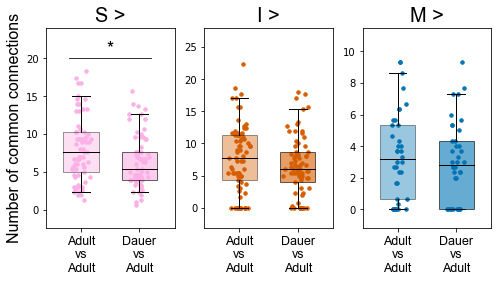

In [47]:
# mean ver.

label = ["Adult\nvs\nAdult","Dauer\nvs\nAdult"]
b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(7,4))
ax1.set_ylabel('Number of common connections', fontsize=16, fontname='Arial')
xpos = np.arange(1,3,1)

ax1.set_title("S >", fontsize=20, fontname='Arial')
ax1.boxplot(aa_mean_S_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(da_mean_S_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_S_no0.size)
ax1.scatter(x, aa_mean_S_no0, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_S_no0.size)
ax1.scatter(x, da_mean_S_no0, color='#FCB0E5', marker='o', s=12, alpha=1.0)

ax1.plot([0.8,2.2], [20,20], lw=0.8, c='k')
ax1.text(1.5, 20, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.set_xlim(0.4,2.6); ax1.set_ylim(-2.4,24)
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax2.set_title("I >", fontsize=20, fontname='Arial')
ax2.boxplot(aa_mean_I_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(da_mean_I_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_I_no0.size)
ax2.scatter(x, aa_mean_I_no0, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_I_no0.size)
ax2.scatter(x, da_mean_I_no0, color='#D65E00', marker='o', s=12, alpha=1.0)

ax2.set_xlim(0.4,2.6); ax2.set_ylim(-3.2,28)
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax3.set_title("M >", fontsize=20, fontname='Arial')
ax3.boxplot(aa_mean_M_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(da_mean_M_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_M_no0.size)
ax3.scatter(x, aa_mean_M_no0, color='#0174B3', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_M_no0.size)
ax3.scatter(x, da_mean_M_no0, color='#0174B3', marker='o', s=12, alpha=1.0)

ax3.set_xlim(0.4,2.6); ax3.set_ylim(-1.2,11.5)
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_6e.svg', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


#### ( full version )

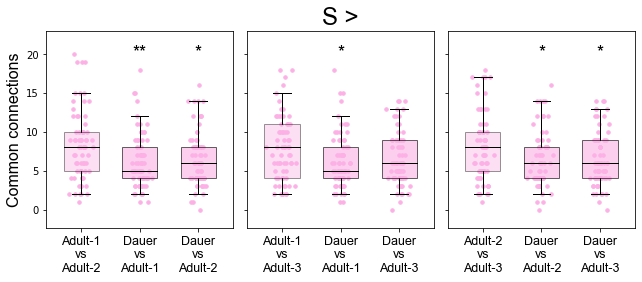

In [48]:
# full ver. - S

b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(9,4))
ax1.set_ylabel('Common connections', fontsize=16, fontname='Arial')
xpos = np.arange(1,4,1)

temp1 = np.copy(d_a_cm_S_comp_masked[0,1,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_S_comp_masked[0,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_S_comp_masked[1,3,:]); temp3 = temp3[temp3>=0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax1.scatter(x, temp3, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax1.set_xlim(0.4,3.6); ax1.set_ylim(-2.4,23)
label = ["Adult-1\nvs\nAdult-2","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-2"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(d_a_cm_S_comp_masked[0,2,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_S_comp_masked[0,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_S_comp_masked[2,3,:]); temp3 = temp3[temp3>=0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax2.scatter(x, temp3, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax2.set_title("S >", fontsize=24, fontname='Arial')
ax2.set_xlim(0.4,3.6)
label = ["Adult-1\nvs\nAdult-3","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-3"]
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(d_a_cm_S_comp_masked[1,2,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_S_comp_masked[1,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_S_comp_masked[2,3,:]); temp3 = temp3[temp3>=0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax3.scatter(x, temp3, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax3.set_xlim(0.4,3.6)
label = ["Adult-2\nvs\nAdult-3","Dauer\nvs\nAdult-2","Dauer\nvs\nAdult-3"]
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax1.text(2, 19, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.text(3, 19, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax2.text(2, 19, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax3.text(2, 19, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax3.text(3, 19, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s8a1.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


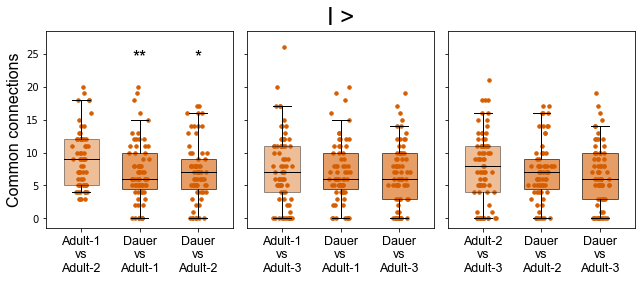

In [49]:
# full ver. - I

b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(9,4))
ax1.set_ylabel('Common connections', fontsize=16, fontname='Arial')
xpos = np.arange(1,4,1)

temp1 = np.copy(d_a_cm_I_comp_masked[0,1,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_I_comp_masked[0,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_I_comp_masked[1,3,:]); temp3 = temp3[temp3>=0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax1.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax1.set_xlim(0.4,3.6); ax1.set_ylim(-1.5,28.5)
label = ["Adult-1\nvs\nAdult-2","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-2"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(d_a_cm_I_comp_masked[0,2,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_I_comp_masked[0,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_I_comp_masked[2,3,:]); temp3 = temp3[temp3>=0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax2.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax2.set_title("I >", fontsize=24, fontname='Arial')
ax2.set_xlim(0.4,3.6)
label = ["Adult-1\nvs\nAdult-3","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-3"]
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(d_a_cm_I_comp_masked[1,2,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_I_comp_masked[1,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_I_comp_masked[2,3,:]); temp3 = temp3[temp3>=0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax3.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax3.set_xlim(0.4,3.6)
label = ["Adult-2\nvs\nAdult-3","Dauer\nvs\nAdult-2","Dauer\nvs\nAdult-3"]
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax1.text(2, 23, "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.text(3, 23, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s8a2.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


In [50]:
# typewise mean (S)

temp = np.concatenate((d_a_cm_SS_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_SS_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_SS_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_SS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])  # include 0
    if pick_pos.size==0:
        continue
    else:
        aa_mean_SS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_SI_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_SI_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_SI_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_SI_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_SI_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_SM_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_SM_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_SM_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_SM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_SM_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_SS_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_SS_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_SS_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_SS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_SS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_SI_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_SI_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_SI_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_SI_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_SI_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_SM_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_SM_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_SM_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_SM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_SM_no0[ii] = np.mean(pick_pos)


In [51]:
# typewise mean (I)

temp = np.concatenate((d_a_cm_IS_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_IS_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_IS_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_IS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])  # include 0
    if pick_pos.size==0:
        continue
    else:
        aa_mean_IS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_II_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_II_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_II_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_II_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_II_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_IM_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_IM_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_IM_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_IM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_IM_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_IS_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_IS_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_IS_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_IS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_IS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_II_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_II_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_II_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_II_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_II_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_IM_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_IM_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_IM_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_IM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_IM_no0[ii] = np.mean(pick_pos)


In [52]:
# typewise mean (M)

temp = np.concatenate((d_a_cm_MS_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_MS_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_MS_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_MS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])  # include 0
    if pick_pos.size==0:
        continue
    else:
        aa_mean_MS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_MI_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_MI_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_MI_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_MI_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_MI_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_MM_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_MM_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_MM_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_MM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_MM_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_MS_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_MS_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_MS_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_MS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_MS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_MI_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_MI_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_MI_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_MI_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_MI_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_MM_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_MM_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_MM_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_MM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_MM_no0[ii] = np.mean(pick_pos)


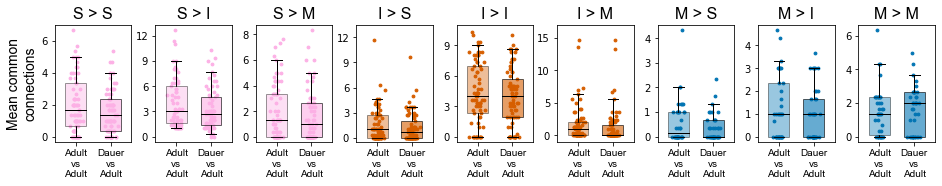

In [53]:
# mean ver.

label = ["Adult\nvs\nAdult","Dauer\nvs\nAdult"]
b_width = 0.6; v_width = 0.6; ssz=13; fsz=10; tsz=16; ms=8


fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(13,2.5))
ax1.set_ylabel('Mean common\nconnections', fontsize=14, fontname='Arial')
xpos = np.arange(1,3,1)

ax1.boxplot(aa_mean_SS_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(da_mean_SS_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_SS_no0.size)
ax1.scatter(x, aa_mean_SS_no0, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_SS_no0.size)
ax1.scatter(x, da_mean_SS_no0, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
ax1.set_title("S > S", fontsize=tsz, fontname='Arial')
ax1.set_xlim(0.4,2.6)
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax2.boxplot(aa_mean_SI_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(da_mean_SI_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_SI_no0.size)
ax2.scatter(x, aa_mean_SI_no0, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_SI_no0.size)
ax2.scatter(x, da_mean_SI_no0, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
ax2.set_title("S > I", fontsize=tsz, fontname='Arial')
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')
ax2.set_yticks([0,3,6,9,12])
ax2.set_yticklabels(["0","3","6","9","12"])

ax3.boxplot(aa_mean_SM_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(da_mean_SM_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_SM_no0.size)
ax3.scatter(x, aa_mean_SM_no0, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_SM_no0.size)
ax3.scatter(x, da_mean_SM_no0, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
ax3.set_title("S > M", fontsize=tsz, fontname='Arial')
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax4.boxplot(aa_mean_IS_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax4.boxplot(da_mean_IS_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_IS_no0.size)
ax4.scatter(x, aa_mean_IS_no0, color='#D65E00', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_IS_no0.size)
ax4.scatter(x, da_mean_IS_no0, color='#D65E00', marker='o', s=ms, alpha=1.0)
ax4.set_title("I > S", fontsize=tsz, fontname='Arial')

ax4.set_ylim(-0.5,13.5)
ax4.set_yticks([0,3,6,9,12])
ax4.set_yticklabels(["0","3","6","9","12"])
ax4.set_xticks(xpos)
ax4.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax5.boxplot(aa_mean_II_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax5.boxplot(da_mean_II_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_II_no0.size)
ax5.scatter(x, aa_mean_II_no0, color='#D65E00', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_II_no0.size)
ax5.scatter(x, da_mean_II_no0, color='#D65E00', marker='o', s=ms, alpha=1.0)
ax5.set_title("I > I", fontsize=tsz, fontname='Arial')

ax5.set_ylim(-0.5,11)
ax5.set_yticks([0,3,6,9])
ax5.set_yticklabels(["0","3","6","9"])
ax5.set_xticks(xpos)
ax5.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax6.boxplot(aa_mean_IM_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax6.boxplot(da_mean_IM_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_IM_no0.size)
ax6.scatter(x, aa_mean_IM_no0, color='#D65E00', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_IM_no0.size)
ax6.scatter(x, da_mean_IM_no0, color='#D65E00', marker='o', s=ms, alpha=1.0)
ax6.set_title("I > M", fontsize=tsz, fontname='Arial')

ax6.set_ylim(-1,17)
ax6.set_xticks(xpos)
ax6.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax7.boxplot(aa_mean_MS_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax7.boxplot(da_mean_MS_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_MS_no0.size)
ax7.scatter(x, aa_mean_MS_no0, color='#0174B3', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_MS_no0.size)
ax7.scatter(x, da_mean_MS_no0, color='#0174B3', marker='o', s=ms, alpha=1.0)
ax7.set_title("M > S", fontsize=tsz, fontname='Arial')
ax7.set_xticks(xpos)
ax7.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax8.boxplot(aa_mean_MI_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax8.boxplot(da_mean_MI_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_MI_no0.size)
ax8.scatter(x, aa_mean_MI_no0, color='#0174B3', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_MI_no0.size)
ax8.scatter(x, da_mean_MI_no0, color='#0174B3', marker='o', s=ms, alpha=1.0)
ax8.set_title("M > I", fontsize=tsz, fontname='Arial')
ax8.set_xticks(xpos)
ax8.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')
ax8.set_yticks([0,1,2,3,4])
ax8.set_yticklabels(["0","1","2","3","4"])

ax9.boxplot(aa_mean_MM_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax9.boxplot(da_mean_MM_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, 'alpha': 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_MM_no0.size)
ax9.scatter(x, aa_mean_MM_no0, color='#0174B3', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_MM_no0.size)
ax9.scatter(x, da_mean_MM_no0, color='#0174B3', marker='o', s=ms, alpha=1.0)
ax9.set_title("M > M", fontsize=tsz, fontname='Arial')

# ax9.set_ylim(-1,7.5)
ax9.set_xticks(xpos)
ax9.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

fig.tight_layout(pad=0.4)

# plt.savefig(r'D:\fig_s8b.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


#### ( Witvliet type )

In [54]:
# S>, I>, M>, m>

d_a_cm_wS_comp = np.copy(d_a_cm_comp[:,:,sen_idx_180_w])
d_a_cm_wI_comp = np.copy(d_a_cm_comp[:,:,int_idx_180_w])
d_a_cm_wM_comp = np.copy(d_a_cm_comp[:,:,mot_idx_180_w])
d_a_cm_wm_comp = np.copy(d_a_cm_comp[:,:,mod_idx_180_w])

d_a_cm_wS_comp_masked = np.copy(d_a_cm_comp_masked[:,:,sen_idx_180_w])
d_a_cm_wI_comp_masked = np.copy(d_a_cm_comp_masked[:,:,int_idx_180_w])
d_a_cm_wM_comp_masked = np.copy(d_a_cm_comp_masked[:,:,mot_idx_180_w])
d_a_cm_wm_comp_masked = np.copy(d_a_cm_comp_masked[:,:,mod_idx_180_w])


In [55]:
# S>, I>, M>, m> mean

temp = np.concatenate((d_a_cm_wS_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_wS_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_wS_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_wS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])  # include 0
    if pick_pos.size==0:
        continue
    else:
        aa_mean_wS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wI_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_wI_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_wI_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_wI_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_wI_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wM_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_wM_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_wM_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_wM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_wM_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wm_comp_masked[0,1,:].reshape(1,-1),\
                       d_a_cm_wm_comp_masked[0,2,:].reshape(1,-1),\
                       d_a_cm_wm_comp_masked[1,2,:].reshape(1,-1)), axis=0)
aa_mean_wm_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        aa_mean_wm_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wS_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_wS_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_wS_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_wS_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_wS_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wI_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_wI_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_wI_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_wI_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_wI_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wM_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_wM_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_wM_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_wM_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_wM_no0[ii] = np.mean(pick_pos)

temp = np.concatenate((d_a_cm_wm_comp_masked[0,3,:].reshape(1,-1),\
                       d_a_cm_wm_comp_masked[1,3,:].reshape(1,-1),\
                       d_a_cm_wm_comp_masked[2,3,:].reshape(1,-1)), axis=0)
da_mean_wm_no0 = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    pick = temp[:,ii]; pick_pos = np.copy(pick[pick>=0])
    if pick_pos.size==0:
        continue
    else:
        da_mean_wm_no0[ii] = np.mean(pick_pos)


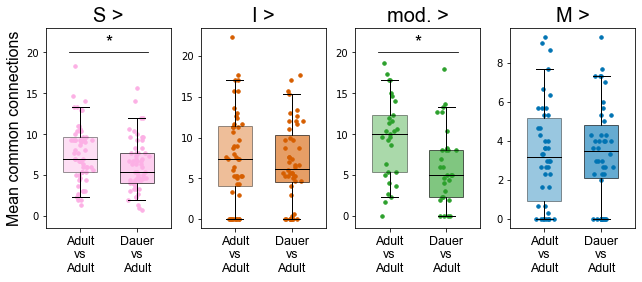

In [56]:
# mean ver.

label = ["Adult\nvs\nAdult","Dauer\nvs\nAdult"]
b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(9,4))
ax1.set_ylabel('Mean common connections', fontsize=16, fontname='Arial')
xpos = np.arange(1,3,1)

ax1.set_title("S >", fontsize=20, fontname='Arial')
ax1.boxplot(aa_mean_wS_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(da_mean_wS_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_wS_no0.size)
ax1.scatter(x, aa_mean_wS_no0, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_wS_no0.size)
ax1.scatter(x, da_mean_wS_no0, color='#FCB0E5', marker='o', s=12, alpha=1.0)

ax1.plot([0.8,2.2], [20,20], lw=0.8, c='k')
ax1.text(1.5, 20, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.set_xlim(0.4,2.6)
ax1.set_ylim(-1.5,23)
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax2.set_title("I >", fontsize=20, fontname='Arial')
ax2.boxplot(aa_mean_wI_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(da_mean_wI_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_wI_no0.size)
ax2.scatter(x, aa_mean_wI_no0, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_wI_no0.size)
ax2.scatter(x, da_mean_wI_no0, color='#D65E00', marker='o', s=12, alpha=1.0)

ax2.set_xlim(0.4,2.6)
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax3.set_title("mod. >", fontsize=20, fontname='Arial')
ax3.boxplot(aa_mean_wm_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('tab:green'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(da_mean_wm_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('tab:green'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_wm_no0.size)
ax3.scatter(x, aa_mean_wm_no0, color='tab:green', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_wm_no0.size)
ax3.scatter(x, da_mean_wm_no0, color='tab:green', marker='o', s=12, alpha=1.0)

ax3.plot([0.8,2.2], [20,20], lw=0.8, c='k')
ax3.text(1.5, 20, "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax3.set_xlim(0.4,2.6)
ax3.set_ylim(-1.5,23)
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax4.set_title("M >", fontsize=20, fontname='Arial')
ax4.boxplot(aa_mean_wM_no0, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax4.boxplot(da_mean_wM_no0, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_mean_wM_no0.size)
ax4.scatter(x, aa_mean_wM_no0, color='#0174B3', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_mean_wM_no0.size)
ax4.scatter(x, da_mean_wM_no0, color='#0174B3', marker='o', s=12, alpha=1.0)

ax4.set_xlim(0.4,2.6)
ax4.set_xticks(xpos)
ax4.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s9a.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


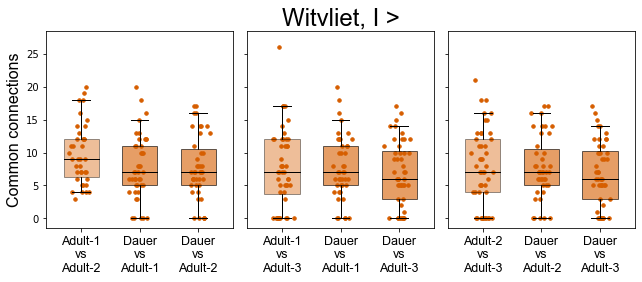

In [57]:
# full ver. - I

b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(9,4))
ax1.set_ylabel('Common connections', fontsize=16, fontname='Arial')
xpos = np.arange(1,4,1)

temp1 = np.copy(d_a_cm_wI_comp_masked[0,1,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_wI_comp_masked[0,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_wI_comp_masked[1,3,:]); temp3 = temp3[temp3>=0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax1.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax1.set_xlim(0.4,3.6); ax1.set_ylim(-1.5,28.5)
label = ["Adult-1\nvs\nAdult-2","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-2"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(d_a_cm_wI_comp_masked[0,2,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_wI_comp_masked[0,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_wI_comp_masked[2,3,:]); temp3 = temp3[temp3>=0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax2.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax2.set_title("Witvliet, I >", fontsize=24, fontname='Arial')
ax2.set_xlim(0.4,3.6)
label = ["Adult-1\nvs\nAdult-3","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-3"]
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(d_a_cm_wI_comp_masked[1,2,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(d_a_cm_wI_comp_masked[1,3,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(d_a_cm_wI_comp_masked[2,3,:]); temp3 = temp3[temp3>=0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax3.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax3.set_xlim(0.4,3.6)
label = ["Adult-2\nvs\nAdult-3","Dauer\nvs\nAdult-2","Dauer\nvs\nAdult-3"]
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s9c.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


---

### Hub neurons

In [58]:
# create random networks (180 X 180)
    # check which type of nx.Graph you're using (Di, MultiDi etc.)

# link probability (permutation)
dauer_N = norm180_comp_bi[:,:,10].shape[0]; dauer_comb = dauer_N*(dauer_N-1)/2
dauer_p = np.nonzero(norm180_comp_bi[:,:,10])[0].size/(dauer_comb*2)
dset7_N = norm180_comp_bi[:,:,6].shape[0]; dset7_comb = dset7_N*(dset7_N-1)/2
dset7_p = np.nonzero(norm180_comp_bi[:,:,6])[0].size/(dset7_comb*2)
dset8_N = norm180_comp_bi[:,:,7].shape[0]; dset8_comb = dset8_N*(dset8_N-1)/2
dset8_p = np.nonzero(norm180_comp_bi[:,:,7])[0].size/(dset8_comb*2)
n2u_N = norm180_comp_bi[:,:,9].shape[0]; n2u_comb = n2u_N*(n2u_N-1)/2
n2u_p = np.nonzero(norm180_comp_bi[:,:,9])[0].size/(n2u_comb*2)


# generate multiple ER

repeat = 100    # change

dauer_er_avg_deg = np.zeros((repeat)); dauer_er_max_deg = np.zeros((repeat))
dset7_er_avg_deg = np.zeros((repeat)); dset7_er_max_deg = np.zeros((repeat))
dset8_er_avg_deg = np.zeros((repeat)); dset8_er_max_deg = np.zeros((repeat))
n2u_er_avg_deg = np.zeros((repeat)); n2u_er_max_deg = np.zeros((repeat))

for ii in tqdm(range(repeat)):
    dauer_ER_G = nx.fast_gnp_random_graph(dauer_N, dauer_p, directed=True)
    dauer_er_avg_deg[ii] = np.mean(list(dict(dauer_ER_G.degree()).values()))
    dauer_er_max_deg[ii] = np.max(list(dict(dauer_ER_G.degree()).values()))
dauer_er_max_deg_m = np.mean(dauer_er_max_deg, axis=0)

for ii in tqdm(range(repeat)):
    dset7_ER_G = nx.fast_gnp_random_graph(dset7_N, dset7_p, directed=True)
    dset7_er_avg_deg[ii] = np.mean(list(dict(dset7_ER_G.degree()).values()))
    dset7_er_max_deg[ii] = np.max(list(dict(dset7_ER_G.degree()).values()))
dset7_er_max_deg_m = np.mean(dset7_er_max_deg, axis=0)

for ii in tqdm(range(repeat)):
    dset8_ER_G = nx.fast_gnp_random_graph(dset8_N, dset8_p, directed=True)
    dset8_er_avg_deg[ii] = np.mean(list(dict(dset8_ER_G.degree()).values()))
    dset8_er_max_deg[ii] = np.max(list(dict(dset8_ER_G.degree()).values()))
dset8_er_max_deg_m = np.mean(dset8_er_max_deg, axis=0)

for ii in tqdm(range(repeat)):
    n2u_ER_G = nx.fast_gnp_random_graph(n2u_N, n2u_p, directed=True)
    n2u_er_avg_deg[ii] = np.mean(list(dict(n2u_ER_G.degree()).values()))
    n2u_er_max_deg[ii] = np.max(list(dict(n2u_ER_G.degree()).values()))
n2u_er_max_deg_m = np.mean(n2u_er_max_deg, axis=0)

print(np.round(dset7_er_max_deg_m,2),"\t",np.round(dset8_er_max_deg_m,2),\
      "\t",np.round(n2u_er_max_deg_m,2),"\t",np.round(dauer_er_max_deg_m,2))


100%|██████████| 100/100 [00:00<00:00, 272.48it/s]

34.59 	 34.17 	 40.11 	 35.43


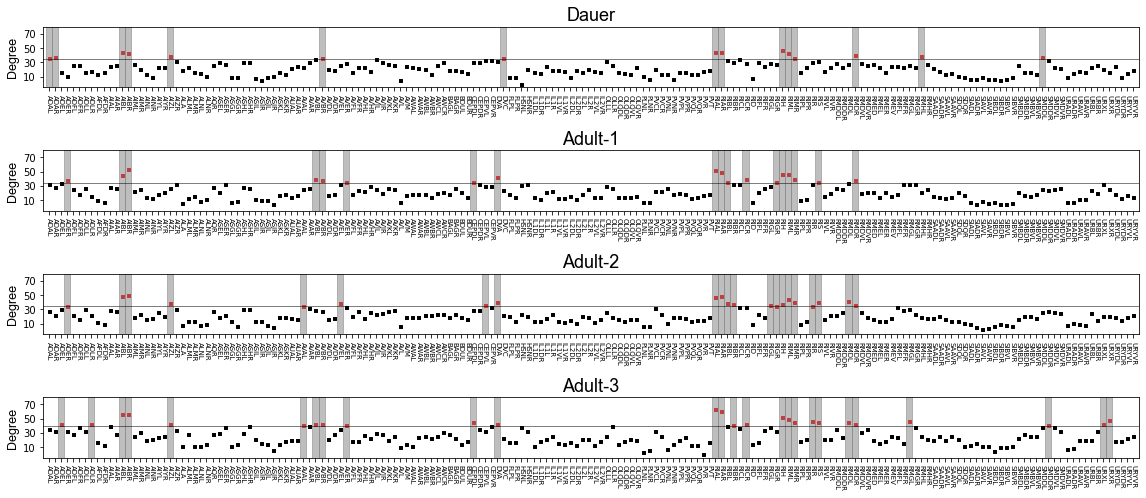

In [59]:
# plot

fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(4, 1, sharex=False, sharey=True, figsize=(16,7))
x_pos = np.arange(180); mks=9; yfsz=12.5

for ii in range(x_pos.size):
    temp_deg = dauer_out_deg[ii]+dauer_in_deg[ii]
    if temp_deg > dauer_er_max_deg_m:
        ax1.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='red')
        ax1.axvspan(x_pos[ii]-0.5,x_pos[ii]+0.5, ymin=-10, ymax=100, alpha=0.5, color='tab:gray')
    else:
        ax1.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='k')
ax1.axhline(y=dauer_er_max_deg_m, color='k', alpha=1.0, linestyle='solid', linewidth=0.5)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(com_id[:180,0], fontsize=7, rotation=-90)
ax1.set_yticks([10,30,50,70])
ax1.set_yticklabels(["10","30","50","70"], rotation=0)
ax1.set_xlim(-1,180)
ax1.set_ylim(-5,80)
ax1.set_ylabel('Degree', fontsize=yfsz, fontname='Arial')
ax1.set_title('Dauer', fontsize=18, fontname='Arial')
# ax1.yaxis.grid(True)

for ii in range(x_pos.size):
    temp_deg = dset7_out_deg[ii]+dset7_in_deg[ii]
    if temp_deg > dset7_er_max_deg_m:
        ax2.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='red')
        ax2.axvspan(x_pos[ii]-0.5,x_pos[ii]+0.5, ymin=-10, ymax=100, alpha=0.5, color='tab:gray')
    else:
        ax2.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='k')
ax2.axhline(y=dset7_er_max_deg_m, color='k', alpha=1.0, linestyle='solid', linewidth=0.5)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(com_id[:180,0], fontsize=7, rotation=-90)
ax2.set_ylabel('Degree', fontsize=yfsz, fontname='Arial')
ax2.set_xlim(-1,180)
ax2.set_title('Adult-1', fontsize=18, fontname='Arial')

for ii in range(x_pos.size):
    temp_deg = dset8_out_deg[ii]+dset8_in_deg[ii]
    if temp_deg > dset8_er_max_deg_m:
        ax3.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='red')
        ax3.axvspan(x_pos[ii]-0.5,x_pos[ii]+0.5, ymin=-10, ymax=100, alpha=0.5, color='tab:gray')
    else:
        ax3.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='k')
ax3.axhline(y=dset8_er_max_deg_m, color='k', alpha=1.0, linestyle='solid', linewidth=0.5)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(com_id[:180,0], fontsize=7, rotation=-90)
ax3.set_ylabel('Degree', fontsize=yfsz, fontname='Arial')
ax3.set_xlim(-1,180)
ax3.set_title('Adult-2', fontsize=18, fontname='Arial')

for ii in range(x_pos.size):
    temp_deg = n2u_out_deg[ii]+n2u_in_deg[ii]
    if temp_deg > n2u_er_max_deg_m:
        ax4.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='red')
        ax4.axvspan(x_pos[ii]-0.5,x_pos[ii]+0.5, ymin=-10, ymax=100, alpha=0.5, color='tab:gray')
    else:
        ax4.scatter(x_pos[ii], temp_deg, s=mks, marker='s', color='k')
ax4.axhline(y=n2u_er_max_deg_m, color='k', alpha=1.0, linestyle='solid', linewidth=0.5)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(com_id[:180,0], fontsize=7, rotation=-90)
ax4.set_ylabel('Degree', fontsize=yfsz, fontname='Arial')
ax4.set_xlim(-1,180)
ax4.set_title('Adult-3', fontsize=18, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s6f.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


#### ( Hub related property )

In [60]:
# average neighbor degree

# directed (out)
dauer_avgND = nx.average_neighbor_degree(dauer_G_180bi, source='out', target='out')
dset1_avgND = nx.average_neighbor_degree(dset1_G_180bi, source='out', target='out')
dset2_avgND = nx.average_neighbor_degree(dset2_G_180bi, source='out', target='out')
dset3_avgND = nx.average_neighbor_degree(dset3_G_180bi, source='out', target='out')
dset4_avgND = nx.average_neighbor_degree(dset4_G_180bi, source='out', target='out')
dset5_avgND = nx.average_neighbor_degree(dset5_G_180bi, source='out', target='out')
dset6_avgND = nx.average_neighbor_degree(dset6_G_180bi, source='out', target='out')
dset7_avgND = nx.average_neighbor_degree(dset7_G_180bi, source='out', target='out')
dset8_avgND = nx.average_neighbor_degree(dset8_G_180bi, source='out', target='out')
jsh_avgND = nx.average_neighbor_degree(jsh_G_180bi, source='out', target='out')
n2u_avgND = nx.average_neighbor_degree(n2u_G_180bi, source='out', target='out')


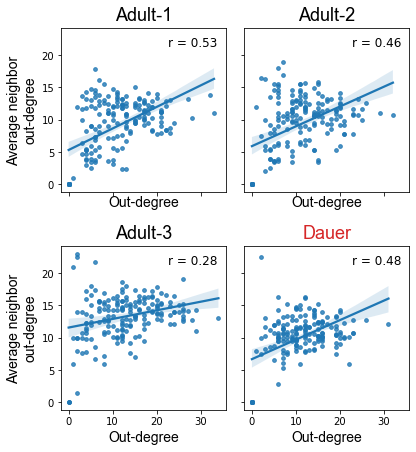

In [61]:
# plot (dauer and adults only)

import seaborn as sns

msz=14; tsz=18; lsz=14; mc="tab:blue"; fsz=12; xx=0.95; yy=0.95

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6,6.5))

ax1.set_ylabel('Average neighbor\nout-degree', fontsize=lsz, fontname='Arial')
ax1.set_xlabel('Out-degree', fontsize=lsz, fontname='Arial')
ax1.set_title("Adult-1", y=1.01, fontsize=tsz, fontname='Arial')
sns.regplot(x=dset7_out_deg, y=list(dset7_avgND.values()), ci=95,\
            marker='o', color=mc, scatter_kws={'s':msz}, ax=ax1)
r, p = stats.pearsonr(dset7_out_deg, list(dset7_avgND.values()))
ax1.text(xx, yy, 'r = {:.2f}'.format(r), fontsize=fsz,\
         ha='right', va='top', transform=ax1.transAxes)
ax2.set_xlabel('Out-degree', fontsize=lsz, fontname='Arial')
ax2.set_title("Adult-2", y=1.01, fontsize=tsz, fontname='Arial')
sns.regplot(x=dset8_out_deg, y=list(dset8_avgND.values()), ci=95,\
            marker='o', color=mc, scatter_kws={'s':msz}, ax=ax2)
r, p = stats.pearsonr(dset8_out_deg, list(dset8_avgND.values()))
ax2.text(xx, yy, 'r = {:.2f}'.format(r), fontsize=fsz,\
         ha='right', va='top', transform=ax2.transAxes)
ax3.set_ylabel('Average neighbor\nout-degree', fontsize=lsz, fontname='Arial')
ax3.set_xlabel('Out-degree', fontsize=lsz, fontname='Arial')
ax3.set_title("Adult-3", y=1.01, fontsize=tsz, fontname='Arial')
sns.regplot(x=n2u_out_deg, y=list(n2u_avgND.values()), ci=95,\
            marker='o', color=mc, scatter_kws={'s':msz}, ax=ax3)
r, p = stats.pearsonr(n2u_out_deg, list(n2u_avgND.values()))
ax3.text(xx, yy, 'r = {:.2f}'.format(r), fontsize=fsz,\
         ha='right', va='top', transform=ax3.transAxes)
ax4.set_xlabel('Out-degree', fontsize=lsz, fontname='Arial')
ax4.set_title("Dauer", y=1.01, color="tab:red", fontsize=tsz, fontname='Arial')
sns.regplot(x=dauer_out_deg, y=list(dauer_avgND.values()), ci=95,\
            marker='o', color=mc, scatter_kws={'s':msz}, ax=ax4)
r, p = stats.pearsonr(dauer_out_deg, list(dauer_avgND.values()))
ax4.text(xx, yy, 'r = {:.2f}'.format(r), fontsize=fsz,\
         ha='right', va='top', transform=ax4.transAxes)

fig.tight_layout(pad=1.5)

# plt.savefig(r'D:\fig_s6e.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


### Modularity ( L/R merged )

In [62]:
# LR pair merge

dauer_LR_merge = np.zeros((len(LR_id),len(LR_id)))  # 97 X 97
dset1_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset2_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset3_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset4_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset5_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset6_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset7_LR_merge = np.zeros((len(LR_id),len(LR_id)))
dset8_LR_merge = np.zeros((len(LR_id),len(LR_id)))
jsh_LR_merge = np.zeros((len(LR_id),len(LR_id)))
n2u_LR_merge = np.zeros((len(LR_id),len(LR_id)))


In [63]:
# (LR merge continue)

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
            # if paired neuron -> unchanged
            # if single neuron -> reduced to 1
        square = norm180_comp[:,:,10][np.ix_(temp_idx1,temp_idx2)]  # change matrix
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dauer_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,0][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset1_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,1][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset2_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,2][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset3_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,3][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset4_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,4][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset5_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,5][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset6_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,6][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset7_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,7][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            dset8_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,8][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            jsh_LR_merge[ii,jj] = square_avg

for ii in tqdm(range(len(LR_id))):
    for jj in range(len(LR_id)):
        temp_idx1 = [com_L_idx[ii],com_R_idx[ii]]; temp_idx2 = [com_L_idx[jj],com_R_idx[jj]]
        temp_idx1 = np.unique(temp_idx1); temp_idx2 = np.unique(temp_idx2)
        square = norm180_comp[:,:,9][np.ix_(temp_idx1,temp_idx2)]
        if temp_idx1.size==1 and temp_idx2.size==1:
            square_avg = np.sum(square)
        elif temp_idx1.size==1 or temp_idx2.size==1:
            square_avg = np.sum(square) / 2
        else:
            square_avg = np.sum(square) / 4
        
        if ii==jj:
            continue
        else:
            n2u_LR_merge[ii,jj] = square_avg


100%|██████████| 97/97 [00:00<00:00, 331.03it/s]


In [64]:
# (optional) merged to binary form

dauer_LR_merge_bi = np.copy(dauer_LR_merge); dauer_LR_merge_bi[dauer_LR_merge_bi!=0] = 1
dset1_LR_merge_bi = np.copy(dset1_LR_merge); dset1_LR_merge_bi[dset1_LR_merge_bi!=0] = 1
dset2_LR_merge_bi = np.copy(dset2_LR_merge); dset2_LR_merge_bi[dset2_LR_merge_bi!=0] = 1
dset3_LR_merge_bi = np.copy(dset3_LR_merge); dset3_LR_merge_bi[dset3_LR_merge_bi!=0] = 1
dset4_LR_merge_bi = np.copy(dset4_LR_merge); dset4_LR_merge_bi[dset4_LR_merge_bi!=0] = 1
dset5_LR_merge_bi = np.copy(dset5_LR_merge); dset5_LR_merge_bi[dset5_LR_merge_bi!=0] = 1
dset6_LR_merge_bi = np.copy(dset6_LR_merge); dset6_LR_merge_bi[dset6_LR_merge_bi!=0] = 1
dset7_LR_merge_bi = np.copy(dset7_LR_merge); dset7_LR_merge_bi[dset7_LR_merge_bi!=0] = 1
dset8_LR_merge_bi = np.copy(dset8_LR_merge); dset8_LR_merge_bi[dset8_LR_merge_bi!=0] = 1
jsh_LR_merge_bi = np.copy(jsh_LR_merge); jsh_LR_merge_bi[jsh_LR_merge_bi!=0] = 1
n2u_LR_merge_bi = np.copy(n2u_LR_merge); n2u_LR_merge_bi[n2u_LR_merge_bi!=0] = 1


In [65]:
# to networkx

dauer_G_LR = nx.from_numpy_array(dauer_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset1_G_LR = nx.from_numpy_array(dset1_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset2_G_LR = nx.from_numpy_array(dset2_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset3_G_LR = nx.from_numpy_array(dset3_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset4_G_LR = nx.from_numpy_array(dset4_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset5_G_LR = nx.from_numpy_array(dset5_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset6_G_LR = nx.from_numpy_array(dset6_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset7_G_LR = nx.from_numpy_array(dset7_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
dset8_G_LR = nx.from_numpy_array(dset8_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
jsh_G_LR = nx.from_numpy_array(jsh_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)
n2u_G_LR = nx.from_numpy_array(n2u_LR_merge_bi, parallel_edges=False, create_using=nx.DiGraph)


---

In [51]:
# community detection on merged matrices

from networkx.algorithms import community

# Greedy modularity algorithm -> Join
dset1_comp = community.greedy_modularity_communities(dset1_G_LR, weight='weight', resolution=1)
print("   L1-1 :", len(dset1_comp), " / ", community.modularity(dset1_G_LR, dset1_comp, weight='weight', resolution=1))
dset2_comp = community.greedy_modularity_communities(dset2_G_LR, weight='weight', resolution=1)
print("   L1-2 :", len(dset2_comp), " / ", community.modularity(dset2_G_LR, dset2_comp, weight='weight', resolution=1))
dset3_comp = community.greedy_modularity_communities(dset3_G_LR, weight='weight', resolution=1)
print("   L1-3 :", len(dset3_comp), " / ", community.modularity(dset3_G_LR, dset3_comp, weight='weight', resolution=1))
dset4_comp = community.greedy_modularity_communities(dset4_G_LR, weight='weight', resolution=1)
print("   L1-4 :", len(dset4_comp), " / ", community.modularity(dset4_G_LR, dset4_comp, weight='weight', resolution=1))
dset5_comp = community.greedy_modularity_communities(dset5_G_LR, weight='weight', resolution=1)
print("     L2 :", len(dset5_comp), "  / ", community.modularity(dset5_G_LR, dset5_comp, weight='weight', resolution=1))
dset6_comp = community.greedy_modularity_communities(dset6_G_LR, weight='weight', resolution=1)
print("     L3 :", len(dset6_comp), "  / ", community.modularity(dset6_G_LR, dset6_comp, weight='weight', resolution=1))
dset7_comp = community.greedy_modularity_communities(dset7_G_LR, weight='weight', resolution=1)
print("Adult-1 :", len(dset7_comp), "  / ", community.modularity(dset7_G_LR, dset7_comp, weight='weight', resolution=1))
dset8_comp = community.greedy_modularity_communities(dset8_G_LR, weight='weight', resolution=1)
print("Adult-2 :", len(dset8_comp), "  / ", community.modularity(dset8_G_LR, dset8_comp, weight='weight', resolution=1))
jsh_comp = community.greedy_modularity_communities(jsh_G_LR, weight='weight', resolution=1)
print("    JSH :", len(jsh_comp), "  / ", community.modularity(jsh_G_LR, jsh_comp, weight='weight', resolution=1))
n2u_comp = community.greedy_modularity_communities(n2u_G_LR, weight='weight', resolution=1)
print("    N2U :", len(n2u_comp), "  / ", community.modularity(n2u_G_LR, n2u_comp, weight='weight', resolution=1))
dauer_comp = community.greedy_modularity_communities(dauer_G_LR, weight='weight', resolution=1)
print("  Dauer :", len(dauer_comp), "  / ", community.modularity(dauer_G_LR, dauer_comp, weight='weight', resolution=1))

dset1_LR_grd_part = list(sorted(list(ii)) for ii in dset1_comp)
dset2_LR_grd_part = list(sorted(list(ii)) for ii in dset2_comp)
dset3_LR_grd_part = list(sorted(list(ii)) for ii in dset3_comp)
dset4_LR_grd_part = list(sorted(list(ii)) for ii in dset4_comp)
dset5_LR_grd_part = list(sorted(list(ii)) for ii in dset5_comp)
dset6_LR_grd_part = list(sorted(list(ii)) for ii in dset6_comp)
dset7_LR_grd_part = list(sorted(list(ii)) for ii in dset7_comp)
dset8_LR_grd_part = list(sorted(list(ii)) for ii in dset8_comp)
jsh_LR_grd_part = list(sorted(list(ii)) for ii in jsh_comp)
n2u_LR_grd_part = list(sorted(list(ii)) for ii in n2u_comp)
dauer_LR_grd_part = list(sorted(list(ii)) for ii in dauer_comp)


   L1-1 : 18  /  0.43880108369445914
   L1-2 : 15  /  0.4012675307323462
   L1-3 : 14  /  0.3921245449858614
   L1-4 : 12  /  0.3764892561983471
     L2 : 7   /  0.3473031111111111
     L3 : 7   /  0.35655036410095076
Adult-1 : 4   /  0.3204238593370372
Adult-2 : 4   /  0.3191804789558176
    JSH : 5   /  0.32090646317493354
    N2U : 4   /  0.27169427892574793
  Dauer : 4   /  0.3094413785922532


In [52]:
# undirected graph for Louvain algorithm (LR merged)

dauer_G_LRun = nx.from_numpy_array(dauer_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset1_G_LRun = nx.from_numpy_array(dset1_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset2_G_LRun = nx.from_numpy_array(dset2_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset3_G_LRun = nx.from_numpy_array(dset3_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset4_G_LRun = nx.from_numpy_array(dset4_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset5_G_LRun = nx.from_numpy_array(dset5_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset6_G_LRun = nx.from_numpy_array(dset6_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset7_G_LRun = nx.from_numpy_array(dset7_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
dset8_G_LRun = nx.from_numpy_array(dset8_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
jsh_G_LRun = nx.from_numpy_array(jsh_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)
n2u_G_LRun = nx.from_numpy_array(n2u_LR_merge_bi, parallel_edges=False, create_using=nx.Graph)


In [53]:
# Louvain algorithm (LR merged)

from community import community_louvain

dset1_klist = community_louvain.best_partition(dset1_G_LRun, weight='weight')
maxk = max(list(dset1_klist.values()))+1
dset1_key = np.array(list(dset1_klist.keys())); dset1_val = np.array(list(dset1_klist.values()))
dset1_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset1_val==ii)
    temp = list(dset1_key[indd])
    dset1_LR_lv_part.append(temp)
print("   L1-1 :", maxk, " / ", community.modularity(dset1_G_LRun, dset1_LR_lv_part, weight='weight', resolution=1))

dset2_klist = community_louvain.best_partition(dset2_G_LRun, weight='weight')
maxk = max(list(dset2_klist.values()))+1
dset2_key = np.array(list(dset2_klist.keys())); dset2_val = np.array(list(dset2_klist.values()))
dset2_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset2_val==ii)
    temp = list(dset2_key[indd])
    dset2_LR_lv_part.append(temp)
print("   L1-2 :", maxk, " / ", community.modularity(dset2_G_LRun, dset2_LR_lv_part, weight='weight', resolution=1))

dset3_klist = community_louvain.best_partition(dset3_G_LRun, weight='weight')
maxk = max(list(dset3_klist.values()))+1
dset3_key = np.array(list(dset3_klist.keys())); dset3_val = np.array(list(dset3_klist.values()))
dset3_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset3_val==ii)
    temp = list(dset3_key[indd])
    dset3_LR_lv_part.append(temp)
print("   L1-3 :", maxk, " / ", community.modularity(dset3_G_LRun, dset3_LR_lv_part, weight='weight', resolution=1))

dset4_klist = community_louvain.best_partition(dset4_G_LRun, weight='weight')
maxk = max(list(dset4_klist.values()))+1
dset4_key = np.array(list(dset4_klist.keys())); dset4_val = np.array(list(dset4_klist.values()))
dset4_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset4_val==ii)
    temp = list(dset4_key[indd])
    dset4_LR_lv_part.append(temp)
print("   L1-4 :", maxk, " / ", community.modularity(dset4_G_LRun, dset4_LR_lv_part, weight='weight', resolution=1))

dset5_klist = community_louvain.best_partition(dset5_G_LRun, weight='weight')
maxk = max(list(dset5_klist.values()))+1
dset5_key = np.array(list(dset5_klist.keys())); dset5_val = np.array(list(dset5_klist.values()))
dset5_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset5_val==ii)
    temp = list(dset5_key[indd])
    dset5_LR_lv_part.append(temp)
print("     L2 :", maxk, "  / ", community.modularity(dset5_G_LRun, dset5_LR_lv_part, weight='weight', resolution=1))

dset6_klist = community_louvain.best_partition(dset6_G_LRun, weight='weight')
maxk = max(list(dset6_klist.values()))+1
dset6_key = np.array(list(dset6_klist.keys())); dset6_val = np.array(list(dset6_klist.values()))
dset6_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset6_val==ii)
    temp = list(dset6_key[indd])
    dset6_LR_lv_part.append(temp)
print("     L3 :", maxk, "  / ", community.modularity(dset6_G_LRun, dset6_LR_lv_part, weight='weight', resolution=1))

dset7_klist = community_louvain.best_partition(dset7_G_LRun, weight='weight')
maxk = max(list(dset7_klist.values()))+1
dset7_key = np.array(list(dset7_klist.keys())); dset7_val = np.array(list(dset7_klist.values()))
dset7_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset7_val==ii)
    temp = list(dset7_key[indd])
    dset7_LR_lv_part.append(temp)
print("Adult-1 :", maxk, "  / ", community.modularity(dset7_G_LRun, dset7_LR_lv_part, weight='weight', resolution=1))

dset8_klist = community_louvain.best_partition(dset8_G_LRun, weight='weight')
maxk = max(list(dset8_klist.values()))+1
dset8_key = np.array(list(dset8_klist.keys())); dset8_val = np.array(list(dset8_klist.values()))
dset8_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dset8_val==ii)
    temp = list(dset8_key[indd])
    dset8_LR_lv_part.append(temp)
print("Adult-2 :", maxk, "  / ", community.modularity(dset8_G_LRun, dset8_LR_lv_part, weight='weight', resolution=1))

jsh_klist = community_louvain.best_partition(jsh_G_LRun, weight='weight')
maxk = max(list(jsh_klist.values()))+1
jsh_key = np.array(list(jsh_klist.keys())); jsh_val = np.array(list(jsh_klist.values()))
jsh_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(jsh_val==ii)
    temp = list(jsh_key[indd])
    jsh_LR_lv_part.append(temp)
print("    JSH :", maxk, "  / ", community.modularity(jsh_G_LRun, jsh_LR_lv_part, weight='weight', resolution=1))

n2u_klist = community_louvain.best_partition(n2u_G_LRun, weight='weight')
maxk = max(list(n2u_klist.values()))+1
n2u_key = np.array(list(n2u_klist.keys())); n2u_val = np.array(list(n2u_klist.values()))
n2u_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(n2u_val==ii)
    temp = list(n2u_key[indd])
    n2u_LR_lv_part.append(temp)
print("    N2U :", maxk, "  / ", community.modularity(n2u_G_LRun, n2u_LR_lv_part, weight='weight', resolution=1))

dauer_klist = community_louvain.best_partition(dauer_G_LRun, weight='weight')
maxk = max(list(dauer_klist.values()))+1
dauer_key = np.array(list(dauer_klist.keys())); dauer_val = np.array(list(dauer_klist.values()))
dauer_LR_lv_part = []
for ii in range(maxk):
    indd = np.where(dauer_val==ii)
    temp = list(dauer_key[indd])
    dauer_LR_lv_part.append(temp)
print("  Dauer :", maxk, "  / ", community.modularity(dauer_G_LRun, dauer_LR_lv_part, weight='weight', resolution=1))


   L1-1 : 17  /  0.407863797960019
   L1-2 : 15  /  0.3755930986950405
   L1-3 : 15  /  0.37880301228695995
   L1-4 : 11  /  0.3566847025351826
     L2 : 8   /  0.33147061505437825
     L3 : 8   /  0.33628035626232744
Adult-1 : 4   /  0.2966885329938718
Adult-2 : 4   /  0.30260641957661516
    JSH : 4   /  0.3266402027510081
    N2U : 4   /  0.25981294487970197
  Dauer : 4   /  0.29249228318231607


In [54]:
# exclude single-neuron community (Greedy)

dauer_LR_grd_part_trim = []
for ii in dauer_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dauer_LR_grd_part_trim.append(ii)
print("dauer :", len(dauer_LR_grd_part), "  >> ", len(dauer_LR_grd_part_trim))
dset1_LR_grd_part_trim = []
for ii in dset1_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset1_LR_grd_part_trim.append(ii)
print("dset1 :", len(dset1_LR_grd_part), " >> ", len(dset1_LR_grd_part_trim))
dset2_LR_grd_part_trim = []
for ii in dset2_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset2_LR_grd_part_trim.append(ii)
print("dset2 :", len(dset2_LR_grd_part), " >> ", len(dset2_LR_grd_part_trim))
dset3_LR_grd_part_trim = []
for ii in dset3_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset3_LR_grd_part_trim.append(ii)
print("dset3 :", len(dset3_LR_grd_part), " >> ", len(dset3_LR_grd_part_trim))
dset4_LR_grd_part_trim = []
for ii in dset4_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset4_LR_grd_part_trim.append(ii)
print("dset4 :", len(dset4_LR_grd_part), " >> ", len(dset4_LR_grd_part_trim))
dset5_LR_grd_part_trim = []
for ii in dset5_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset5_LR_grd_part_trim.append(ii)
print("dset5 :", len(dset5_LR_grd_part), "  >> ", len(dset5_LR_grd_part_trim))
dset6_LR_grd_part_trim = []
for ii in dset6_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset6_LR_grd_part_trim.append(ii)
print("dset6 :", len(dset6_LR_grd_part), "  >> ", len(dset6_LR_grd_part_trim))
dset7_LR_grd_part_trim = []
for ii in dset7_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset7_LR_grd_part_trim.append(ii)
print("dset7 :", len(dset7_LR_grd_part), "  >> ", len(dset7_LR_grd_part_trim))
dset8_LR_grd_part_trim = []
for ii in dset8_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        dset8_LR_grd_part_trim.append(ii)
print("dset8 :", len(dset8_LR_grd_part), "  >> ", len(dset8_LR_grd_part_trim))
jsh_LR_grd_part_trim = []
for ii in jsh_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        jsh_LR_grd_part_trim.append(ii)
print("  jsh :", len(jsh_LR_grd_part), "  >> ", len(jsh_LR_grd_part_trim))
n2u_LR_grd_part_trim = []
for ii in n2u_LR_grd_part:
    if len(ii)==1:
        continue
    else:
        n2u_LR_grd_part_trim.append(ii)
print("  n2u :", len(n2u_LR_grd_part), "  >> ", len(n2u_LR_grd_part_trim))


dauer : 4   >>  4
dset1 : 18  >>  7
dset2 : 15  >>  5
dset3 : 14  >>  4
dset4 : 12  >>  6
dset5 : 7   >>  4
dset6 : 7   >>  4
dset7 : 4   >>  4
dset8 : 4   >>  4
  jsh : 5   >>  5
  n2u : 4   >>  4


In [55]:
# exclude single-neuron community (Louvain)

dauer_LR_lv_part_trim = []
for ii in dauer_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dauer_LR_lv_part_trim.append(ii)
print("dauer :", len(dauer_LR_lv_part), "  >> ", len(dauer_LR_lv_part_trim))
dset1_LR_lv_part_trim = []
for ii in dset1_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset1_LR_lv_part_trim.append(ii)
print("dset1 :", len(dset1_LR_lv_part), " >> ", len(dset1_LR_lv_part_trim))
dset2_LR_lv_part_trim = []
for ii in dset2_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset2_LR_lv_part_trim.append(ii)
print("dset2 :", len(dset2_LR_lv_part), " >> ", len(dset2_LR_lv_part_trim))
dset3_LR_lv_part_trim = []
for ii in dset3_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset3_LR_lv_part_trim.append(ii)
print("dset3 :", len(dset3_LR_lv_part), " >> ", len(dset3_LR_lv_part_trim))
dset4_LR_lv_part_trim = []
for ii in dset4_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset4_LR_lv_part_trim.append(ii)
print("dset4 :", len(dset4_LR_lv_part), " >> ", len(dset4_LR_lv_part_trim))
dset5_LR_lv_part_trim = []
for ii in dset5_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset5_LR_lv_part_trim.append(ii)
print("dset5 :", len(dset5_LR_lv_part), "  >> ", len(dset5_LR_lv_part_trim))
dset6_LR_lv_part_trim = []
for ii in dset6_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset6_LR_lv_part_trim.append(ii)
print("dset6 :", len(dset6_LR_lv_part), "  >> ", len(dset6_LR_lv_part_trim))
dset7_LR_lv_part_trim = []
for ii in dset7_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset7_LR_lv_part_trim.append(ii)
print("dset7 :", len(dset7_LR_lv_part), "  >> ", len(dset7_LR_lv_part_trim))
dset8_LR_lv_part_trim = []
for ii in dset8_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        dset8_LR_lv_part_trim.append(ii)
print("dset8 :", len(dset8_LR_lv_part), "  >> ", len(dset8_LR_lv_part_trim))
jsh_LR_lv_part_trim = []
for ii in jsh_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        jsh_LR_lv_part_trim.append(ii)
print("  jsh :", len(jsh_LR_lv_part), "  >> ", len(jsh_LR_lv_part_trim))
n2u_LR_lv_part_trim = []
for ii in n2u_LR_lv_part:
    if len(ii)==1:
        continue
    else:
        n2u_LR_lv_part_trim.append(ii)
print("  n2u :", len(n2u_LR_lv_part), "  >> ", len(n2u_LR_lv_part_trim))


dauer : 4   >>  4
dset1 : 17  >>  6
dset2 : 15  >>  5
dset3 : 15  >>  5
dset4 : 11  >>  5
dset5 : 8   >>  5
dset6 : 8   >>  5
dset7 : 4   >>  4
dset8 : 4   >>  4
  jsh : 4   >>  4
  n2u : 4   >>  4


In [56]:
# similarity between algorithms (Greedy vs. Louvain)
    # check whether function is 'mudule_sim' or 'module_sim2'

r_idx = 1   # 0 or 1 (changing reference; for module_sim2)

dauer_LR_grd_lv_sim = np.zeros((len(dauer_LR_grd_part_trim),len(dauer_LR_lv_part_trim)))
for ii in range(dauer_LR_grd_lv_sim.shape[0]):
    for jj in range(dauer_LR_grd_lv_sim.shape[1]):
        L_1 = dauer_LR_grd_part_trim[ii]; L_2 = dauer_LR_lv_part_trim[jj]
        dauer_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dauer_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset1_LR_grd_lv_sim = np.zeros((len(dset1_LR_grd_part_trim),len(dset1_LR_lv_part_trim)))
for ii in range(dset1_LR_grd_lv_sim.shape[0]):
    for jj in range(dset1_LR_grd_lv_sim.shape[1]):
        L_1 = dset1_LR_grd_part_trim[ii]; L_2 = dset1_LR_lv_part_trim[jj]
        dset1_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset1_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset2_LR_grd_lv_sim = np.zeros((len(dset2_LR_grd_part_trim),len(dset2_LR_lv_part_trim)))
for ii in range(dset2_LR_grd_lv_sim.shape[0]):
    for jj in range(dset2_LR_grd_lv_sim.shape[1]):
        L_1 = dset2_LR_grd_part_trim[ii]; L_2 = dset2_LR_lv_part_trim[jj]
        dset2_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset2_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset3_LR_grd_lv_sim = np.zeros((len(dset3_LR_grd_part_trim),len(dset3_LR_lv_part_trim)))
for ii in range(dset3_LR_grd_lv_sim.shape[0]):
    for jj in range(dset3_LR_grd_lv_sim.shape[1]):
        L_1 = dset3_LR_grd_part_trim[ii]; L_2 = dset3_LR_lv_part_trim[jj]
        dset3_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset3_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset4_LR_grd_lv_sim = np.zeros((len(dset4_LR_grd_part_trim),len(dset4_LR_lv_part_trim)))
for ii in range(dset4_LR_grd_lv_sim.shape[0]):
    for jj in range(dset4_LR_grd_lv_sim.shape[1]):
        L_1 = dset4_LR_grd_part_trim[ii]; L_2 = dset4_LR_lv_part_trim[jj]
        dset4_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset4_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset5_LR_grd_lv_sim = np.zeros((len(dset5_LR_grd_part_trim),len(dset5_LR_lv_part_trim)))
for ii in range(dset5_LR_grd_lv_sim.shape[0]):
    for jj in range(dset5_LR_grd_lv_sim.shape[1]):
        L_1 = dset5_LR_grd_part_trim[ii]; L_2 = dset5_LR_lv_part_trim[jj]
        dset5_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset5_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset6_LR_grd_lv_sim = np.zeros((len(dset6_LR_grd_part_trim),len(dset6_LR_lv_part_trim)))
for ii in range(dset6_LR_grd_lv_sim.shape[0]):
    for jj in range(dset6_LR_grd_lv_sim.shape[1]):
        L_1 = dset6_LR_grd_part_trim[ii]; L_2 = dset6_LR_lv_part_trim[jj]
        dset6_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset6_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset7_LR_grd_lv_sim = np.zeros((len(dset7_LR_grd_part_trim),len(dset7_LR_lv_part_trim)))
for ii in range(dset7_LR_grd_lv_sim.shape[0]):
    for jj in range(dset7_LR_grd_lv_sim.shape[1]):
        L_1 = dset7_LR_grd_part_trim[ii]; L_2 = dset7_LR_lv_part_trim[jj]
        dset7_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset7_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

dset8_LR_grd_lv_sim = np.zeros((len(dset8_LR_grd_part_trim),len(dset8_LR_lv_part_trim)))
for ii in range(dset8_LR_grd_lv_sim.shape[0]):
    for jj in range(dset8_LR_grd_lv_sim.shape[1]):
        L_1 = dset8_LR_grd_part_trim[ii]; L_2 = dset8_LR_lv_part_trim[jj]
        dset8_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         dset8_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

jsh_LR_grd_lv_sim = np.zeros((len(jsh_LR_grd_part_trim),len(jsh_LR_lv_part_trim)))
for ii in range(jsh_LR_grd_lv_sim.shape[0]):
    for jj in range(jsh_LR_grd_lv_sim.shape[1]):
        L_1 = jsh_LR_grd_part_trim[ii]; L_2 = jsh_LR_lv_part_trim[jj]
        jsh_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         jsh_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]

n2u_LR_grd_lv_sim = np.zeros((len(n2u_LR_grd_part_trim),len(n2u_LR_lv_part_trim)))
for ii in range(n2u_LR_grd_lv_sim.shape[0]):
    for jj in range(n2u_LR_grd_lv_sim.shape[1]):
        L_1 = n2u_LR_grd_part_trim[ii]; L_2 = n2u_LR_lv_part_trim[jj]
        n2u_LR_grd_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
#         n2u_LR_grd_lv_sim[ii,jj] = fc.module_sim2(L_1,L_2)[r_idx]


In [57]:
# get max & sort

dauer_LR_grd_lv_sim_max = np.sort(np.max(dauer_LR_grd_lv_sim, axis=np.argmin(dauer_LR_grd_lv_sim.shape)))[::-1]
dset1_LR_grd_lv_sim_max = np.sort(np.max(dset1_LR_grd_lv_sim, axis=np.argmin(dset1_LR_grd_lv_sim.shape)))[::-1]
dset2_LR_grd_lv_sim_max = np.sort(np.max(dset2_LR_grd_lv_sim, axis=np.argmin(dset2_LR_grd_lv_sim.shape)))[::-1]
dset3_LR_grd_lv_sim_max = np.sort(np.max(dset3_LR_grd_lv_sim, axis=np.argmin(dset3_LR_grd_lv_sim.shape)))[::-1]
dset4_LR_grd_lv_sim_max = np.sort(np.max(dset4_LR_grd_lv_sim, axis=np.argmin(dset4_LR_grd_lv_sim.shape)))[::-1]
dset5_LR_grd_lv_sim_max = np.sort(np.max(dset5_LR_grd_lv_sim, axis=np.argmin(dset5_LR_grd_lv_sim.shape)))[::-1]
dset6_LR_grd_lv_sim_max = np.sort(np.max(dset6_LR_grd_lv_sim, axis=np.argmin(dset6_LR_grd_lv_sim.shape)))[::-1]
dset7_LR_grd_lv_sim_max = np.sort(np.max(dset7_LR_grd_lv_sim, axis=np.argmin(dset7_LR_grd_lv_sim.shape)))[::-1]
dset8_LR_grd_lv_sim_max = np.sort(np.max(dset8_LR_grd_lv_sim, axis=np.argmin(dset8_LR_grd_lv_sim.shape)))[::-1]
jsh_LR_grd_lv_sim_max = np.sort(np.max(jsh_LR_grd_lv_sim, axis=np.argmin(jsh_LR_grd_lv_sim.shape)))[::-1]
n2u_LR_grd_lv_sim_max = np.sort(np.max(n2u_LR_grd_lv_sim, axis=np.argmin(n2u_LR_grd_lv_sim.shape)))[::-1]


In [58]:
print("Dauer :", np.round(dauer_LR_grd_lv_sim_max,2),"\n")
print("dset1 :", np.round(dset1_LR_grd_lv_sim_max,2))
print("dset2 :", np.round(dset2_LR_grd_lv_sim_max,2))
print("dset3 :", np.round(dset3_LR_grd_lv_sim_max,2))
print("dset4 :", np.round(dset4_LR_grd_lv_sim_max,2))
print("dset5 :", np.round(dset5_LR_grd_lv_sim_max,2))
print("dset6 :", np.round(dset6_LR_grd_lv_sim_max,2))
print("dset7 :", np.round(dset7_LR_grd_lv_sim_max,2))
print("dset8 :", np.round(dset8_LR_grd_lv_sim_max,2))
print("  jsh :", np.round(jsh_LR_grd_lv_sim_max,2))
print("  n2u :", np.round(n2u_LR_grd_lv_sim_max,2))

Dauer : [0.62 0.55 0.47 0.3 ] 

dset1 : [0.92 0.83 0.77 0.62 0.44 0.3  0.15]
dset2 : [0.48 0.48 0.43 0.39 0.31]
dset3 : [0.71 0.34 0.3  0.27 0.22]
dset4 : [0.56 0.46 0.46 0.43 0.32 0.22]
dset5 : [0.78 0.67 0.57 0.43 0.17]
dset6 : [0.75 0.59 0.53 0.36 0.27]
dset7 : [0.72 0.67 0.4  0.22]
dset8 : [0.74 0.68 0.67 0.48]
  jsh : [0.87 0.46 0.44 0.42 0.17]
  n2u : [0.76 0.74 0.48 0.35]


In [59]:
# for dauer and adults -> compare similarity between groups (LR merged)
    # check all possible combination and choose the most similar group for each group
    # check whether function is 'module_sim' or 'module_sim2'

# Greedy (variable 1 = axis 0; variable 2 = axis 1)
A1_A2_LR_grd_sim = np.zeros((len(dset7_LR_grd_part_trim),len(dset8_LR_grd_part_trim)))
A1_A3_LR_grd_sim = np.zeros((len(dset7_LR_grd_part_trim),len(n2u_LR_grd_part_trim)))
A2_A3_LR_grd_sim = np.zeros((len(dset8_LR_grd_part_trim),len(n2u_LR_grd_part_trim)))
Da_A1_LR_grd_sim = np.zeros((len(dauer_LR_grd_part_trim),len(dset7_LR_grd_part_trim)))
Da_A2_LR_grd_sim = np.zeros((len(dauer_LR_grd_part_trim),len(dset8_LR_grd_part_trim)))
Da_A3_LR_grd_sim = np.zeros((len(dauer_LR_grd_part_trim),len(n2u_LR_grd_part_trim)))

for ii in range(A1_A2_LR_grd_sim.shape[0]):
    for jj in range(A1_A2_LR_grd_sim.shape[1]):
        L_1 = dset7_LR_grd_part_trim[ii]; L_2 = dset8_LR_grd_part_trim[jj]
        A1_A2_LR_grd_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(A1_A3_LR_grd_sim.shape[0]):
    for jj in range(A1_A3_LR_grd_sim.shape[1]):
        L_1 = dset7_LR_grd_part_trim[ii]; L_2 = n2u_LR_grd_part_trim[jj]
        A1_A3_LR_grd_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(A2_A3_LR_grd_sim.shape[0]):
    for jj in range(A2_A3_LR_grd_sim.shape[1]):
        L_1 = dset8_LR_grd_part_trim[ii]; L_2 = n2u_LR_grd_part_trim[jj]
        A2_A3_LR_grd_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(Da_A1_LR_grd_sim.shape[0]):
    for jj in range(Da_A1_LR_grd_sim.shape[1]):
        L_1 = dauer_LR_grd_part_trim[ii]; L_2 = dset7_LR_grd_part_trim[jj]
        Da_A1_LR_grd_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(Da_A2_LR_grd_sim.shape[0]):
    for jj in range(Da_A2_LR_grd_sim.shape[1]):
        L_1 = dauer_LR_grd_part_trim[ii]; L_2 = dset8_LR_grd_part_trim[jj]
        Da_A2_LR_grd_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(Da_A3_LR_grd_sim.shape[0]):
    for jj in range(Da_A3_LR_grd_sim.shape[1]):
        L_1 = dauer_LR_grd_part_trim[ii]; L_2 = n2u_LR_grd_part_trim[jj]
        Da_A3_LR_grd_sim[ii,jj] = fc.module_sim(L_1,L_2)


# Louvain
A1_A2_LR_lv_sim = np.zeros((len(dset7_LR_lv_part_trim),len(dset8_LR_lv_part_trim)))
A1_A3_LR_lv_sim = np.zeros((len(dset7_LR_lv_part_trim),len(n2u_LR_lv_part_trim)))
A2_A3_LR_lv_sim = np.zeros((len(dset8_LR_lv_part_trim),len(n2u_LR_lv_part_trim)))
Da_A1_LR_lv_sim = np.zeros((len(dauer_LR_lv_part_trim),len(dset7_LR_lv_part_trim)))
Da_A2_LR_lv_sim = np.zeros((len(dauer_LR_lv_part_trim),len(dset8_LR_lv_part_trim)))
Da_A3_LR_lv_sim = np.zeros((len(dauer_LR_lv_part_trim),len(n2u_LR_lv_part_trim)))

for ii in range(A1_A2_LR_lv_sim.shape[0]):
    for jj in range(A1_A2_LR_lv_sim.shape[1]):
        L_1 = dset7_LR_lv_part_trim[ii]; L_2 = dset8_LR_lv_part_trim[jj]
        A1_A2_LR_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(A1_A3_LR_lv_sim.shape[0]):
    for jj in range(A1_A3_LR_lv_sim.shape[1]):
        L_1 = dset7_LR_lv_part_trim[ii]; L_2 = n2u_LR_lv_part_trim[jj]
        A1_A3_LR_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(A2_A3_LR_lv_sim.shape[0]):
    for jj in range(A2_A3_LR_lv_sim.shape[1]):
        L_1 = dset8_LR_lv_part_trim[ii]; L_2 = n2u_LR_lv_part_trim[jj]
        A2_A3_LR_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(Da_A1_LR_lv_sim.shape[0]):
    for jj in range(Da_A1_LR_lv_sim.shape[1]):
        L_1 = dauer_LR_lv_part_trim[ii]; L_2 = dset7_LR_lv_part_trim[jj]
        Da_A1_LR_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(Da_A2_LR_lv_sim.shape[0]):
    for jj in range(Da_A2_LR_lv_sim.shape[1]):
        L_1 = dauer_LR_lv_part_trim[ii]; L_2 = dset8_LR_lv_part_trim[jj]
        Da_A2_LR_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)
for ii in range(Da_A3_LR_lv_sim.shape[0]):
    for jj in range(Da_A3_LR_lv_sim.shape[1]):
        L_1 = dauer_LR_lv_part_trim[ii]; L_2 = n2u_LR_lv_part_trim[jj]
        Da_A3_LR_lv_sim[ii,jj] = fc.module_sim(L_1,L_2)


In [60]:
# get highest similarity value for each group

# get minimum community number
grd_LR_min = np.min([len(dset7_LR_grd_part_trim),len(dset8_LR_grd_part_trim),
                     len(n2u_LR_grd_part_trim),len(dauer_LR_grd_part_trim)])
lv_LR_min = np.min([len(dset7_LR_lv_part_trim),len(dset8_LR_lv_part_trim),
                    len(n2u_LR_lv_part_trim),len(dauer_LR_lv_part_trim)])


# get max
A1A2_A1_LR_grd_sim_max = np.max(A1_A2_LR_grd_sim, axis=1); A1A2_A2_LR_grd_sim_max = np.max(A1_A2_LR_grd_sim, axis=0)
A1A3_A1_LR_grd_sim_max = np.max(A1_A3_LR_grd_sim, axis=1); A1A3_A3_LR_grd_sim_max = np.max(A1_A3_LR_grd_sim, axis=0)
A2A3_A2_LR_grd_sim_max = np.max(A2_A3_LR_grd_sim, axis=1); A2A3_A3_LR_grd_sim_max = np.max(A2_A3_LR_grd_sim, axis=0)

DaA1_Da_LR_grd_sim_max = np.max(Da_A1_LR_grd_sim, axis=1); DaA1_A1_LR_grd_sim_max = np.max(Da_A1_LR_grd_sim, axis=0)
DaA2_Da_LR_grd_sim_max = np.max(Da_A2_LR_grd_sim, axis=1); DaA2_A2_LR_grd_sim_max = np.max(Da_A2_LR_grd_sim, axis=0)
DaA3_Da_LR_grd_sim_max = np.max(Da_A3_LR_grd_sim, axis=1); DaA3_A3_LR_grd_sim_max = np.max(Da_A3_LR_grd_sim, axis=0)

A1A2_A1_LR_lv_sim_max = np.max(A1_A2_LR_lv_sim, axis=1); A1A2_A2_LR_lv_sim_max = np.max(A1_A2_LR_lv_sim, axis=0)
A1A3_A1_LR_lv_sim_max = np.max(A1_A3_LR_lv_sim, axis=1); A1A3_A3_LR_lv_sim_max = np.max(A1_A3_LR_lv_sim, axis=0)
A2A3_A2_LR_lv_sim_max = np.max(A2_A3_LR_lv_sim, axis=1); A2A3_A3_LR_lv_sim_max = np.max(A2_A3_LR_lv_sim, axis=0)

DaA1_Da_LR_lv_sim_max = np.max(Da_A1_LR_lv_sim, axis=1); DaA1_A1_LR_lv_sim_max = np.max(Da_A1_LR_lv_sim, axis=0)
DaA2_Da_LR_lv_sim_max = np.max(Da_A2_LR_lv_sim, axis=1); DaA2_A2_LR_lv_sim_max = np.max(Da_A2_LR_lv_sim, axis=0)
DaA3_Da_LR_lv_sim_max = np.max(Da_A3_LR_lv_sim, axis=1); DaA3_A3_LR_lv_sim_max = np.max(Da_A3_LR_lv_sim, axis=0)


# sort value
A1A2_A1_LR_grd_sim_max = np.sort(A1A2_A1_LR_grd_sim_max)[::-1]; A1A2_A2_LR_grd_sim_max = np.sort(A1A2_A2_LR_grd_sim_max)[::-1]
A1A3_A1_LR_grd_sim_max = np.sort(A1A3_A1_LR_grd_sim_max)[::-1]; A1A3_A3_LR_grd_sim_max = np.sort(A1A3_A3_LR_grd_sim_max)[::-1]
A2A3_A2_LR_grd_sim_max = np.sort(A2A3_A2_LR_grd_sim_max)[::-1]; A2A3_A3_LR_grd_sim_max = np.sort(A2A3_A3_LR_grd_sim_max)[::-1]

DaA1_Da_LR_grd_sim_max = np.sort(DaA1_Da_LR_grd_sim_max)[::-1]; DaA1_A1_LR_grd_sim_max = np.sort(DaA1_A1_LR_grd_sim_max)[::-1]
DaA2_Da_LR_grd_sim_max = np.sort(DaA2_Da_LR_grd_sim_max)[::-1]; DaA2_A2_LR_grd_sim_max = np.sort(DaA2_A2_LR_grd_sim_max)[::-1]
DaA3_Da_LR_grd_sim_max = np.sort(DaA3_Da_LR_grd_sim_max)[::-1]; DaA3_A3_LR_grd_sim_max = np.sort(DaA3_A3_LR_grd_sim_max)[::-1]

A1A2_A1_LR_lv_sim_max = np.sort(A1A2_A1_LR_lv_sim_max)[::-1]; A1A2_A2_LR_lv_sim_max = np.sort(A1A2_A2_LR_lv_sim_max)[::-1]
A1A3_A1_LR_lv_sim_max = np.sort(A1A3_A1_LR_lv_sim_max)[::-1]; A1A3_A3_LR_lv_sim_max = np.sort(A1A3_A3_LR_lv_sim_max)[::-1]
A2A3_A2_LR_lv_sim_max = np.sort(A2A3_A2_LR_lv_sim_max)[::-1]; A2A3_A3_LR_lv_sim_max = np.sort(A2A3_A3_LR_lv_sim_max)[::-1]

DaA1_Da_LR_lv_sim_max = np.sort(DaA1_Da_LR_lv_sim_max)[::-1]; DaA1_A1_LR_lv_sim_max = np.sort(DaA1_A1_LR_lv_sim_max)[::-1]
DaA2_Da_LR_lv_sim_max = np.sort(DaA2_Da_LR_lv_sim_max)[::-1]; DaA2_A2_LR_lv_sim_max = np.sort(DaA2_A2_LR_lv_sim_max)[::-1]
DaA3_Da_LR_lv_sim_max = np.sort(DaA3_Da_LR_lv_sim_max)[::-1]; DaA3_A3_LR_lv_sim_max = np.sort(DaA3_A3_LR_lv_sim_max)[::-1]


In [61]:
# reorder (for visualization)

A1_A2_LR_grd_sim_re = np.copy(A1_A2_LR_grd_sim)
A1_A3_LR_grd_sim_re = np.copy(A1_A3_LR_grd_sim)
A2_A3_LR_grd_sim_re = np.copy(A2_A3_LR_grd_sim)
Da_A1_LR_grd_sim_re = np.copy(Da_A1_LR_grd_sim)
Da_A2_LR_grd_sim_re = np.copy(Da_A2_LR_grd_sim)
Da_A3_LR_grd_sim_re = np.copy(Da_A3_LR_grd_sim)

A2_A3_LR_grd_sim_re[:,2:] = np.flip( A2_A3_LR_grd_sim[:,2:], axis=1)
Da_A1_LR_grd_sim_re[:,:2] = np.flip( Da_A1_LR_grd_sim[:,:2], axis=1)
Da_A2_LR_grd_sim_re[:,:2] = np.flip( Da_A2_LR_grd_sim[:,:2], axis=1)
Da_A2_LR_grd_sim_re[:,2:] = np.flip( Da_A2_LR_grd_sim[:,2:], axis=1)
Da_A3_LR_grd_sim_re[:,:2] = np.flip( Da_A3_LR_grd_sim[:,:2], axis=1)


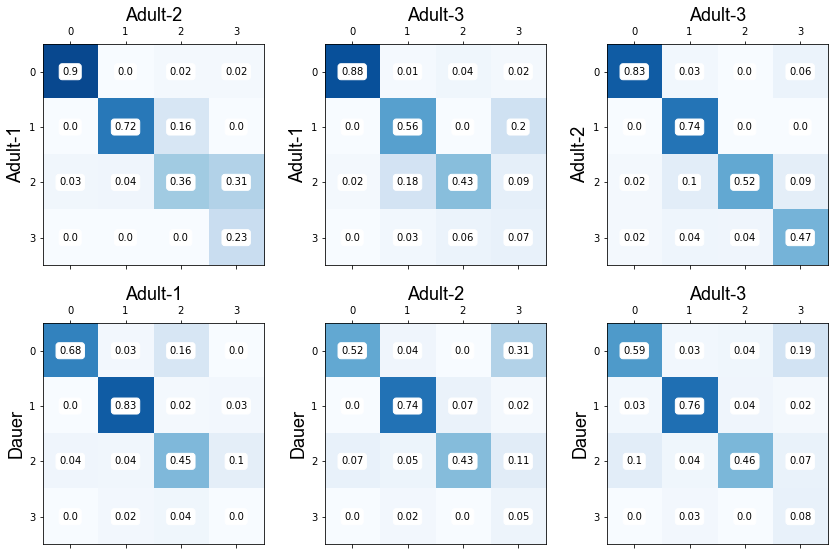

In [62]:
# (plot)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(12,8))
fsz = 12; tfsz=18

what2plot = np.copy(A1_A2_LR_grd_sim_re)  # change
ax1.matshow(what2plot, vmin=0, vmax=1, cmap='Blues')
ax1.set_title("Adult-2", fontsize=tfsz, fontname='Arial')
ax1.set_ylabel("Adult-1", fontsize=tfsz, fontname='Arial')
for (i, j), z in np.ndenumerate(what2plot):
    ax1.text(j, i, '{}'.format(round(z,2)), ha='center', va='center',\
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='1.0'))

what2plot = np.copy(A1_A3_LR_grd_sim_re)  # change
ax2.matshow(what2plot, vmin=0, vmax=1, cmap='Blues')
ax2.set_title("Adult-3", fontsize=tfsz, fontname='Arial')
ax2.set_ylabel("Adult-1", fontsize=tfsz, fontname='Arial')
for (i, j), z in np.ndenumerate(what2plot):
    ax2.text(j, i, '{}'.format(round(z,2)), ha='center', va='center',\
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='1.0'))

what2plot = np.copy(A2_A3_LR_grd_sim_re)  # change
ax3.matshow(what2plot, vmin=0, vmax=1, cmap='Blues')
ax3.set_title("Adult-3", fontsize=tfsz, fontname='Arial')
ax3.set_ylabel("Adult-2", fontsize=tfsz, fontname='Arial')
for (i, j), z in np.ndenumerate(what2plot):
    ax3.text(j, i, '{}'.format(round(z,2)), ha='center', va='center',\
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='1.0'))

what2plot = np.copy(Da_A1_LR_grd_sim_re)  # change
ax4.matshow(what2plot, vmin=0, vmax=1, cmap='Blues')
ax4.set_title("Adult-1", fontsize=tfsz, fontname='Arial')
ax4.set_ylabel("Dauer", fontsize=tfsz, fontname='Arial')
for (i, j), z in np.ndenumerate(what2plot):
    ax4.text(j, i, '{}'.format(round(z,2)), ha='center', va='center',\
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='1.0'))

what2plot = np.copy(Da_A2_LR_grd_sim_re)  # change
ax5.matshow(what2plot, vmin=0, vmax=1, cmap='Blues')
ax5.set_title("Adult-2", fontsize=tfsz, fontname='Arial')
ax5.set_ylabel("Dauer", fontsize=tfsz, fontname='Arial')
for (i, j), z in np.ndenumerate(what2plot):
    ax5.text(j, i, '{}'.format(round(z,2)), ha='center', va='center',\
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='1.0'))

what2plot = np.copy(Da_A3_LR_grd_sim_re)  # change
ax6.matshow(what2plot, vmin=0, vmax=1, cmap='Blues')
ax6.set_title("Adult-3", fontsize=tfsz, fontname='Arial')
ax6.set_ylabel("Dauer", fontsize=tfsz, fontname='Arial')
for (i, j), z in np.ndenumerate(what2plot):
    ax6.text(j, i, '{}'.format(round(z,2)), ha='center', va='center',\
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='1.0'))

fig.tight_layout(pad=1.8)

# plt.savefig(r'D:\fig_s6b.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


### Rand index

In [63]:
# partition label

dauer_LR_grd_label = np.zeros(len(LR_id))
dset7_LR_grd_label = np.zeros(len(LR_id))
dset8_LR_grd_label = np.zeros(len(LR_id))
n2u_LR_grd_label = np.zeros(len(LR_id))

for ii in range(len(dset7_LR_grd_part_trim)):
    Sub = dset7_LR_grd_part_trim[ii]
    for jj in range(len(Sub)):
        dset7_LR_grd_label[Sub[jj]] = ii  # group label

for ii in range(len(dset8_LR_grd_part_trim)):
    Sub = dset8_LR_grd_part_trim[ii]
    for jj in range(len(Sub)):
        dset8_LR_grd_label[Sub[jj]] = ii

for ii in range(len(n2u_LR_grd_part_trim)):
    Sub = n2u_LR_grd_part_trim[ii]
    for jj in range(len(Sub)):
        n2u_LR_grd_label[Sub[jj]] = ii

for ii in range(len(dauer_LR_grd_part_trim)):
    Sub = dauer_LR_grd_part_trim[ii]
    for jj in range(len(Sub)):
        dauer_LR_grd_label[Sub[jj]] = ii


In [64]:
# get Rand index

from sklearn.metrics.cluster import rand_score

RI_A1A2 = rand_score(dset7_LR_grd_label, dset8_LR_grd_label)
RI_A1A3 = rand_score(dset7_LR_grd_label, n2u_LR_grd_label)
RI_A2A3 = rand_score(dset8_LR_grd_label, n2u_LR_grd_label)
RI_DaA1 = rand_score(dauer_LR_grd_label, dset7_LR_grd_label)
RI_DaA2 = rand_score(dauer_LR_grd_label, dset8_LR_grd_label)
RI_DaA3 = rand_score(dauer_LR_grd_label, n2u_LR_grd_label)

print("A1 - A2 :", round(RI_A1A2,6))
print("A1 - A3 :", round(RI_A1A3,6))
print("A2 - A3 :", round(RI_A2A3,6),"\n")
print("Da - A1 :", round(RI_DaA1,6))
print("Da - A2 :", round(RI_DaA2,6))
print("Da - A3 :", round(RI_DaA3,6))


A1 - A2 : 0.850945
A1 - A3 : 0.808634
A2 - A3 : 0.842998 

Da - A1 : 0.806486
Da - A2 : 0.761813
Da - A3 : 0.765034


In [66]:
# adjusted Rand index

from sklearn.metrics.cluster import adjusted_rand_score

aRI_A1A2 = adjusted_rand_score(dset7_LR_grd_label, dset8_LR_grd_label)
aRI_A1A3 = adjusted_rand_score(dset7_LR_grd_label, n2u_LR_grd_label)
aRI_A2A3 = adjusted_rand_score(dset8_LR_grd_label, n2u_LR_grd_label)
aRI_DaA1 = adjusted_rand_score(dauer_LR_grd_label, dset7_LR_grd_label)
aRI_DaA2 = adjusted_rand_score(dauer_LR_grd_label, dset8_LR_grd_label)
aRI_DaA3 = adjusted_rand_score(dauer_LR_grd_label, n2u_LR_grd_label)

print("A1 - A2 :", round(aRI_A1A2,6))
print("A1 - A3 :", round(aRI_A1A3,6))
print("A2 - A3 :", round(aRI_A2A3,6),"\n")
print("Da - A1 :", round(aRI_DaA1,6))
print("Da - A2 :", round(aRI_DaA2,6))
print("Da - A3 :", round(aRI_DaA3,6))


A1 - A2 : 0.645263
A1 - A3 : 0.549023
A2 - A3 : 0.616307 

Da - A1 : 0.560198
Da - A2 : 0.443472
Da - A3 : 0.455762


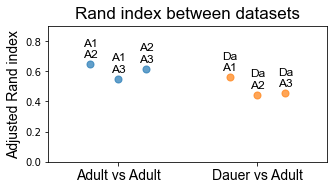

In [86]:
# plot

msz=50; ssz=12; fsz=14; HH=0.03


fig, ((ax1)) = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(5,2.5))
xpos = [0.6,1.0,1.4, 2.6,3.0,3.4]
ax1.set_ylabel('Adjusted Rand index', fontsize=14, fontname='Arial')
ax1.set_title("Rand index between datasets", y=1.01, fontsize=17, fontname='Arial')

ax1.scatter(xpos[0], aRI_A1A2, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax1.text(xpos[0], aRI_A1A2+HH, "A1\nA2", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.scatter(xpos[1], aRI_A1A3, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax1.text(xpos[1], aRI_A1A3+HH, "A1\nA3", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.scatter(xpos[2], aRI_A2A3, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax1.text(xpos[2], aRI_A2A3+HH, "A2\nA3", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.scatter(xpos[3], aRI_DaA1, color='tab:orange', marker='o', s=msz, alpha=0.7)
ax1.text(xpos[3], aRI_DaA1+HH, "Da\nA1", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.scatter(xpos[4], aRI_DaA2, color='tab:orange', marker='o', s=msz, alpha=0.7)
ax1.text(xpos[4], aRI_DaA2+HH, "Da\nA2", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.scatter(xpos[5], aRI_DaA3, color='tab:orange', marker='o', s=msz, alpha=0.7)
ax1.text(xpos[5], aRI_DaA3+HH, "Da\nA3", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

ax1.set_xlim(0.0,4.0)
ax1.set_ylim(0.0,0.9)
label = ["Adult vs Adult","Dauer vs Adult"]
ax1.set_xticks([1,3])
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

# plt.savefig(r'D:\fig_s6c.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


In [67]:
# Rand index between module and SIM classification

LR_type = np.copy(com_type[com_L_idx[:97]])  # 1, 2, 3 as group index
LR_type_wit = np.copy(com_type_wit[com_L_idx[:97]])  # 1, 2, 3, 4 as group index


In [68]:
# adjusted Rand index (Cook type)

from sklearn.metrics.cluster import adjusted_rand_score

aRI_A1_SIMc = adjusted_rand_score(dset7_LR_grd_label, LR_type)
aRI_A2_SIMc = adjusted_rand_score(dset8_LR_grd_label, LR_type)
aRI_A3_SIMc = adjusted_rand_score(n2u_LR_grd_label, LR_type)
aRI_Da_SIMc = adjusted_rand_score(dauer_LR_grd_label, LR_type)

print("A1 - SIM Cook :", round(aRI_A1_SIMc,6))
print("A2 - SIM Cook :", round(aRI_A2_SIMc,6))
print("A3 - SIM Cook :", round(aRI_A3_SIMc,6))
print("Da - SIM Cook :", round(aRI_Da_SIMc,6))


A1 - SIM Cook : 0.077075
A2 - SIM Cook : 0.056172
A3 - SIM Cook : 0.043336
Da - SIM Cook : 0.132099


In [69]:
# adjusted Rand index (Witvliet type)

from sklearn.metrics.cluster import adjusted_rand_score

aRI_A1_SIMw = adjusted_rand_score(dset7_LR_grd_label, LR_type_wit)
aRI_A2_SIMw = adjusted_rand_score(dset8_LR_grd_label, LR_type_wit)
aRI_A3_SIMw = adjusted_rand_score(n2u_LR_grd_label, LR_type_wit)
aRI_Da_SIMw = adjusted_rand_score(dauer_LR_grd_label, LR_type_wit)

print("A1 - SIM Wit. :", round(aRI_A1_SIMw,6))
print("A2 - SIM Wit. :", round(aRI_A2_SIMw,6))
print("A3 - SIM Wit. :", round(aRI_A3_SIMw,6))
print("Da - SIM Wit. :", round(aRI_Da_SIMw,6))


A1 - SIM Wit. : 0.113611
A2 - SIM Wit. : 0.09623
A3 - SIM Wit. : 0.086772
Da - SIM Wit. : 0.173535


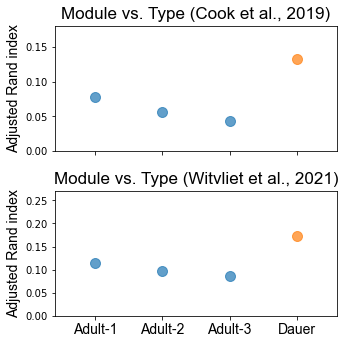

In [90]:
# plot

msz=100; ssz=12; fsz=14; HH=0.025


fig, ((ax1, ax2)) = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(5,5))
xpos = np.arange(4)+1

ax1.set_ylabel('Adjusted Rand index', fontsize=14, fontname='Arial')
ax1.set_title("Module vs. Type (Cook et al., 2019)", y=1.01, fontsize=17, fontname='Arial')
ax1.scatter(xpos[0], aRI_A1_SIMc, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax1.scatter(xpos[1], aRI_A2_SIMc, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax1.scatter(xpos[2], aRI_A3_SIMc, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax1.scatter(xpos[3], aRI_Da_SIMc, color='tab:orange', marker='o', s=msz, alpha=0.7)
ax1.set_xlim(0.4,4.6)
ax1.set_ylim(0.0,0.18)
label = ["Adult-1","Adult-2","Adult-3","Dauer"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax2.set_ylabel('Adjusted Rand index', fontsize=14, fontname='Arial')
ax2.set_title("Module vs. Type (Witvliet et al., 2021)", y=1.01, fontsize=17, fontname='Arial')
ax2.scatter(xpos[0], aRI_A1_SIMw, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax2.scatter(xpos[1], aRI_A2_SIMw, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax2.scatter(xpos[2], aRI_A3_SIMw, color='tab:blue', marker='o', s=msz, alpha=0.7)
ax2.scatter(xpos[3], aRI_Da_SIMw, color='tab:orange', marker='o', s=msz, alpha=0.7)
ax2.set_ylim(0.0,0.27)
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

fig.tight_layout(pad=1.5)

# plt.savefig(r'D:\fig_s6d.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


## Network vulnerability

In [66]:
# undirected graph (180 X 180)

dauer_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,10], parallel_edges=False, create_using=nx.Graph)
dset1_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,0], parallel_edges=False, create_using=nx.Graph)
dset2_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,1], parallel_edges=False, create_using=nx.Graph)
dset3_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,2], parallel_edges=False, create_using=nx.Graph)
dset4_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,3], parallel_edges=False, create_using=nx.Graph)
dset5_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,4], parallel_edges=False, create_using=nx.Graph)
dset6_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,5], parallel_edges=False, create_using=nx.Graph)
dset7_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,6], parallel_edges=False, create_using=nx.Graph)
dset8_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,7], parallel_edges=False, create_using=nx.Graph)
jsh_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,8], parallel_edges=False, create_using=nx.Graph)
n2u_G_180un = nx.from_numpy_array(norm180_comp_bi[:,:,9], parallel_edges=False, create_using=nx.Graph)


In [93]:
# [Edge drop] get connected components
    # order : random attack

rnum = 100  # change


# dauer
temp_N = np.array(list(max(nx.connected_components(dauer_G_180un), key=len)))  # nodes in biggest CC
temp_mat = np.copy(norm180_comp_bi[:,:,10][np.ix_(temp_N,temp_N)])  # change
dauer_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dauer_E = np.nonzero(temp_mat)
dauer_cc_num_Edrop = np.zeros((rnum,dauer_E[0].size+1))
dauer_cc_num_Edrop[:,0] = nx.number_connected_components(dauer_maxCC_G)
dauer_cc_max_Edrop = np.zeros((rnum,dauer_E[0].size+1))
dauer_cc_max_Edrop[:,0] = len(max(nx.connected_components(dauer_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dauer_E[0].size)
    dauer_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dauer_temp_mat[ dauer_E[0][rmv[jj]], dauer_E[1][rmv[jj]] ] = 0  # remove edge
        dauer_temp_G = nx.from_numpy_array(dauer_temp_mat, parallel_edges=False, create_using=nx.Graph)  # assume undirected
        dauer_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dauer_temp_G)
        dauer_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dauer_temp_G), key=len))
dauer_cc_num_Edrop_m = np.mean(dauer_cc_num_Edrop, axis=0); dauer_cc_max_Edrop_m = np.mean(dauer_cc_max_Edrop, axis=0)

# dset1
temp_N = np.array(list(max(nx.connected_components(dset1_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,0][np.ix_(temp_N,temp_N)])
dset1_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset1_E = np.nonzero(temp_mat)
dset1_cc_num_Edrop = np.zeros((rnum,dset1_E[0].size+1))
dset1_cc_num_Edrop[:,0] = nx.number_connected_components(dset1_maxCC_G)
dset1_cc_max_Edrop = np.zeros((rnum,dset1_E[0].size+1))
dset1_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset1_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset1_E[0].size)
    dset1_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset1_temp_mat[ dset1_E[0][rmv[jj]], dset1_E[1][rmv[jj]] ] = 0
        dset1_temp_G = nx.from_numpy_array(dset1_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset1_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset1_temp_G)
        dset1_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset1_temp_G), key=len))
dset1_cc_num_Edrop_m = np.mean(dset1_cc_num_Edrop, axis=0); dset1_cc_max_Edrop_m = np.mean(dset1_cc_max_Edrop, axis=0)

# dset2
temp_N = np.array(list(max(nx.connected_components(dset2_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,1][np.ix_(temp_N,temp_N)])
dset2_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset2_E = np.nonzero(temp_mat)
dset2_cc_num_Edrop = np.zeros((rnum,dset2_E[0].size+1))
dset2_cc_num_Edrop[:,0] = nx.number_connected_components(dset2_maxCC_G)
dset2_cc_max_Edrop = np.zeros((rnum,dset2_E[0].size+1))
dset2_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset2_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset2_E[0].size)
    dset2_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset2_temp_mat[ dset2_E[0][rmv[jj]], dset2_E[1][rmv[jj]] ] = 0
        dset2_temp_G = nx.from_numpy_array(dset2_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset2_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset2_temp_G)
        dset2_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset2_temp_G), key=len))
dset2_cc_num_Edrop_m = np.mean(dset2_cc_num_Edrop, axis=0); dset2_cc_max_Edrop_m = np.mean(dset2_cc_max_Edrop, axis=0)

# dset3
temp_N = np.array(list(max(nx.connected_components(dset3_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,2][np.ix_(temp_N,temp_N)])
dset3_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset3_E = np.nonzero(temp_mat)
dset3_cc_num_Edrop = np.zeros((rnum,dset3_E[0].size+1))
dset3_cc_num_Edrop[:,0] = nx.number_connected_components(dset3_maxCC_G)
dset3_cc_max_Edrop = np.zeros((rnum,dset3_E[0].size+1))
dset3_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset3_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset3_E[0].size)
    dset3_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset3_temp_mat[ dset3_E[0][rmv[jj]], dset3_E[1][rmv[jj]] ] = 0
        dset3_temp_G = nx.from_numpy_array(dset3_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset3_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset3_temp_G)
        dset3_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset3_temp_G), key=len))
dset3_cc_num_Edrop_m = np.mean(dset3_cc_num_Edrop, axis=0); dset3_cc_max_Edrop_m = np.mean(dset3_cc_max_Edrop, axis=0)

# dset4
temp_N = np.array(list(max(nx.connected_components(dset4_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,3][np.ix_(temp_N,temp_N)])
dset4_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset4_E = np.nonzero(temp_mat)
dset4_cc_num_Edrop = np.zeros((rnum,dset4_E[0].size+1))
dset4_cc_num_Edrop[:,0] = nx.number_connected_components(dset4_maxCC_G)
dset4_cc_max_Edrop = np.zeros((rnum,dset4_E[0].size+1))
dset4_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset4_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset4_E[0].size)
    dset4_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset4_temp_mat[ dset4_E[0][rmv[jj]], dset4_E[1][rmv[jj]] ] = 0
        dset4_temp_G = nx.from_numpy_array(dset4_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset4_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset4_temp_G)
        dset4_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset4_temp_G), key=len))
dset4_cc_num_Edrop_m = np.mean(dset4_cc_num_Edrop, axis=0); dset4_cc_max_Edrop_m = np.mean(dset4_cc_max_Edrop, axis=0)

# dset5
temp_N = np.array(list(max(nx.connected_components(dset5_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,4][np.ix_(temp_N,temp_N)])
dset5_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset5_E = np.nonzero(temp_mat)
dset5_cc_num_Edrop = np.zeros((rnum,dset5_E[0].size+1))
dset5_cc_num_Edrop[:,0] = nx.number_connected_components(dset5_maxCC_G)
dset5_cc_max_Edrop = np.zeros((rnum,dset5_E[0].size+1))
dset5_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset5_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset5_E[0].size)
    dset5_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset5_temp_mat[ dset5_E[0][rmv[jj]], dset5_E[1][rmv[jj]] ] = 0
        dset5_temp_G = nx.from_numpy_array(dset5_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset5_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset5_temp_G)
        dset5_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset5_temp_G), key=len))
dset5_cc_num_Edrop_m = np.mean(dset5_cc_num_Edrop, axis=0); dset5_cc_max_Edrop_m = np.mean(dset5_cc_max_Edrop, axis=0)

# dset6
temp_N = np.array(list(max(nx.connected_components(dset6_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,5][np.ix_(temp_N,temp_N)])
dset6_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset6_E = np.nonzero(temp_mat)
dset6_cc_num_Edrop = np.zeros((rnum,dset6_E[0].size+1))
dset6_cc_num_Edrop[:,0] = nx.number_connected_components(dset6_maxCC_G)
dset6_cc_max_Edrop = np.zeros((rnum,dset6_E[0].size+1))
dset6_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset6_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset6_E[0].size)
    dset6_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset6_temp_mat[ dset6_E[0][rmv[jj]], dset6_E[1][rmv[jj]] ] = 0
        dset6_temp_G = nx.from_numpy_array(dset6_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset6_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset6_temp_G)
        dset6_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset6_temp_G), key=len))
dset6_cc_num_Edrop_m = np.mean(dset6_cc_num_Edrop, axis=0); dset6_cc_max_Edrop_m = np.mean(dset6_cc_max_Edrop, axis=0)

# dset7
temp_N = np.array(list(max(nx.connected_components(dset7_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,6][np.ix_(temp_N,temp_N)])
dset7_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset7_E = np.nonzero(temp_mat)
dset7_cc_num_Edrop = np.zeros((rnum,dset7_E[0].size+1))
dset7_cc_num_Edrop[:,0] = nx.number_connected_components(dset7_maxCC_G)
dset7_cc_max_Edrop = np.zeros((rnum,dset7_E[0].size+1))
dset7_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset7_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset7_E[0].size)
    dset7_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset7_temp_mat[ dset7_E[0][rmv[jj]], dset7_E[1][rmv[jj]] ] = 0
        dset7_temp_G = nx.from_numpy_array(dset7_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset7_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset7_temp_G)
        dset7_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset7_temp_G), key=len))
dset7_cc_num_Edrop_m = np.mean(dset7_cc_num_Edrop, axis=0); dset7_cc_max_Edrop_m = np.mean(dset7_cc_max_Edrop, axis=0)

# dset8
temp_N = np.array(list(max(nx.connected_components(dset8_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,7][np.ix_(temp_N,temp_N)])
dset8_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
dset8_E = np.nonzero(temp_mat)
dset8_cc_num_Edrop = np.zeros((rnum,dset8_E[0].size+1))
dset8_cc_num_Edrop[:,0] = nx.number_connected_components(dset8_maxCC_G)
dset8_cc_max_Edrop = np.zeros((rnum,dset8_E[0].size+1))
dset8_cc_max_Edrop[:,0] = len(max(nx.connected_components(dset8_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(dset8_E[0].size)
    dset8_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        dset8_temp_mat[ dset8_E[0][rmv[jj]], dset8_E[1][rmv[jj]] ] = 0
        dset8_temp_G = nx.from_numpy_array(dset8_temp_mat, parallel_edges=False, create_using=nx.Graph)
        dset8_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(dset8_temp_G)
        dset8_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(dset8_temp_G), key=len))
dset8_cc_num_Edrop_m = np.mean(dset8_cc_num_Edrop, axis=0); dset8_cc_max_Edrop_m = np.mean(dset8_cc_max_Edrop, axis=0)

# jsh
temp_N = np.array(list(max(nx.connected_components(jsh_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,8][np.ix_(temp_N,temp_N)])
jsh_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
jsh_E = np.nonzero(temp_mat)
jsh_cc_num_Edrop = np.zeros((rnum,jsh_E[0].size+1))
jsh_cc_num_Edrop[:,0] = nx.number_connected_components(jsh_maxCC_G)
jsh_cc_max_Edrop = np.zeros((rnum,jsh_E[0].size+1))
jsh_cc_max_Edrop[:,0] = len(max(nx.connected_components(jsh_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(jsh_E[0].size)
    jsh_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        jsh_temp_mat[ jsh_E[0][rmv[jj]], jsh_E[1][rmv[jj]] ] = 0
        jsh_temp_G = nx.from_numpy_array(jsh_temp_mat, parallel_edges=False, create_using=nx.Graph)
        jsh_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(jsh_temp_G)
        jsh_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(jsh_temp_G), key=len))
jsh_cc_num_Edrop_m = np.mean(jsh_cc_num_Edrop, axis=0); jsh_cc_max_Edrop_m = np.mean(jsh_cc_max_Edrop, axis=0)

# n2u
temp_N = np.array(list(max(nx.connected_components(n2u_G_180un), key=len)))
temp_mat = np.copy(norm180_comp_bi[:,:,9][np.ix_(temp_N,temp_N)])
n2u_maxCC_G = nx.from_numpy_array(temp_mat, parallel_edges=False, create_using=nx.Graph)
n2u_E = np.nonzero(temp_mat)
n2u_cc_num_Edrop = np.zeros((rnum,n2u_E[0].size+1))
n2u_cc_num_Edrop[:,0] = nx.number_connected_components(n2u_maxCC_G)
n2u_cc_max_Edrop = np.zeros((rnum,n2u_E[0].size+1))
n2u_cc_max_Edrop[:,0] = len(max(nx.connected_components(n2u_maxCC_G), key=len))
for ii in tqdm(range(rnum)):
    rmv = np.random.permutation(n2u_E[0].size)
    n2u_temp_mat = np.copy(temp_mat)
    for jj in range(rmv.size):
        n2u_temp_mat[ n2u_E[0][rmv[jj]], n2u_E[1][rmv[jj]] ] = 0
        n2u_temp_G = nx.from_numpy_array(n2u_temp_mat, parallel_edges=False, create_using=nx.Graph)
        n2u_cc_num_Edrop[ii,jj+1] = nx.number_connected_components(n2u_temp_G)
        n2u_cc_max_Edrop[ii,jj+1] = len(max(nx.connected_components(n2u_temp_G), key=len))
n2u_cc_num_Edrop_m = np.mean(n2u_cc_num_Edrop, axis=0); n2u_cc_max_Edrop_m = np.mean(n2u_cc_max_Edrop, axis=0)


100%|██████████| 100/100 [08:51<00:00,  5.31s/it]


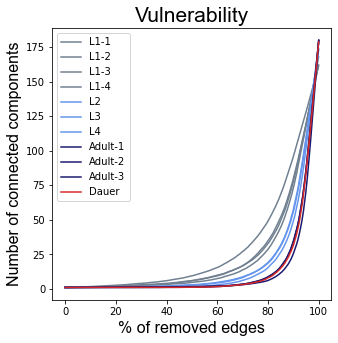

In [94]:
# (plot) Edge drop; CC number (percentage ver.)

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,5))
afs=8; xfs=16; yfs=16; tfs=21

xpos = (np.arange(dset1_cc_num_Edrop_m.size) / dset1_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset1_cc_num_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-1")
xpos = (np.arange(dset2_cc_num_Edrop_m.size) / dset2_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset2_cc_num_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-2")
xpos = (np.arange(dset3_cc_num_Edrop_m.size) / dset3_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset3_cc_num_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-3")
xpos = (np.arange(dset4_cc_num_Edrop_m.size) / dset4_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset4_cc_num_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-4")
xpos = (np.arange(dset5_cc_num_Edrop_m.size) / dset5_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset5_cc_num_Edrop_m, linewidth=1.5, color="cornflowerblue", alpha=1.0, label="L2")
xpos = (np.arange(dset6_cc_num_Edrop_m.size) / dset6_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset6_cc_num_Edrop_m, linewidth=1.5, color="cornflowerblue", alpha=1.0, label="L3")
xpos = (np.arange(jsh_cc_num_Edrop_m.size) / jsh_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, jsh_cc_num_Edrop_m, linewidth=1.5, color="cornflowerblue", alpha=1.0, label="L4")
xpos = (np.arange(dset7_cc_num_Edrop_m.size) / dset7_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset7_cc_num_Edrop_m, linewidth=1.5, color="midnightblue", alpha=1.0, label="Adult-1")
xpos = (np.arange(dset8_cc_num_Edrop_m.size) / dset8_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dset8_cc_num_Edrop_m, linewidth=1.5, color="midnightblue", alpha=1.0, label="Adult-2")
xpos = (np.arange(n2u_cc_num_Edrop_m.size) / n2u_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, n2u_cc_num_Edrop_m, linewidth=1.5, color="midnightblue", alpha=1.0, label="Adult-3")
xpos = (np.arange(dauer_cc_num_Edrop_m.size) / dauer_cc_num_Edrop_m.size) * 100
ax1.plot(xpos, dauer_cc_num_Edrop_m, linewidth=1.5, color="tab:red", alpha=1.0, label="Dauer")

ax1.legend(fontsize=10, ncol=1, loc="best")
ax1.set_xlabel('% of removed edges', fontsize=xfs, fontname="Arial")
ax1.set_ylabel('Number of connected components', fontsize=yfs, fontname="Arial")
ax1.set_title('Vulnerability', fontsize=tfs, fontname="Arial")

# plt.savefig(r'D:\fig_s6a1.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


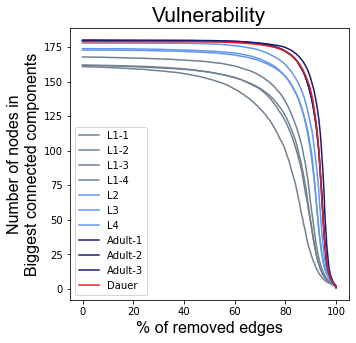

In [95]:
# (plot) Edge drop; biggest CC (percentage ver.)

fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,5))
afs=8; xfs=16; yfs=16; tfs=21

xpos = (np.arange(dset1_cc_max_Edrop_m.size) / dset1_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset1_cc_max_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-1")
xpos = (np.arange(dset2_cc_max_Edrop_m.size) / dset2_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset2_cc_max_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-2")
xpos = (np.arange(dset3_cc_max_Edrop_m.size) / dset3_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset3_cc_max_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-3")
xpos = (np.arange(dset4_cc_max_Edrop_m.size) / dset4_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset4_cc_max_Edrop_m, linewidth=1.5, color="slategrey", alpha=1.0, label="L1-4")
xpos = (np.arange(dset5_cc_max_Edrop_m.size) / dset5_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset5_cc_max_Edrop_m, linewidth=1.5, color="cornflowerblue", alpha=1.0, label="L2")
xpos = (np.arange(dset6_cc_max_Edrop_m.size) / dset6_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset6_cc_max_Edrop_m, linewidth=1.5, color="cornflowerblue", alpha=1.0, label="L3")
xpos = (np.arange(jsh_cc_max_Edrop_m.size) / jsh_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, jsh_cc_max_Edrop_m, linewidth=1.5, color="cornflowerblue", alpha=1.0, label="L4")
xpos = (np.arange(dset7_cc_max_Edrop_m.size) / dset7_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset7_cc_max_Edrop_m, linewidth=1.5, color="midnightblue", alpha=1.0, label="Adult-1")
xpos = (np.arange(dset8_cc_max_Edrop_m.size) / dset8_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dset8_cc_max_Edrop_m, linewidth=1.5, color="midnightblue", alpha=1.0, label="Adult-2")
xpos = (np.arange(n2u_cc_max_Edrop_m.size) / n2u_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, n2u_cc_max_Edrop_m, linewidth=1.5, color="midnightblue", alpha=1.0, label="Adult-3")
xpos = (np.arange(dauer_cc_max_Edrop_m.size) / dauer_cc_max_Edrop_m.size) * 100
ax1.plot(xpos, dauer_cc_max_Edrop_m, linewidth=1.5, color="tab:red", alpha=1.0, label="Dauer")

ax1.legend(fontsize=10, ncol=1, loc="best")
ax1.set_xlabel('% of removed edges', fontsize=xfs, fontname="Arial")
ax1.set_ylabel('Number of nodes in\nBiggest connected components', fontsize=yfs, fontname="Arial")
ax1.set_title('Vulnerability', fontsize=tfs, fontname="Arial")

# plt.savefig(r'D:\fig_s6a2.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


---

## Connection similarity

In [67]:
# OUT total

OUT_corr_mat_comp = np.zeros((11,11,norm180_comp.shape[0]))

for ii in range(norm180_comp.shape[0]):
    ds1 = norm180_comp_bi[ii,:,0]; ds2 = norm180_comp_bi[ii,:,1]; ds3 = norm180_comp_bi[ii,:,2]
    ds4 = norm180_comp_bi[ii,:,3]; ds5 = norm180_comp_bi[ii,:,4]; ds6 = norm180_comp_bi[ii,:,5]
    ds7 = norm180_comp_bi[ii,:,6]; ds8 = norm180_comp_bi[ii,:,7]; jsh = norm180_comp_bi[ii,:,8]
    n2u = norm180_comp_bi[ii,:,9]; da = norm180_comp_bi[ii,:,10]
    data = np.vstack((ds1,ds2,ds3,ds4,ds5,ds6,jsh,ds7,ds8,n2u,da))
    
    for jj in range(data.shape[0]):
        for kk in range(data.shape[0]):   
            eudist = np.linalg.norm(data[jj,:] - data[kk,:])  # Euclidean distance
            OUT_corr_mat_comp[jj,kk,ii] = np.exp(-eudist)

OUT_corr_mat_comp[np.isnan(OUT_corr_mat_comp)] = 0
OUT_corr_mat_mean = np.mean(OUT_corr_mat_comp, axis=2); print(OUT_corr_mat_mean.shape)


(11, 11)


In [68]:
# IN total

IN_corr_mat_comp = np.zeros((11,11,norm180_comp.shape[0]))

for ii in range(norm180_comp.shape[0]):
    ds1 = norm180_comp_bi[:,ii,0]; ds2 = norm180_comp_bi[:,ii,1]; ds3 = norm180_comp_bi[:,ii,2]
    ds4 = norm180_comp_bi[:,ii,3]; ds5 = norm180_comp_bi[:,ii,4]; ds6 = norm180_comp_bi[:,ii,5]
    ds7 = norm180_comp_bi[:,ii,6]; ds8 = norm180_comp_bi[:,ii,7]; jsh = norm180_comp_bi[:,ii,8]
    n2u = norm180_comp_bi[:,ii,9]; da = norm180_comp_bi[:,ii,10]
    data = np.vstack((ds1,ds2,ds3,ds4,ds5,ds6,jsh,ds7,ds8,n2u,da))
    
    for jj in range(data.shape[0]):
        for kk in range(data.shape[0]):   
            eudist = np.linalg.norm(data[jj,:] - data[kk,:])  # Euclidean disstance
            IN_corr_mat_comp[jj,kk,ii] = np.exp(-eudist)

IN_corr_mat_comp[np.isnan(IN_corr_mat_comp)] = 0
IN_corr_mat_mean = np.mean(IN_corr_mat_comp, axis=2); print(IN_corr_mat_mean.shape)


(11, 11)


---

In [69]:
# type mask

sen_mask = np.ones(180, dtype=bool); sen_mask[int_idx_180] = 0; sen_mask[mot_idx_180] = 0
int_mask = np.ones(180, dtype=bool); int_mask[sen_idx_180] = 0; int_mask[mot_idx_180] = 0
mot_mask = np.ones(180, dtype=bool); mot_mask[sen_idx_180] = 0; mot_mask[int_idx_180] = 0


In [70]:
# S > I
dauer_StoI_mat = np.copy(norm180_comp[:,:,10][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset1_StoI_mat = np.copy(norm180_comp[:,:,0][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset2_StoI_mat = np.copy(norm180_comp[:,:,1][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset3_StoI_mat = np.copy(norm180_comp[:,:,2][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset4_StoI_mat = np.copy(norm180_comp[:,:,3][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset5_StoI_mat = np.copy(norm180_comp[:,:,4][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset6_StoI_mat = np.copy(norm180_comp[:,:,5][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset7_StoI_mat = np.copy(norm180_comp[:,:,6][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset8_StoI_mat = np.copy(norm180_comp[:,:,7][np.ix_(sen_idx_180,np.arange(0,180,1))])
jsh_StoI_mat = np.copy(norm180_comp[:,:,8][np.ix_(sen_idx_180,np.arange(0,180,1))])
n2u_StoI_mat = np.copy(norm180_comp[:,:,9][np.ix_(sen_idx_180,np.arange(0,180,1))])

dauer_StoI_mat = dauer_StoI_mat * int_mask
dset1_StoI_mat = dset1_StoI_mat * int_mask; dset2_StoI_mat = dset2_StoI_mat * int_mask
dset3_StoI_mat = dset3_StoI_mat * int_mask; dset4_StoI_mat = dset4_StoI_mat * int_mask
dset5_StoI_mat = dset5_StoI_mat * int_mask; dset6_StoI_mat = dset6_StoI_mat * int_mask
dset7_StoI_mat = dset7_StoI_mat * int_mask; dset8_StoI_mat = dset8_StoI_mat * int_mask
jsh_StoI_mat = jsh_StoI_mat * int_mask; n2u_StoI_mat = n2u_StoI_mat * int_mask

# binarize
dauer_StoI_mat_bi = np.copy(dauer_StoI_mat); dauer_StoI_mat_bi[dauer_StoI_mat_bi!=0] = 1
dset1_StoI_mat_bi = np.copy(dset1_StoI_mat); dset1_StoI_mat_bi[dset1_StoI_mat_bi!=0] = 1
dset2_StoI_mat_bi = np.copy(dset2_StoI_mat); dset2_StoI_mat_bi[dset2_StoI_mat_bi!=0] = 1
dset3_StoI_mat_bi = np.copy(dset3_StoI_mat); dset3_StoI_mat_bi[dset3_StoI_mat_bi!=0] = 1
dset4_StoI_mat_bi = np.copy(dset4_StoI_mat); dset4_StoI_mat_bi[dset4_StoI_mat_bi!=0] = 1
dset5_StoI_mat_bi = np.copy(dset5_StoI_mat); dset5_StoI_mat_bi[dset5_StoI_mat_bi!=0] = 1
dset6_StoI_mat_bi = np.copy(dset6_StoI_mat); dset6_StoI_mat_bi[dset6_StoI_mat_bi!=0] = 1
dset7_StoI_mat_bi = np.copy(dset7_StoI_mat); dset7_StoI_mat_bi[dset7_StoI_mat_bi!=0] = 1
dset8_StoI_mat_bi = np.copy(dset8_StoI_mat); dset8_StoI_mat_bi[dset8_StoI_mat_bi!=0] = 1
jsh_StoI_mat_bi = np.copy(jsh_StoI_mat); jsh_StoI_mat_bi[jsh_StoI_mat_bi!=0] = 1
n2u_StoI_mat_bi = np.copy(n2u_StoI_mat); n2u_StoI_mat_bi[n2u_StoI_mat_bi!=0] = 1


In [71]:
# mean Pearson product-moment correlation coefficients between datasets

SI_corrcoef_mat_comp = np.zeros((11,11,sen_idx_180.size))

data = np.dstack((dset1_StoI_mat_bi,dset2_StoI_mat_bi,dset3_StoI_mat_bi,dset4_StoI_mat_bi,\
                  dset5_StoI_mat_bi,dset6_StoI_mat_bi,jsh_StoI_mat_bi,dset7_StoI_mat_bi,\
                  dset8_StoI_mat_bi,n2u_StoI_mat_bi,dauer_StoI_mat_bi))

SI_con_num = []
for ii in range(sen_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)  # Euclidean distance
            SI_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)  # defined similarity ( sim. = exp(-distance) )
        SI_con_num.append(np.nonzero(aa)[0].size)

SI_corrcoef_mat_comp_ori = np.copy(SI_corrcoef_mat_comp)
SI_corrcoef_mat_comp[np.isnan(SI_corrcoef_mat_comp)] = 1
for ii in range(SI_corrcoef_mat_comp.shape[0]):
    for jj in range(SI_corrcoef_mat_comp.shape[2]):
        SI_corrcoef_mat_comp[ii,ii,jj] = 1

SI_corrcoef_mat_mean = np.mean(SI_corrcoef_mat_comp, axis=2); print(SI_corrcoef_mat_mean.shape)


(11, 11)


In [72]:
# S > M
dauer_StoM_mat = np.copy(norm180_comp[:,:,10][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset1_StoM_mat = np.copy(norm180_comp[:,:,0][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset2_StoM_mat = np.copy(norm180_comp[:,:,1][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset3_StoM_mat = np.copy(norm180_comp[:,:,2][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset4_StoM_mat = np.copy(norm180_comp[:,:,3][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset5_StoM_mat = np.copy(norm180_comp[:,:,4][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset6_StoM_mat = np.copy(norm180_comp[:,:,5][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset7_StoM_mat = np.copy(norm180_comp[:,:,6][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset8_StoM_mat = np.copy(norm180_comp[:,:,7][np.ix_(sen_idx_180,np.arange(0,180,1))])
jsh_StoM_mat = np.copy(norm180_comp[:,:,8][np.ix_(sen_idx_180,np.arange(0,180,1))])
n2u_StoM_mat = np.copy(norm180_comp[:,:,9][np.ix_(sen_idx_180,np.arange(0,180,1))])

dauer_StoM_mat = dauer_StoM_mat * mot_mask
dset1_StoM_mat = dset1_StoM_mat * mot_mask; dset2_StoM_mat = dset2_StoM_mat * mot_mask
dset3_StoM_mat = dset3_StoM_mat * mot_mask; dset4_StoM_mat = dset4_StoM_mat * mot_mask
dset5_StoM_mat = dset5_StoM_mat * mot_mask; dset6_StoM_mat = dset6_StoM_mat * mot_mask
dset7_StoM_mat = dset7_StoM_mat * mot_mask; dset8_StoM_mat = dset8_StoM_mat * mot_mask
jsh_StoM_mat = jsh_StoM_mat * mot_mask; n2u_StoM_mat = n2u_StoM_mat * mot_mask

# binarize
dauer_StoM_mat_bi = np.copy(dauer_StoM_mat); dauer_StoM_mat_bi[dauer_StoM_mat_bi!=0] = 1
dset1_StoM_mat_bi = np.copy(dset1_StoM_mat); dset1_StoM_mat_bi[dset1_StoM_mat_bi!=0] = 1
dset2_StoM_mat_bi = np.copy(dset2_StoM_mat); dset2_StoM_mat_bi[dset2_StoM_mat_bi!=0] = 1
dset3_StoM_mat_bi = np.copy(dset3_StoM_mat); dset3_StoM_mat_bi[dset3_StoM_mat_bi!=0] = 1
dset4_StoM_mat_bi = np.copy(dset4_StoM_mat); dset4_StoM_mat_bi[dset4_StoM_mat_bi!=0] = 1
dset5_StoM_mat_bi = np.copy(dset5_StoM_mat); dset5_StoM_mat_bi[dset5_StoM_mat_bi!=0] = 1
dset6_StoM_mat_bi = np.copy(dset6_StoM_mat); dset6_StoM_mat_bi[dset6_StoM_mat_bi!=0] = 1
dset7_StoM_mat_bi = np.copy(dset7_StoM_mat); dset7_StoM_mat_bi[dset7_StoM_mat_bi!=0] = 1
dset8_StoM_mat_bi = np.copy(dset8_StoM_mat); dset8_StoM_mat_bi[dset8_StoM_mat_bi!=0] = 1
jsh_StoM_mat_bi = np.copy(jsh_StoM_mat); jsh_StoM_mat_bi[jsh_StoM_mat_bi!=0] = 1
n2u_StoM_mat_bi = np.copy(n2u_StoM_mat); n2u_StoM_mat_bi[n2u_StoM_mat_bi!=0] = 1


In [73]:
# mean Pearson product-moment correlation coefficients between datasets

SM_corrcoef_mat_comp = np.zeros((11,11,sen_idx_180.size))

data = np.dstack((dset1_StoM_mat_bi,dset2_StoM_mat_bi,dset3_StoM_mat_bi,dset4_StoM_mat_bi,\
                  dset5_StoM_mat_bi,dset6_StoM_mat_bi,jsh_StoM_mat_bi,dset7_StoM_mat_bi,\
                  dset8_StoM_mat_bi,n2u_StoM_mat_bi,dauer_StoM_mat_bi))

SM_con_num = []
for ii in range(sen_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            SM_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        SM_con_num.append(np.nonzero(aa)[0].size)

SM_corrcoef_mat_comp_ori = np.copy(SM_corrcoef_mat_comp)
SM_corrcoef_mat_comp[np.isnan(SM_corrcoef_mat_comp)] = 1
for ii in range(SM_corrcoef_mat_comp.shape[0]):
    for jj in range(SM_corrcoef_mat_comp.shape[2]):
        SM_corrcoef_mat_comp[ii,ii,jj] = 1

SM_corrcoef_mat_mean = np.mean(SM_corrcoef_mat_comp, axis=2); print(SM_corrcoef_mat_mean.shape)


(11, 11)


In [74]:
# I > M
dauer_ItoM_mat = np.copy(norm180_comp[:,:,10][np.ix_(int_idx_180,np.arange(0,180,1))])
dset1_ItoM_mat = np.copy(norm180_comp[:,:,0][np.ix_(int_idx_180,np.arange(0,180,1))])
dset2_ItoM_mat = np.copy(norm180_comp[:,:,1][np.ix_(int_idx_180,np.arange(0,180,1))])
dset3_ItoM_mat = np.copy(norm180_comp[:,:,2][np.ix_(int_idx_180,np.arange(0,180,1))])
dset4_ItoM_mat = np.copy(norm180_comp[:,:,3][np.ix_(int_idx_180,np.arange(0,180,1))])
dset5_ItoM_mat = np.copy(norm180_comp[:,:,4][np.ix_(int_idx_180,np.arange(0,180,1))])
dset6_ItoM_mat = np.copy(norm180_comp[:,:,5][np.ix_(int_idx_180,np.arange(0,180,1))])
dset7_ItoM_mat = np.copy(norm180_comp[:,:,6][np.ix_(int_idx_180,np.arange(0,180,1))])
dset8_ItoM_mat = np.copy(norm180_comp[:,:,7][np.ix_(int_idx_180,np.arange(0,180,1))])
jsh_ItoM_mat = np.copy(norm180_comp[:,:,8][np.ix_(int_idx_180,np.arange(0,180,1))])
n2u_ItoM_mat = np.copy(norm180_comp[:,:,9][np.ix_(int_idx_180,np.arange(0,180,1))])

dauer_ItoM_mat = dauer_ItoM_mat * mot_mask
dset1_ItoM_mat = dset1_ItoM_mat * mot_mask; dset2_ItoM_mat = dset2_ItoM_mat * mot_mask
dset3_ItoM_mat = dset3_ItoM_mat * mot_mask; dset4_ItoM_mat = dset4_ItoM_mat * mot_mask
dset5_ItoM_mat = dset5_ItoM_mat * mot_mask; dset6_ItoM_mat = dset6_ItoM_mat * mot_mask
dset7_ItoM_mat = dset7_ItoM_mat * mot_mask; dset8_ItoM_mat = dset8_ItoM_mat * mot_mask
jsh_ItoM_mat = jsh_ItoM_mat * mot_mask; n2u_ItoM_mat = n2u_ItoM_mat * mot_mask

# binarize
dauer_ItoM_mat_bi = np.copy(dauer_ItoM_mat); dauer_ItoM_mat_bi[dauer_ItoM_mat_bi!=0] = 1
dset1_ItoM_mat_bi = np.copy(dset1_ItoM_mat); dset1_ItoM_mat_bi[dset1_ItoM_mat_bi!=0] = 1
dset2_ItoM_mat_bi = np.copy(dset2_ItoM_mat); dset2_ItoM_mat_bi[dset2_ItoM_mat_bi!=0] = 1
dset3_ItoM_mat_bi = np.copy(dset3_ItoM_mat); dset3_ItoM_mat_bi[dset3_ItoM_mat_bi!=0] = 1
dset4_ItoM_mat_bi = np.copy(dset4_ItoM_mat); dset4_ItoM_mat_bi[dset4_ItoM_mat_bi!=0] = 1
dset5_ItoM_mat_bi = np.copy(dset5_ItoM_mat); dset5_ItoM_mat_bi[dset5_ItoM_mat_bi!=0] = 1
dset6_ItoM_mat_bi = np.copy(dset6_ItoM_mat); dset6_ItoM_mat_bi[dset6_ItoM_mat_bi!=0] = 1
dset7_ItoM_mat_bi = np.copy(dset7_ItoM_mat); dset7_ItoM_mat_bi[dset7_ItoM_mat_bi!=0] = 1
dset8_ItoM_mat_bi = np.copy(dset8_ItoM_mat); dset8_ItoM_mat_bi[dset8_ItoM_mat_bi!=0] = 1
jsh_ItoM_mat_bi = np.copy(jsh_ItoM_mat); jsh_ItoM_mat_bi[jsh_ItoM_mat_bi!=0] = 1
n2u_ItoM_mat_bi = np.copy(n2u_ItoM_mat); n2u_ItoM_mat_bi[n2u_ItoM_mat_bi!=0] = 1


In [75]:
# mean Pearson product-moment correlation coefficients between datasets

IM_corrcoef_mat_comp = np.zeros((11,11,int_idx_180.size))

data = np.dstack((dset1_ItoM_mat_bi,dset2_ItoM_mat_bi,dset3_ItoM_mat_bi,dset4_ItoM_mat_bi,\
                  dset5_ItoM_mat_bi,dset6_ItoM_mat_bi,jsh_ItoM_mat_bi,dset7_ItoM_mat_bi,\
                  dset8_ItoM_mat_bi,n2u_ItoM_mat_bi,dauer_ItoM_mat_bi))

IM_con_num = []
for ii in range(int_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            IM_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        IM_con_num.append(np.nonzero(aa)[0].size)

IM_corrcoef_mat_comp_ori = np.copy(IM_corrcoef_mat_comp)
IM_corrcoef_mat_comp[np.isnan(IM_corrcoef_mat_comp)] = 1
for ii in range(IM_corrcoef_mat_comp.shape[0]):
    for jj in range(IM_corrcoef_mat_comp.shape[2]):
        IM_corrcoef_mat_comp[ii,ii,jj] = 1

IM_corrcoef_mat_mean = np.mean(IM_corrcoef_mat_comp, axis=2); print(IM_corrcoef_mat_mean.shape)


(11, 11)


In [76]:
# S > S
dauer_StoS_mat = np.copy(norm180_comp[:,:,10][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset1_StoS_mat = np.copy(norm180_comp[:,:,0][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset2_StoS_mat = np.copy(norm180_comp[:,:,1][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset3_StoS_mat = np.copy(norm180_comp[:,:,2][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset4_StoS_mat = np.copy(norm180_comp[:,:,3][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset5_StoS_mat = np.copy(norm180_comp[:,:,4][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset6_StoS_mat = np.copy(norm180_comp[:,:,5][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset7_StoS_mat = np.copy(norm180_comp[:,:,6][np.ix_(sen_idx_180,np.arange(0,180,1))])
dset8_StoS_mat = np.copy(norm180_comp[:,:,7][np.ix_(sen_idx_180,np.arange(0,180,1))])
jsh_StoS_mat = np.copy(norm180_comp[:,:,8][np.ix_(sen_idx_180,np.arange(0,180,1))])
n2u_StoS_mat = np.copy(norm180_comp[:,:,9][np.ix_(sen_idx_180,np.arange(0,180,1))])

dauer_StoS_mat = dauer_StoS_mat * sen_mask
dset1_StoS_mat = dset1_StoS_mat * sen_mask; dset2_StoS_mat = dset2_StoS_mat * sen_mask
dset3_StoS_mat = dset3_StoS_mat * sen_mask; dset4_StoS_mat = dset4_StoS_mat * sen_mask
dset5_StoS_mat = dset5_StoS_mat * sen_mask; dset6_StoS_mat = dset6_StoS_mat * sen_mask
dset7_StoS_mat = dset7_StoS_mat * sen_mask; dset8_StoS_mat = dset8_StoS_mat * sen_mask
jsh_StoS_mat = jsh_StoS_mat * sen_mask; n2u_StoS_mat = n2u_StoS_mat * sen_mask

# binarize
dauer_StoS_mat_bi = np.copy(dauer_StoS_mat); dauer_StoS_mat_bi[dauer_StoS_mat_bi!=0] = 1
dset1_StoS_mat_bi = np.copy(dset1_StoS_mat); dset1_StoS_mat_bi[dset1_StoS_mat_bi!=0] = 1
dset2_StoS_mat_bi = np.copy(dset2_StoS_mat); dset2_StoS_mat_bi[dset2_StoS_mat_bi!=0] = 1
dset3_StoS_mat_bi = np.copy(dset3_StoS_mat); dset3_StoS_mat_bi[dset3_StoS_mat_bi!=0] = 1
dset4_StoS_mat_bi = np.copy(dset4_StoS_mat); dset4_StoS_mat_bi[dset4_StoS_mat_bi!=0] = 1
dset5_StoS_mat_bi = np.copy(dset5_StoS_mat); dset5_StoS_mat_bi[dset5_StoS_mat_bi!=0] = 1
dset6_StoS_mat_bi = np.copy(dset6_StoS_mat); dset6_StoS_mat_bi[dset6_StoS_mat_bi!=0] = 1
dset7_StoS_mat_bi = np.copy(dset7_StoS_mat); dset7_StoS_mat_bi[dset7_StoS_mat_bi!=0] = 1
dset8_StoS_mat_bi = np.copy(dset8_StoS_mat); dset8_StoS_mat_bi[dset8_StoS_mat_bi!=0] = 1
jsh_StoS_mat_bi = np.copy(jsh_StoS_mat); jsh_StoS_mat_bi[jsh_StoS_mat_bi!=0] = 1
n2u_StoS_mat_bi = np.copy(n2u_StoS_mat); n2u_StoS_mat_bi[n2u_StoS_mat_bi!=0] = 1


In [77]:
# mean Pearson product-moment correlation coefficients between datasets

SS_corrcoef_mat_comp = np.zeros((11,11,sen_idx_180.size))

data = np.dstack((dset1_StoS_mat_bi,dset2_StoS_mat_bi,dset3_StoS_mat_bi,dset4_StoS_mat_bi,\
                  dset5_StoS_mat_bi,dset6_StoS_mat_bi,jsh_StoS_mat_bi,dset7_StoS_mat_bi,\
                  dset8_StoS_mat_bi,n2u_StoS_mat_bi,dauer_StoS_mat_bi))

SS_con_num = []
for ii in range(sen_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            SS_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        SS_con_num.append(np.nonzero(aa)[0].size)

SS_corrcoef_mat_comp_ori = np.copy(SS_corrcoef_mat_comp)
SS_corrcoef_mat_comp[np.isnan(SS_corrcoef_mat_comp)] = 1
for ii in range(SS_corrcoef_mat_comp.shape[0]):
    for jj in range(SS_corrcoef_mat_comp.shape[2]):
        SS_corrcoef_mat_comp[ii,ii,jj] = 1

SS_corrcoef_mat_mean = np.mean(SS_corrcoef_mat_comp, axis=2); print(SS_corrcoef_mat_mean.shape)


(11, 11)


In [78]:
# I > I
dauer_ItoI_mat = np.copy(norm180_comp[:,:,10][np.ix_(int_idx_180,np.arange(0,180,1))])
dset1_ItoI_mat = np.copy(norm180_comp[:,:,0][np.ix_(int_idx_180,np.arange(0,180,1))])
dset2_ItoI_mat = np.copy(norm180_comp[:,:,1][np.ix_(int_idx_180,np.arange(0,180,1))])
dset3_ItoI_mat = np.copy(norm180_comp[:,:,2][np.ix_(int_idx_180,np.arange(0,180,1))])
dset4_ItoI_mat = np.copy(norm180_comp[:,:,3][np.ix_(int_idx_180,np.arange(0,180,1))])
dset5_ItoI_mat = np.copy(norm180_comp[:,:,4][np.ix_(int_idx_180,np.arange(0,180,1))])
dset6_ItoI_mat = np.copy(norm180_comp[:,:,5][np.ix_(int_idx_180,np.arange(0,180,1))])
dset7_ItoI_mat = np.copy(norm180_comp[:,:,6][np.ix_(int_idx_180,np.arange(0,180,1))])
dset8_ItoI_mat = np.copy(norm180_comp[:,:,7][np.ix_(int_idx_180,np.arange(0,180,1))])
jsh_ItoI_mat = np.copy(norm180_comp[:,:,8][np.ix_(int_idx_180,np.arange(0,180,1))])
n2u_ItoI_mat = np.copy(norm180_comp[:,:,9][np.ix_(int_idx_180,np.arange(0,180,1))])

dauer_ItoI_mat = dauer_ItoI_mat * int_mask
dset1_ItoI_mat = dset1_ItoI_mat * int_mask; dset2_ItoI_mat = dset2_ItoI_mat * int_mask
dset3_ItoI_mat = dset3_ItoI_mat * int_mask; dset4_ItoI_mat = dset4_ItoI_mat * int_mask
dset5_ItoI_mat = dset5_ItoI_mat * int_mask; dset6_ItoI_mat = dset6_ItoI_mat * int_mask
dset7_ItoI_mat = dset7_ItoI_mat * int_mask; dset8_ItoI_mat = dset8_ItoI_mat * int_mask
jsh_ItoI_mat = jsh_ItoI_mat * int_mask; n2u_ItoI_mat = n2u_ItoI_mat * int_mask

# binarize
dauer_ItoI_mat_bi = np.copy(dauer_ItoI_mat); dauer_ItoI_mat_bi[dauer_ItoI_mat_bi!=0] = 1
dset1_ItoI_mat_bi = np.copy(dset1_ItoI_mat); dset1_ItoI_mat_bi[dset1_ItoI_mat_bi!=0] = 1
dset2_ItoI_mat_bi = np.copy(dset2_ItoI_mat); dset2_ItoI_mat_bi[dset2_ItoI_mat_bi!=0] = 1
dset3_ItoI_mat_bi = np.copy(dset3_ItoI_mat); dset3_ItoI_mat_bi[dset3_ItoI_mat_bi!=0] = 1
dset4_ItoI_mat_bi = np.copy(dset4_ItoI_mat); dset4_ItoI_mat_bi[dset4_ItoI_mat_bi!=0] = 1
dset5_ItoI_mat_bi = np.copy(dset5_ItoI_mat); dset5_ItoI_mat_bi[dset5_ItoI_mat_bi!=0] = 1
dset6_ItoI_mat_bi = np.copy(dset6_ItoI_mat); dset6_ItoI_mat_bi[dset6_ItoI_mat_bi!=0] = 1
dset7_ItoI_mat_bi = np.copy(dset7_ItoI_mat); dset7_ItoI_mat_bi[dset7_ItoI_mat_bi!=0] = 1
dset8_ItoI_mat_bi = np.copy(dset8_ItoI_mat); dset8_ItoI_mat_bi[dset8_ItoI_mat_bi!=0] = 1
jsh_ItoI_mat_bi = np.copy(jsh_ItoI_mat); jsh_ItoI_mat_bi[jsh_ItoI_mat_bi!=0] = 1
n2u_ItoI_mat_bi = np.copy(n2u_ItoI_mat); n2u_ItoI_mat_bi[n2u_ItoI_mat_bi!=0] = 1


In [79]:
# mean Pearson product-moment correlation coefficients between datasets

II_corrcoef_mat_comp = np.zeros((11,11,int_idx_180.size))

data = np.dstack((dset1_ItoI_mat_bi,dset2_ItoI_mat_bi,dset3_ItoI_mat_bi,dset4_ItoI_mat_bi,\
                  dset5_ItoI_mat_bi,dset6_ItoI_mat_bi,jsh_ItoI_mat_bi,dset7_ItoI_mat_bi,\
                  dset8_ItoI_mat_bi,n2u_ItoI_mat_bi,dauer_ItoI_mat_bi))

II_con_num = []
for ii in range(int_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            II_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        II_con_num.append(np.nonzero(aa)[0].size)

II_corrcoef_mat_comp_ori = np.copy(II_corrcoef_mat_comp)
II_corrcoef_mat_comp[np.isnan(II_corrcoef_mat_comp)] = 1
for ii in range(II_corrcoef_mat_comp.shape[0]):
    for jj in range(II_corrcoef_mat_comp.shape[2]):
        II_corrcoef_mat_comp[ii,ii,jj] = 1

II_corrcoef_mat_mean = np.mean(II_corrcoef_mat_comp, axis=2); print(II_corrcoef_mat_mean.shape)


(11, 11)


In [80]:
# M > M
dauer_MtoM_mat = np.copy(norm180_comp[:,:,10][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset1_MtoM_mat = np.copy(norm180_comp[:,:,0][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset2_MtoM_mat = np.copy(norm180_comp[:,:,1][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset3_MtoM_mat = np.copy(norm180_comp[:,:,2][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset4_MtoM_mat = np.copy(norm180_comp[:,:,3][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset5_MtoM_mat = np.copy(norm180_comp[:,:,4][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset6_MtoM_mat = np.copy(norm180_comp[:,:,5][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset7_MtoM_mat = np.copy(norm180_comp[:,:,6][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset8_MtoM_mat = np.copy(norm180_comp[:,:,7][np.ix_(mot_idx_180,np.arange(0,180,1))])
jsh_MtoM_mat = np.copy(norm180_comp[:,:,8][np.ix_(mot_idx_180,np.arange(0,180,1))])
n2u_MtoM_mat = np.copy(norm180_comp[:,:,9][np.ix_(mot_idx_180,np.arange(0,180,1))])

dauer_MtoM_mat = dauer_MtoM_mat * mot_mask
dset1_MtoM_mat = dset1_MtoM_mat * mot_mask; dset2_MtoM_mat = dset2_MtoM_mat * mot_mask
dset3_MtoM_mat = dset3_MtoM_mat * mot_mask; dset4_MtoM_mat = dset4_MtoM_mat * mot_mask
dset5_MtoM_mat = dset5_MtoM_mat * mot_mask; dset6_MtoM_mat = dset6_MtoM_mat * mot_mask
dset7_MtoM_mat = dset7_MtoM_mat * mot_mask; dset8_MtoM_mat = dset8_MtoM_mat * mot_mask
jsh_MtoM_mat = jsh_MtoM_mat * mot_mask; n2u_MtoM_mat = n2u_MtoM_mat * mot_mask

# binarize
dauer_MtoM_mat_bi = np.copy(dauer_MtoM_mat); dauer_MtoM_mat_bi[dauer_MtoM_mat_bi!=0] = 1
dset1_MtoM_mat_bi = np.copy(dset1_MtoM_mat); dset1_MtoM_mat_bi[dset1_MtoM_mat_bi!=0] = 1
dset2_MtoM_mat_bi = np.copy(dset2_MtoM_mat); dset2_MtoM_mat_bi[dset2_MtoM_mat_bi!=0] = 1
dset3_MtoM_mat_bi = np.copy(dset3_MtoM_mat); dset3_MtoM_mat_bi[dset3_MtoM_mat_bi!=0] = 1
dset4_MtoM_mat_bi = np.copy(dset4_MtoM_mat); dset4_MtoM_mat_bi[dset4_MtoM_mat_bi!=0] = 1
dset5_MtoM_mat_bi = np.copy(dset5_MtoM_mat); dset5_MtoM_mat_bi[dset5_MtoM_mat_bi!=0] = 1
dset6_MtoM_mat_bi = np.copy(dset6_MtoM_mat); dset6_MtoM_mat_bi[dset6_MtoM_mat_bi!=0] = 1
dset7_MtoM_mat_bi = np.copy(dset7_MtoM_mat); dset7_MtoM_mat_bi[dset7_MtoM_mat_bi!=0] = 1
dset8_MtoM_mat_bi = np.copy(dset8_MtoM_mat); dset8_MtoM_mat_bi[dset8_MtoM_mat_bi!=0] = 1
jsh_MtoM_mat_bi = np.copy(jsh_MtoM_mat); jsh_MtoM_mat_bi[jsh_MtoM_mat_bi!=0] = 1
n2u_MtoM_mat_bi = np.copy(n2u_MtoM_mat); n2u_MtoM_mat_bi[n2u_MtoM_mat_bi!=0] = 1


In [81]:
# mean Pearson product-moment correlation coefficients between datasets

MM_corrcoef_mat_comp = np.zeros((11,11,mot_idx_180.size))

data = np.dstack((dset1_MtoM_mat_bi,dset2_MtoM_mat_bi,dset3_MtoM_mat_bi,dset4_MtoM_mat_bi,\
                  dset5_MtoM_mat_bi,dset6_MtoM_mat_bi,jsh_MtoM_mat_bi,dset7_MtoM_mat_bi,\
                  dset8_MtoM_mat_bi,n2u_MtoM_mat_bi,dauer_MtoM_mat_bi))

MM_con_num = []
for ii in range(mot_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            MM_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        MM_con_num.append(np.nonzero(aa)[0].size)

MM_corrcoef_mat_comp_ori = np.copy(MM_corrcoef_mat_comp)
MM_corrcoef_mat_comp[np.isnan(MM_corrcoef_mat_comp)] = 1
for ii in range(MM_corrcoef_mat_comp.shape[0]):
    for jj in range(MM_corrcoef_mat_comp.shape[2]):
        MM_corrcoef_mat_comp[ii,ii,jj] = 1

MM_corrcoef_mat_mean = np.mean(MM_corrcoef_mat_comp, axis=2); print(MM_corrcoef_mat_mean.shape)


(11, 11)


In [82]:
# I > S
dauer_ItoS_mat = np.copy(norm180_comp[:,:,10][np.ix_(int_idx_180,np.arange(0,180,1))])
dset1_ItoS_mat = np.copy(norm180_comp[:,:,0][np.ix_(int_idx_180,np.arange(0,180,1))])
dset2_ItoS_mat = np.copy(norm180_comp[:,:,1][np.ix_(int_idx_180,np.arange(0,180,1))])
dset3_ItoS_mat = np.copy(norm180_comp[:,:,2][np.ix_(int_idx_180,np.arange(0,180,1))])
dset4_ItoS_mat = np.copy(norm180_comp[:,:,3][np.ix_(int_idx_180,np.arange(0,180,1))])
dset5_ItoS_mat = np.copy(norm180_comp[:,:,4][np.ix_(int_idx_180,np.arange(0,180,1))])
dset6_ItoS_mat = np.copy(norm180_comp[:,:,5][np.ix_(int_idx_180,np.arange(0,180,1))])
dset7_ItoS_mat = np.copy(norm180_comp[:,:,6][np.ix_(int_idx_180,np.arange(0,180,1))])
dset8_ItoS_mat = np.copy(norm180_comp[:,:,7][np.ix_(int_idx_180,np.arange(0,180,1))])
jsh_ItoS_mat = np.copy(norm180_comp[:,:,8][np.ix_(int_idx_180,np.arange(0,180,1))])
n2u_ItoS_mat = np.copy(norm180_comp[:,:,9][np.ix_(int_idx_180,np.arange(0,180,1))])

dauer_ItoS_mat = dauer_ItoS_mat * sen_mask
dset1_ItoS_mat = dset1_ItoS_mat * sen_mask; dset2_ItoS_mat = dset2_ItoS_mat * sen_mask
dset3_ItoS_mat = dset3_ItoS_mat * sen_mask; dset4_ItoS_mat = dset4_ItoS_mat * sen_mask
dset5_ItoS_mat = dset5_ItoS_mat * sen_mask; dset6_ItoS_mat = dset6_ItoS_mat * sen_mask
dset7_ItoS_mat = dset7_ItoS_mat * sen_mask; dset8_ItoS_mat = dset8_ItoS_mat * sen_mask
jsh_ItoS_mat = jsh_ItoS_mat * sen_mask; n2u_ItoS_mat = n2u_ItoS_mat * sen_mask

# binarize
dauer_ItoS_mat_bi = np.copy(dauer_ItoS_mat); dauer_ItoS_mat_bi[dauer_ItoS_mat_bi!=0] = 1
dset1_ItoS_mat_bi = np.copy(dset1_ItoS_mat); dset1_ItoS_mat_bi[dset1_ItoS_mat_bi!=0] = 1
dset2_ItoS_mat_bi = np.copy(dset2_ItoS_mat); dset2_ItoS_mat_bi[dset2_ItoS_mat_bi!=0] = 1
dset3_ItoS_mat_bi = np.copy(dset3_ItoS_mat); dset3_ItoS_mat_bi[dset3_ItoS_mat_bi!=0] = 1
dset4_ItoS_mat_bi = np.copy(dset4_ItoS_mat); dset4_ItoS_mat_bi[dset4_ItoS_mat_bi!=0] = 1
dset5_ItoS_mat_bi = np.copy(dset5_ItoS_mat); dset5_ItoS_mat_bi[dset5_ItoS_mat_bi!=0] = 1
dset6_ItoS_mat_bi = np.copy(dset6_ItoS_mat); dset6_ItoS_mat_bi[dset6_ItoS_mat_bi!=0] = 1
dset7_ItoS_mat_bi = np.copy(dset7_ItoS_mat); dset7_ItoS_mat_bi[dset7_ItoS_mat_bi!=0] = 1
dset8_ItoS_mat_bi = np.copy(dset8_ItoS_mat); dset8_ItoS_mat_bi[dset8_ItoS_mat_bi!=0] = 1
jsh_ItoS_mat_bi = np.copy(jsh_ItoS_mat); jsh_ItoS_mat_bi[jsh_ItoS_mat_bi!=0] = 1
n2u_ItoS_mat_bi = np.copy(n2u_ItoS_mat); n2u_ItoS_mat_bi[n2u_ItoS_mat_bi!=0] = 1


In [83]:
# mean Pearson product-moment correlation coefficients between datasets

IS_corrcoef_mat_comp = np.zeros((11,11,int_idx_180.size))

data = np.dstack((dset1_ItoS_mat_bi,dset2_ItoS_mat_bi,dset3_ItoS_mat_bi,dset4_ItoS_mat_bi,\
                  dset5_ItoS_mat_bi,dset6_ItoS_mat_bi,jsh_ItoS_mat_bi,dset7_ItoS_mat_bi,\
                  dset8_ItoS_mat_bi,n2u_ItoS_mat_bi,dauer_ItoS_mat_bi))

IS_con_num = []
for ii in range(int_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            IS_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        IS_con_num.append(np.nonzero(aa)[0].size)

IS_corrcoef_mat_comp_ori = np.copy(IS_corrcoef_mat_comp)
IS_corrcoef_mat_comp[np.isnan(IS_corrcoef_mat_comp)] = 1
for ii in range(IS_corrcoef_mat_comp.shape[0]):
    for jj in range(IS_corrcoef_mat_comp.shape[2]):
        IS_corrcoef_mat_comp[ii,ii,jj] = 1

IS_corrcoef_mat_mean = np.mean(IS_corrcoef_mat_comp, axis=2); print(IS_corrcoef_mat_mean.shape)


(11, 11)


In [84]:
# M > I
dauer_MtoI_mat = np.copy(norm180_comp[:,:,10][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset1_MtoI_mat = np.copy(norm180_comp[:,:,0][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset2_MtoI_mat = np.copy(norm180_comp[:,:,1][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset3_MtoI_mat = np.copy(norm180_comp[:,:,2][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset4_MtoI_mat = np.copy(norm180_comp[:,:,3][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset5_MtoI_mat = np.copy(norm180_comp[:,:,4][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset6_MtoI_mat = np.copy(norm180_comp[:,:,5][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset7_MtoI_mat = np.copy(norm180_comp[:,:,6][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset8_MtoI_mat = np.copy(norm180_comp[:,:,7][np.ix_(mot_idx_180,np.arange(0,180,1))])
jsh_MtoI_mat = np.copy(norm180_comp[:,:,8][np.ix_(mot_idx_180,np.arange(0,180,1))])
n2u_MtoI_mat = np.copy(norm180_comp[:,:,9][np.ix_(mot_idx_180,np.arange(0,180,1))])

dauer_MtoI_mat = dauer_MtoI_mat * int_mask
dset1_MtoI_mat = dset1_MtoI_mat * int_mask; dset2_MtoI_mat = dset2_MtoI_mat * int_mask
dset3_MtoI_mat = dset3_MtoI_mat * int_mask; dset4_MtoI_mat = dset4_MtoI_mat * int_mask
dset5_MtoI_mat = dset5_MtoI_mat * int_mask; dset6_MtoI_mat = dset6_MtoI_mat * int_mask
dset7_MtoI_mat = dset7_MtoI_mat * int_mask; dset8_MtoI_mat = dset8_MtoI_mat * int_mask
jsh_MtoI_mat = jsh_MtoI_mat * int_mask; n2u_MtoI_mat = n2u_MtoI_mat * int_mask

# binarize
dauer_MtoI_mat_bi = np.copy(dauer_MtoI_mat); dauer_MtoI_mat_bi[dauer_MtoI_mat_bi!=0] = 1
dset1_MtoI_mat_bi = np.copy(dset1_MtoI_mat); dset1_MtoI_mat_bi[dset1_MtoI_mat_bi!=0] = 1
dset2_MtoI_mat_bi = np.copy(dset2_MtoI_mat); dset2_MtoI_mat_bi[dset2_MtoI_mat_bi!=0] = 1
dset3_MtoI_mat_bi = np.copy(dset3_MtoI_mat); dset3_MtoI_mat_bi[dset3_MtoI_mat_bi!=0] = 1
dset4_MtoI_mat_bi = np.copy(dset4_MtoI_mat); dset4_MtoI_mat_bi[dset4_MtoI_mat_bi!=0] = 1
dset5_MtoI_mat_bi = np.copy(dset5_MtoI_mat); dset5_MtoI_mat_bi[dset5_MtoI_mat_bi!=0] = 1
dset6_MtoI_mat_bi = np.copy(dset6_MtoI_mat); dset6_MtoI_mat_bi[dset6_MtoI_mat_bi!=0] = 1
dset7_MtoI_mat_bi = np.copy(dset7_MtoI_mat); dset7_MtoI_mat_bi[dset7_MtoI_mat_bi!=0] = 1
dset8_MtoI_mat_bi = np.copy(dset8_MtoI_mat); dset8_MtoI_mat_bi[dset8_MtoI_mat_bi!=0] = 1
jsh_MtoI_mat_bi = np.copy(jsh_MtoI_mat); jsh_MtoI_mat_bi[jsh_MtoI_mat_bi!=0] = 1
n2u_MtoI_mat_bi = np.copy(n2u_MtoI_mat); n2u_MtoI_mat_bi[n2u_MtoI_mat_bi!=0] = 1


In [85]:
# mean Pearson product-moment correlation coefficients between datasets

MI_corrcoef_mat_comp = np.zeros((11,11,mot_idx_180.size))

data = np.dstack((dset1_MtoI_mat_bi,dset2_MtoI_mat_bi,dset3_MtoI_mat_bi,dset4_MtoI_mat_bi,\
                  dset5_MtoI_mat_bi,dset6_MtoI_mat_bi,jsh_MtoI_mat_bi,dset7_MtoI_mat_bi,\
                  dset8_MtoI_mat_bi,n2u_MtoI_mat_bi,dauer_MtoI_mat_bi))

MI_con_num = []
for ii in range(mot_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            MI_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        MI_con_num.append(np.nonzero(aa)[0].size)

MI_corrcoef_mat_comp_ori = np.copy(MI_corrcoef_mat_comp)
MI_corrcoef_mat_comp[np.isnan(MI_corrcoef_mat_comp)] = 1
for ii in range(MI_corrcoef_mat_comp.shape[0]):
    for jj in range(MI_corrcoef_mat_comp.shape[2]):
        MI_corrcoef_mat_comp[ii,ii,jj] = 1

MI_corrcoef_mat_mean = np.mean(MI_corrcoef_mat_comp, axis=2); print(MI_corrcoef_mat_mean.shape)


(11, 11)


In [86]:
# M > S
dauer_MtoS_mat = np.copy(norm180_comp[:,:,10][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset1_MtoS_mat = np.copy(norm180_comp[:,:,0][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset2_MtoS_mat = np.copy(norm180_comp[:,:,1][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset3_MtoS_mat = np.copy(norm180_comp[:,:,2][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset4_MtoS_mat = np.copy(norm180_comp[:,:,3][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset5_MtoS_mat = np.copy(norm180_comp[:,:,4][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset6_MtoS_mat = np.copy(norm180_comp[:,:,5][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset7_MtoS_mat = np.copy(norm180_comp[:,:,6][np.ix_(mot_idx_180,np.arange(0,180,1))])
dset8_MtoS_mat = np.copy(norm180_comp[:,:,7][np.ix_(mot_idx_180,np.arange(0,180,1))])
jsh_MtoS_mat = np.copy(norm180_comp[:,:,8][np.ix_(mot_idx_180,np.arange(0,180,1))])
n2u_MtoS_mat = np.copy(norm180_comp[:,:,9][np.ix_(mot_idx_180,np.arange(0,180,1))])

dauer_MtoS_mat = dauer_MtoS_mat * sen_mask
dset1_MtoS_mat = dset1_MtoS_mat * sen_mask; dset2_MtoS_mat = dset2_MtoS_mat * sen_mask
dset3_MtoS_mat = dset3_MtoS_mat * sen_mask; dset4_MtoS_mat = dset4_MtoS_mat * sen_mask
dset5_MtoS_mat = dset5_MtoS_mat * sen_mask; dset6_MtoS_mat = dset6_MtoS_mat * sen_mask
dset7_MtoS_mat = dset7_MtoS_mat * sen_mask; dset8_MtoS_mat = dset8_MtoS_mat * sen_mask
jsh_MtoS_mat = jsh_MtoS_mat * sen_mask; n2u_MtoS_mat = n2u_MtoS_mat * sen_mask

# binarize
dauer_MtoS_mat_bi = np.copy(dauer_MtoS_mat); dauer_MtoS_mat_bi[dauer_MtoS_mat_bi!=0] = 1
dset1_MtoS_mat_bi = np.copy(dset1_MtoS_mat); dset1_MtoS_mat_bi[dset1_MtoS_mat_bi!=0] = 1
dset2_MtoS_mat_bi = np.copy(dset2_MtoS_mat); dset2_MtoS_mat_bi[dset2_MtoS_mat_bi!=0] = 1
dset3_MtoS_mat_bi = np.copy(dset3_MtoS_mat); dset3_MtoS_mat_bi[dset3_MtoS_mat_bi!=0] = 1
dset4_MtoS_mat_bi = np.copy(dset4_MtoS_mat); dset4_MtoS_mat_bi[dset4_MtoS_mat_bi!=0] = 1
dset5_MtoS_mat_bi = np.copy(dset5_MtoS_mat); dset5_MtoS_mat_bi[dset5_MtoS_mat_bi!=0] = 1
dset6_MtoS_mat_bi = np.copy(dset6_MtoS_mat); dset6_MtoS_mat_bi[dset6_MtoS_mat_bi!=0] = 1
dset7_MtoS_mat_bi = np.copy(dset7_MtoS_mat); dset7_MtoS_mat_bi[dset7_MtoS_mat_bi!=0] = 1
dset8_MtoS_mat_bi = np.copy(dset8_MtoS_mat); dset8_MtoS_mat_bi[dset8_MtoS_mat_bi!=0] = 1
jsh_MtoS_mat_bi = np.copy(jsh_MtoS_mat); jsh_MtoS_mat_bi[jsh_MtoS_mat_bi!=0] = 1
n2u_MtoS_mat_bi = np.copy(n2u_MtoS_mat); n2u_MtoS_mat_bi[n2u_MtoS_mat_bi!=0] = 1


In [87]:
# mean Pearson product-moment correlation coefficients between datasets

MS_corrcoef_mat_comp = np.zeros((11,11,mot_idx_180.size))

data = np.dstack((dset1_MtoS_mat_bi,dset2_MtoS_mat_bi,dset3_MtoS_mat_bi,dset4_MtoS_mat_bi,\
                  dset5_MtoS_mat_bi,dset6_MtoS_mat_bi,jsh_MtoS_mat_bi,dset7_MtoS_mat_bi,\
                  dset8_MtoS_mat_bi,n2u_MtoS_mat_bi,dauer_MtoS_mat_bi))

MS_con_num = []
for ii in range(mot_idx_180.size):
    for jj in range(data.shape[2]):
        for kk in range(data.shape[2]):
            aa = data[ii,:,jj]
            bb = data[ii,:,kk]
            eudist = np.linalg.norm(aa - bb)
            MS_corrcoef_mat_comp[jj,kk,ii] = np.exp(-eudist)
        MS_con_num.append(np.nonzero(aa)[0].size)

MS_corrcoef_mat_comp_ori = np.copy(MS_corrcoef_mat_comp)
MS_corrcoef_mat_comp[np.isnan(MS_corrcoef_mat_comp)] = 1
for ii in range(MS_corrcoef_mat_comp.shape[0]):
    for jj in range(MS_corrcoef_mat_comp.shape[2]):
        MS_corrcoef_mat_comp[ii,ii,jj] = 1

MS_corrcoef_mat_mean = np.mean(MS_corrcoef_mat_comp, axis=2); print(MS_corrcoef_mat_mean.shape)


(11, 11)


### Dauer - Adult

In [88]:
# rearrange matrix (180 X 180)

S_ = sen_idx_180.size; I_ = int_idx_180.size; M_ = mot_idx_180.size; N_ = S_ + I_ + M_
dauer_mat_re = np.zeros((N_,N_)); dset7_mat_re = np.zeros((N_,N_)); dset8_mat_re = np.zeros((N_,N_))

dauer_mat_re[:S_, :S_] = np.copy(norm180_comp[:,:,10][np.ix_(sen_idx_180,sen_idx_180)])
dauer_mat_re[:S_, S_:S_+I_] = np.copy(norm180_comp[:,:,10][np.ix_(sen_idx_180,int_idx_180)])
dauer_mat_re[:S_, S_+I_:N_] = np.copy(norm180_comp[:,:,10][np.ix_(sen_idx_180,mot_idx_180)])
dauer_mat_re[S_:S_+I_, :S_] = np.copy(norm180_comp[:,:,10][np.ix_(int_idx_180,sen_idx_180)])
dauer_mat_re[S_:S_+I_, S_:S_+I_] = np.copy(norm180_comp[:,:,10][np.ix_(int_idx_180,int_idx_180)])
dauer_mat_re[S_:S_+I_, S_+I_:N_] = np.copy(norm180_comp[:,:,10][np.ix_(int_idx_180,mot_idx_180)])
dauer_mat_re[S_+I_:N_, :S_] = np.copy(norm180_comp[:,:,10][np.ix_(mot_idx_180,sen_idx_180)])
dauer_mat_re[S_+I_:N_, S_:S_+I_] = np.copy(norm180_comp[:,:,10][np.ix_(mot_idx_180,int_idx_180)])
dauer_mat_re[S_+I_:N_, S_+I_:N_] = np.copy(norm180_comp[:,:,10][np.ix_(mot_idx_180,mot_idx_180)])

dset7_mat_re[:S_, :S_] = np.copy(norm180_comp[:,:,6][np.ix_(sen_idx_180,sen_idx_180)])
dset7_mat_re[:S_, S_:S_+I_] = np.copy(norm180_comp[:,:,6][np.ix_(sen_idx_180,int_idx_180)])
dset7_mat_re[:S_, S_+I_:N_] = np.copy(norm180_comp[:,:,6][np.ix_(sen_idx_180,mot_idx_180)])
dset7_mat_re[S_:S_+I_, :S_] = np.copy(norm180_comp[:,:,6][np.ix_(int_idx_180,sen_idx_180)])
dset7_mat_re[S_:S_+I_, S_:S_+I_] = np.copy(norm180_comp[:,:,6][np.ix_(int_idx_180,int_idx_180)])
dset7_mat_re[S_:S_+I_, S_+I_:N_] = np.copy(norm180_comp[:,:,6][np.ix_(int_idx_180,mot_idx_180)])
dset7_mat_re[S_+I_:N_, :S_] = np.copy(norm180_comp[:,:,6][np.ix_(mot_idx_180,sen_idx_180)])
dset7_mat_re[S_+I_:N_, S_:S_+I_] = np.copy(norm180_comp[:,:,6][np.ix_(mot_idx_180,int_idx_180)])
dset7_mat_re[S_+I_:N_, S_+I_:N_] = np.copy(norm180_comp[:,:,6][np.ix_(mot_idx_180,mot_idx_180)])

dset8_mat_re[:S_, :S_] = np.copy(norm180_comp[:,:,7][np.ix_(sen_idx_180,sen_idx_180)])
dset8_mat_re[:S_, S_:S_+I_] = np.copy(norm180_comp[:,:,7][np.ix_(sen_idx_180,int_idx_180)])
dset8_mat_re[:S_, S_+I_:N_] = np.copy(norm180_comp[:,:,7][np.ix_(sen_idx_180,mot_idx_180)])
dset8_mat_re[S_:S_+I_, :S_] = np.copy(norm180_comp[:,:,7][np.ix_(int_idx_180,sen_idx_180)])
dset8_mat_re[S_:S_+I_, S_:S_+I_] = np.copy(norm180_comp[:,:,7][np.ix_(int_idx_180,int_idx_180)])
dset8_mat_re[S_:S_+I_, S_+I_:N_] = np.copy(norm180_comp[:,:,7][np.ix_(int_idx_180,mot_idx_180)])
dset8_mat_re[S_+I_:N_, :S_] = np.copy(norm180_comp[:,:,7][np.ix_(mot_idx_180,sen_idx_180)])
dset8_mat_re[S_+I_:N_, S_:S_+I_] = np.copy(norm180_comp[:,:,7][np.ix_(mot_idx_180,int_idx_180)])
dset8_mat_re[S_+I_:N_, S_+I_:N_] = np.copy(norm180_comp[:,:,7][np.ix_(mot_idx_180,mot_idx_180)])


In [89]:
# subtract matrice

dauer_mat_re_bi = np.copy(dauer_mat_re); dauer_mat_re_bi[dauer_mat_re_bi!=0] = 1
dset7_mat_re_bi = np.copy(dset7_mat_re); dset7_mat_re_bi[dset7_mat_re_bi!=0] = 1
dset8_mat_re_bi = np.copy(dset8_mat_re); dset8_mat_re_bi[dset8_mat_re_bi!=0] = 1

dauer_adult2_re_full = np.copy(dauer_mat_re_bi - dset8_mat_re_bi)*3  # enhance contrast
temp = np.copy(dauer_mat_re_bi + dset8_mat_re_bi)
dauer_adult2_re_full[np.where(temp==2)] = 1
dauer_adult2_re_full[dauer_adult2_re_full==0] = -1

adult1_adult2_re_full = np.copy(dset7_mat_re_bi - dset8_mat_re_bi)*3
temp = np.copy(dset7_mat_re_bi + dset8_mat_re_bi)
adult1_adult2_re_full[np.where(temp==2)] = 1
adult1_adult2_re_full[adult1_adult2_re_full==0] = -1


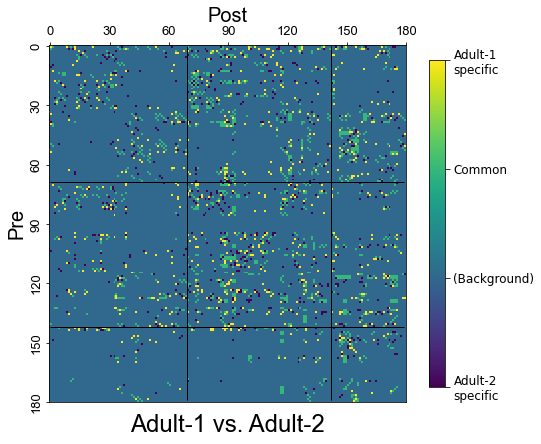

Adult1-specific : 665
Adult2-specific : 654
Common : 1279


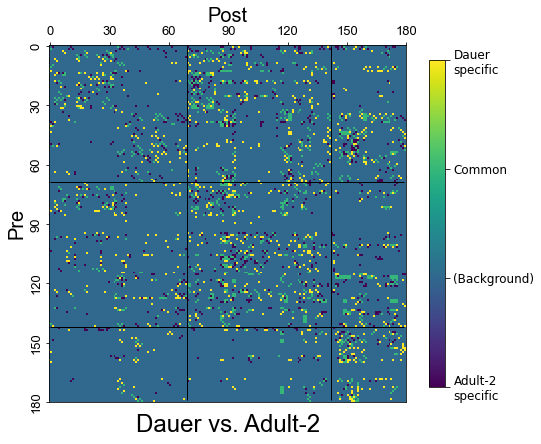

 Dauer-specific : 922
Adult2-specific : 900
Common : 1033


In [90]:
# plot

from matplotlib import cm
import matplotlib.colors as colors

mat2plot = np.copy(adult1_adult2_re_full)

fig, ((ax1)) = plt.subplots(1, 1, figsize=(8,8))
ax1.matshow(mat2plot, cmap='viridis')

cmap = cm.viridis
pc = ax1.pcolormesh(mat2plot, norm=colors.CenteredNorm(), cmap=cmap)
cbar = fig.colorbar(pc, ax=ax1, location='right', shrink=0.75)
cbar.set_ticks([-3,-1,1,3])
cbar.set_ticklabels(['Adult-2\nspecific','(Background)','Common','Adult-1\nspecific'])
cbar.ax.spines['outline'].set_visible(True)
cbar.ax.tick_params(size=5, labelsize=12, rotation=0)

ax1.set_xlabel("Post", rotation=0, fontsize=20, fontname='Arial')
ax1.xaxis.set_label_position('top')
ax1.set_ylabel("Pre", rotation=90, fontsize=20, fontname='Arial')
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.set_xticks(np.arange(0,181,30))
ax1.set_yticks(np.arange(0,181,30))
ax1.set_xticklabels(["0","30","60","90","120","150","180"], fontsize=13, rotation=0, fontname="Arial")
ax1.set_yticklabels(["0","30","60","90","120","150","180"], fontsize=13, rotation=90, fontname="Arial", va='center')
ax1.set_title("Adult-1 vs. Adult-2", y=-0.1, fontsize=24, fontname='Arial')

ax1.vlines(S_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)
ax1.vlines(S_+I_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)
ax1.hlines(S_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)
ax1.hlines(S_+I_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)

# plt.savefig(r'D:\fig_s7d.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

print("Adult1-specific :", np.where(adult1_adult2_re_full==3)[0].size)
print("Adult2-specific :", np.where(adult1_adult2_re_full==-3)[0].size)
print("Common :", np.where(adult1_adult2_re_full==1)[0].size)


## =================================================================================================
## =================================================================================================


mat2plot = np.copy(dauer_adult2_re_full)

fig, ((ax1)) = plt.subplots(1, 1, figsize=(8,8))
ax1.matshow(mat2plot, cmap='viridis')

cmap = cm.viridis
pc = ax1.pcolormesh(mat2plot, norm=colors.CenteredNorm(), cmap=cmap)
cbar = fig.colorbar(pc, ax=ax1, location='right', shrink=0.75)
cbar.set_ticks([-3,-1,1,3])
cbar.set_ticklabels(['Adult-2\nspecific','(Background)','Common','Dauer\nspecific'])
cbar.ax.spines['outline'].set_visible(True)
cbar.ax.tick_params(size=5, labelsize=12, rotation=0)

ax1.set_xlabel("Post", rotation=0, fontsize=20, fontname='Arial')
ax1.xaxis.set_label_position('top')
ax1.set_ylabel("Pre", rotation=90, fontsize=20, fontname='Arial')
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.set_xticks(np.arange(0,181,30))
ax1.set_yticks(np.arange(0,181,30))
ax1.set_xticklabels(["0","30","60","90","120","150","180"], fontsize=13, rotation=0, fontname="Arial")
ax1.set_yticklabels(["0","30","60","90","120","150","180"], fontsize=13, rotation=90, fontname="Arial", va='center')
ax1.set_title("Dauer vs. Adult-2", y=-0.1, fontsize=24, fontname='Arial')

ax1.vlines(S_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)
ax1.vlines(S_+I_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)
ax1.hlines(S_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)
ax1.hlines(S_+I_, 0, mat2plot.shape[0]-1, color='black', alpha=1.0, linestyle='solid', linewidth=1)

# plt.savefig(r'D:\fig_s7c.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

print(" Dauer-specific :", np.where(dauer_adult2_re_full==3)[0].size)
print("Adult2-specific :", np.where(dauer_adult2_re_full==-3)[0].size)
print("Common :", np.where(dauer_adult2_re_full==1)[0].size)


---

In [91]:
# OUT 0 mask

OUT_0_mask = np.ones((11,11,norm180_comp.shape[0]))

for ii in range(norm180_comp.shape[0]):
    ds1 = norm180_comp_bi[ii,:,0]; ds2 = norm180_comp_bi[ii,:,1]; ds3 = norm180_comp_bi[ii,:,2]
    ds4 = norm180_comp_bi[ii,:,3]; ds5 = norm180_comp_bi[ii,:,4]; ds6 = norm180_comp_bi[ii,:,5]
    ds7 = norm180_comp_bi[ii,:,6]; ds8 = norm180_comp_bi[ii,:,7]; jsh = norm180_comp_bi[ii,:,8]
    n2u = norm180_comp_bi[ii,:,9]; da = norm180_comp_bi[ii,:,10]
    
    data = np.vstack((ds1,ds2,ds3,ds4,ds5,ds6,jsh,ds7,ds8,n2u,da))
    
    for jj in range(data.shape[0]):
        for kk in range(data.shape[0]):
            v1 = data[jj,:]; v2 = data[kk,:]
            if (np.nonzero(v1)[0].size==0) and (np.nonzero(v2)[0].size==0):
                OUT_0_mask[jj,kk,ii] = -1
            else:
                continue

OUT_corr_mat_comp_masked = np.copy(OUT_corr_mat_comp * OUT_0_mask)


In [92]:
# S>, I>, M>

S_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,sen_idx_180]); print(S_OUT_comp_masked.shape)
I_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,int_idx_180]); print(I_OUT_comp_masked.shape)
M_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,mot_idx_180]); print(M_OUT_comp_masked.shape)


(11, 11, 69)
(11, 11, 73)
(11, 11, 38)


In [93]:

temp = np.concatenate((S_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       S_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       S_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_S_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_S_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((I_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       I_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       I_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_I_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_I_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((M_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       M_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       M_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_M_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_M_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((S_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       S_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       S_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_S_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_S_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((I_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       I_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       I_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_I_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_I_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((M_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       M_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       M_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_M_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_M_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]


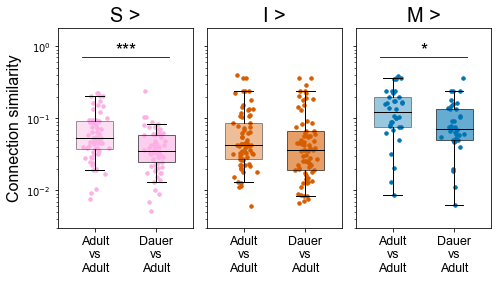

In [94]:
# plot

label = ["Adult\nvs\nAdult","Dauer\nvs\nAdult"]

fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(7,4))
xpos = np.arange(1,3,1); body_alpha1 = 0.5; body_alpha2 = 1.0; bw = 0.6; tsz = 20; fsz = 12.5; ssz = 18

ax1.set_title("S >", fontsize=tsz, fontname="Arial")
ax1.set_ylabel('Connection similarity', fontsize=16, fontname='Arial')
ax1.boxplot(aa_S_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(da_S_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_S_OUT_comp_masked_mean.size)
ax1.scatter(x, aa_S_OUT_comp_masked_mean, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_S_OUT_comp_masked_mean.size)
ax1.scatter(x, da_S_OUT_comp_masked_mean, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax1.set_yscale('log')

ax2.set_title("I >", fontsize=tsz, fontname="Arial")
ax2.boxplot(aa_I_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(da_I_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_I_OUT_comp_masked_mean.size)
ax2.scatter(x, aa_I_OUT_comp_masked_mean, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_I_OUT_comp_masked_mean.size)
ax2.scatter(x, da_I_OUT_comp_masked_mean, color='#D65E00', marker='o', s=12, alpha=1.0)
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')

ax3.set_title("M >", fontsize=tsz, fontname="Arial")
ax3.boxplot(aa_M_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(da_M_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_M_OUT_comp_masked_mean.size)
ax3.scatter(x, aa_M_OUT_comp_masked_mean, color='#0174B3', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_M_OUT_comp_masked_mean.size)
ax3.scatter(x, da_M_OUT_comp_masked_mean, color='#0174B3', marker='o', s=12, alpha=1.0)
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')

ax1.plot([0.8,2.2], [7*10**(-1),7*10**(-1)], lw=0.8, c='k')
ax1.text(1.5, 6.5*10**(-1), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax3.plot([0.8,2.2], [7*10**(-1),7*10**(-1)], lw=0.8, c='k')
ax3.text(1.5, 6.5*10**(-1), "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

plt.xlim(0.4, 2.6)
plt.ylim(3*10**(-3), 1.8*10**(0))
plt.yticks(fontsize=14, fontname="Arial")

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\eudist_similarity_aa_da_SIM_mean_no0_both.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


In [95]:
# mask type-wise

SS_corrcoef_mat_comp_masked = np.copy(SS_corrcoef_mat_comp_ori*OUT_0_mask[:,:,sen_idx_180])
SI_corrcoef_mat_comp_masked = np.copy(SI_corrcoef_mat_comp_ori*OUT_0_mask[:,:,sen_idx_180])
SM_corrcoef_mat_comp_masked = np.copy(SM_corrcoef_mat_comp_ori*OUT_0_mask[:,:,sen_idx_180])
IS_corrcoef_mat_comp_masked = np.copy(IS_corrcoef_mat_comp_ori*OUT_0_mask[:,:,int_idx_180])
II_corrcoef_mat_comp_masked = np.copy(II_corrcoef_mat_comp_ori*OUT_0_mask[:,:,int_idx_180])
IM_corrcoef_mat_comp_masked = np.copy(IM_corrcoef_mat_comp_ori*OUT_0_mask[:,:,int_idx_180])
MS_corrcoef_mat_comp_masked = np.copy(MS_corrcoef_mat_comp_ori*OUT_0_mask[:,:,mot_idx_180])
MI_corrcoef_mat_comp_masked = np.copy(MI_corrcoef_mat_comp_ori*OUT_0_mask[:,:,mot_idx_180])
MM_corrcoef_mat_comp_masked = np.copy(MM_corrcoef_mat_comp_ori*OUT_0_mask[:,:,mot_idx_180])


In [96]:
# typewise (mean)

temp = np.concatenate((SS_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       SS_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       SS_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_SS_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_SS_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((SS_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       SS_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       SS_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_SS_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_SS_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((SI_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       SI_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       SI_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_SI_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_SI_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((SI_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       SI_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       SI_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_SI_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_SI_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((SM_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                        SM_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                        SM_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_SM_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_SM_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((SM_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       SM_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       SM_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_SM_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_SM_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((IS_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       IS_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       IS_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_IS_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_IS_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((IS_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       IS_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       IS_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_IS_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_IS_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((II_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       II_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       II_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_II_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_II_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((II_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       II_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       II_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_II_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_II_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((IM_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       IM_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       IM_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_IM_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_IM_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((IM_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       IM_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       IM_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_IM_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_IM_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((MS_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       MS_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       MS_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_MS_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_MS_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((MS_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       MS_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       MS_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_MS_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_MS_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((MI_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       MI_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       MI_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_MI_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_MI_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((MI_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       MI_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       MI_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_MI_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_MI_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((MM_corrcoef_mat_comp_masked[7,8,:].reshape(1,-1),\
                       MM_corrcoef_mat_comp_masked[7,9,:].reshape(1,-1),\
                       MM_corrcoef_mat_comp_masked[8,9,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
aa_MM_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        aa_MM_corr_no0_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((MM_corrcoef_mat_comp_masked[7,10,:].reshape(1,-1),\
                       MM_corrcoef_mat_comp_masked[8,10,:].reshape(1,-1),\
                       MM_corrcoef_mat_comp_masked[9,10,:].reshape(1,-1)), axis=0); temp[temp<0] = 0
temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
da_MM_corr_no0_mean = np.zeros(temp.shape[1])
for ii in range(temp.shape[1]):
    if denom[ii]==0:
        continue
    else:
        da_MM_corr_no0_mean[ii] = numer[ii] / denom[ii]


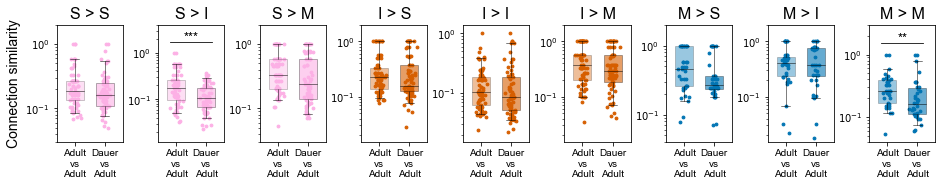

In [97]:
# plot

label = ["Adult\nvs\nAdult","Dauer\nvs\nAdult"]

fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(13,2.5))
xpos = [1,2]; bw = 0.6; tsz = 16; fsz = 10; ssz=13; ms=8

ax1.set_ylabel('Connection similarity', fontsize=14, fontname='Arial')
ax1.set_title("S > S", fontsize=tsz, fontname='Arial')
temp1 = aa_SS_corr_no0_mean[aa_SS_corr_no0_mean!=0]
temp2 = da_SS_corr_no0_mean[da_SS_corr_no0_mean!=0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax1.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax1.set_yscale('log')
ax1.set_ylim(3*10**(-2), 2*10**(0))
ax1.set_xlim(0.4, 2.6)

ax2.set_title("S > I", fontsize=tsz, fontname='Arial')
temp1 = aa_SI_corr_no0_mean[aa_SI_corr_no0_mean!=0]
temp2 = da_SI_corr_no0_mean[da_SI_corr_no0_mean!=0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax2.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax2.set_yscale('log')
ax2.set_ylim(1.2*10**(-2), 4*10**(0))

ax3.set_title("S > M", fontsize=tsz, fontname='Arial')
temp1 = aa_SM_corr_no0_mean[aa_SM_corr_no0_mean!=0]
temp2 = da_SM_corr_no0_mean[da_SM_corr_no0_mean!=0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax3.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#FCB0E5', marker='o', s=ms, alpha=1.0)
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax3.set_yscale('log')
ax3.set_ylim(3*10**(-2), 2*10**(0))

ax4.set_title("I > S", fontsize=tsz, fontname='Arial')
temp1 = aa_IS_corr_no0_mean[aa_IS_corr_no0_mean!=0]
temp2 = da_IS_corr_no0_mean[da_IS_corr_no0_mean!=0]
ax4.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax4.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax4.scatter(x, temp1, color='#D65E00', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax4.scatter(x, temp2, color='#D65E00', marker='o', s=ms, alpha=1.0)
ax4.set_xticks(xpos)
ax4.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax4.set_yscale('log')
ax4.set_ylim(1.5*10**(-2), 2*10**(0))

ax5.set_title("I > I", fontsize=tsz, fontname='Arial')
temp1 = aa_II_corr_no0_mean[aa_II_corr_no0_mean!=0]
temp2 = da_II_corr_no0_mean[da_II_corr_no0_mean!=0]
ax5.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax5.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax5.scatter(x, temp1, color='#D65E00', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax5.scatter(x, temp2, color='#D65E00', marker='o', s=ms, alpha=1.0)
ax5.set_xticks(xpos)
ax5.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax5.set_yscale('log')
ax5.set_ylim(1.5*10**(-2), 1.4*10**(0))

ax6.set_title("I > M", fontsize=tsz, fontname='Arial')
temp1 = aa_IM_corr_no0_mean[aa_IM_corr_no0_mean!=0]
temp2 = da_IM_corr_no0_mean[da_IM_corr_no0_mean!=0]
ax6.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax6.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax6.scatter(x, temp1, color='#D65E00', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax6.scatter(x, temp2, color='#D65E00', marker='o', s=ms, alpha=1.0)
ax6.set_xticks(xpos)
ax6.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax6.set_yscale('log')
ax6.set_ylim(1.5*10**(-2), 2*10**(0))

ax7.set_title("M > S", fontsize=tsz, fontname='Arial')
temp1 = aa_MS_corr_no0_mean[aa_MS_corr_no0_mean!=0]
temp2 = da_MS_corr_no0_mean[da_MS_corr_no0_mean!=0]
ax7.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax7.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax7.scatter(x, temp1, color='#0174B3', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax7.scatter(x, temp2, color='#0174B3', marker='o', s=ms, alpha=1.0)
ax7.set_xticks(xpos)
ax7.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax7.set_yscale('log')
ax7.set_ylim(4*10**(-2), 2*10**(0))

ax8.set_title("M > I", fontsize=tsz, fontname='Arial')
temp1 = aa_MI_corr_no0_mean[aa_MI_corr_no0_mean!=0]
temp2 = da_MI_corr_no0_mean[da_MI_corr_no0_mean!=0]
ax8.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax8.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax8.scatter(x, temp1, color='#0174B3', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax8.scatter(x, temp2, color='#0174B3', marker='o', s=ms, alpha=1.0)
ax8.set_xticks(xpos)
ax8.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax8.set_yscale('log')
ax8.set_ylim(1.5*10**(-2), 2*10**(0))

ax9.set_title("M > M", fontsize=tsz, fontname='Arial')
temp1 = aa_MM_corr_no0_mean[aa_MM_corr_no0_mean!=0]
temp2 = da_MM_corr_no0_mean[da_MM_corr_no0_mean!=0]
ax9.boxplot(temp1, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
ax9.boxplot(temp2, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 0.5},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 0.5, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 0.5}, capprops={"color": "k", "linewidth": 0.5})
x = np.random.normal(1, 0.08, size=temp1.size)
ax9.scatter(x, temp1, color='#0174B3', marker='o', s=ms, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax9.scatter(x, temp2, color='#0174B3', marker='o', s=ms, alpha=1.0)
ax9.set_xticks(xpos)
ax9.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax9.set_yscale('log')
ax9.set_ylim(4*10**(-2), 3*10**(0))

ax2.plot([0.8,2.2], [1.7*10**(0),1.7*10**(0)], lw=0.8, c='k')
ax2.text(1.5, 1.6*10**(0), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax9.plot([0.8,2.2], [1.55*10**(0),1.55*10**(0)], lw=0.8, c='k')
ax9.text(1.5, 1.45*10**(0), "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

fig.tight_layout(pad=0.4)

# plt.savefig(r'D:\fig_s8d.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


#### ( full version )

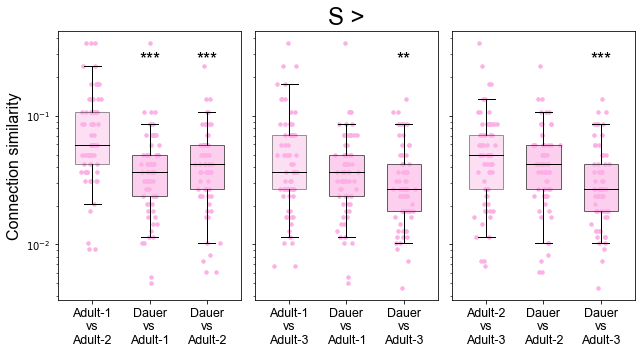

In [98]:
# full ver. - S

b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(9,5))
ax1.set_ylabel('Connection similarity', fontsize=16, fontname='Arial')
xpos = np.arange(1,4,1)

temp1 = np.copy(S_OUT_comp_masked[7,8,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(S_OUT_comp_masked[7,10,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(S_OUT_comp_masked[8,10,:]); temp3 = temp3[temp3>=0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax1.scatter(x, temp3, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax1.set_xlim(0.4,3.6)
ax1.set_yscale('log');
label = ["Adult-1\nvs\nAdult-2","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-2"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(S_OUT_comp_masked[7,9,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(S_OUT_comp_masked[7,10,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(S_OUT_comp_masked[9,10,:]); temp3 = temp3[temp3>=0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax2.scatter(x, temp3, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax2.set_title("S >", fontsize=24, fontname='Arial')
ax2.set_xlim(0.4,3.6)
label = ["Adult-1\nvs\nAdult-3","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-3"]
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(S_OUT_comp_masked[8,9,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(S_OUT_comp_masked[8,10,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(S_OUT_comp_masked[9,10,:]); temp3 = temp3[temp3>=0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax3.scatter(x, temp3, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax3.set_xlim(0.4,3.6)
label = ["Adult-2\nvs\nAdult-3","Dauer\nvs\nAdult-2","Dauer\nvs\nAdult-3"]
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax1.text(2, 2.3*10**(-1), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax1.text(3, 2.3*10**(-1), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax2.text(3, 2.3*10**(-1), "**", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax3.text(3, 2.3*10**(-1), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s8c1.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


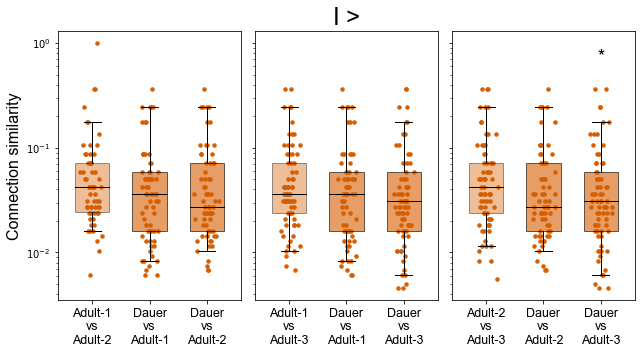

In [99]:
# full ver. - I

b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(9,5))
ax1.set_ylabel('Connection similarity', fontsize=16, fontname='Arial')
xpos = np.arange(1,4,1)

temp1 = np.copy(I_OUT_comp_masked[7,8,:]); temp1 = temp1[temp1>0]
temp2 = np.copy(I_OUT_comp_masked[7,10,:]); temp2 = temp2[temp2>0]
temp3 = np.copy(I_OUT_comp_masked[8,10,:]); temp3 = temp3[temp3>0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax1.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax1.set_xlim(0.4,3.6)
ax1.set_yscale('log');
label = ["Adult-1\nvs\nAdult-2","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-2"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(I_OUT_comp_masked[7,9,:]); temp1 = temp1[temp1>0]
temp2 = np.copy(I_OUT_comp_masked[7,10,:]); temp2 = temp2[temp2>0]
temp3 = np.copy(I_OUT_comp_masked[9,10,:]); temp3 = temp3[temp3>0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax2.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax2.set_title("I >", fontsize=24, fontname='Arial')
ax2.set_xlim(0.4,3.6)
label = ["Adult-1\nvs\nAdult-3","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-3"]
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(I_OUT_comp_masked[8,9,:]); temp1 = temp1[temp1>0]
temp2 = np.copy(I_OUT_comp_masked[8,10,:]); temp2 = temp2[temp2>0]
temp3 = np.copy(I_OUT_comp_masked[9,10,:]); temp3 = temp3[temp3>0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax3.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax3.set_xlim(0.4,3.6)
label = ["Adult-2\nvs\nAdult-3","Dauer\nvs\nAdult-2","Dauer\nvs\nAdult-3"]
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

ax3.text(3, 6.0*10**(-1), "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s8c2.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


#### ( Witvliet type )

In [100]:
# S>, I>, M>, m>

wS_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,sen_idx_180_w]); print(wS_OUT_comp_masked.shape)
wI_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,int_idx_180_w]); print(wI_OUT_comp_masked.shape)
wM_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,mot_idx_180_w]); print(wM_OUT_comp_masked.shape)
wm_OUT_comp_masked = np.copy(OUT_corr_mat_comp_masked[:,:,mod_idx_180_w]); print(wm_OUT_comp_masked.shape)


(11, 11, 61)
(11, 11, 48)
(11, 11, 42)
(11, 11, 29)


In [101]:

temp = np.concatenate((wS_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       wS_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       wS_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_wS_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_wS_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wI_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       wI_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       wI_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_wI_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_wI_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wM_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       wM_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       wM_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_wM_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_wM_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wm_OUT_comp_masked[7,8,:].reshape(1,-1),\
                       wm_OUT_comp_masked[7,9,:].reshape(1,-1),\
                       wm_OUT_comp_masked[8,9,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
aa_wm_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        aa_wm_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wS_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       wS_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       wS_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_wS_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_wS_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wI_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       wI_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       wI_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_wI_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_wI_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wM_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       wM_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       wM_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_wM_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_wM_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]

temp = np.concatenate((wm_OUT_comp_masked[7,10,:].reshape(1,-1),\
                       wm_OUT_comp_masked[8,10,:].reshape(1,-1),\
                       wm_OUT_comp_masked[9,10,:].reshape(1,-1)), axis=0)
temp[temp<0] = 0; temp_bi = np.copy(temp); temp_bi[temp_bi!=0] = 1
da_wm_OUT_comp_masked_mean = np.zeros(temp.shape[1])
numer = np.sum(temp, axis=0); denom = np.sum(temp_bi, axis=0)
for ii in range(numer.size):
    if denom[ii]==0:
        continue
    else:
        da_wm_OUT_comp_masked_mean[ii] = numer[ii] / denom[ii]


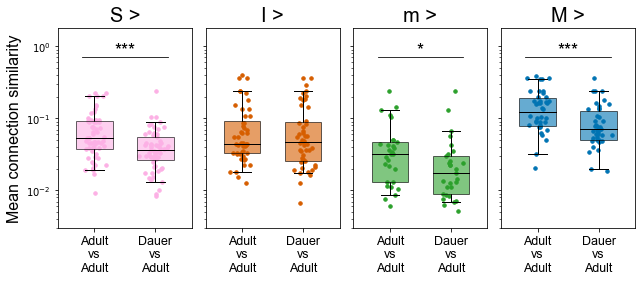

In [102]:
# plot

label = ["Adult\nvs\nAdult","Dauer\nvs\nAdult"]

fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(9,4))
xpos = np.arange(1,3,1); body_alpha1 = 0.5; body_alpha2 = 1.0; bw = 0.6; tsz = 20; fsz = 12.5; ssz = 18

ax1.set_title("S >", fontsize=tsz, fontname="Arial")
ax1.set_ylabel('Mean connection similarity', fontsize=16, fontname='Arial')
ax1.boxplot(aa_wS_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(da_wS_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#FCB0E5'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_wS_OUT_comp_masked_mean.size)
ax1.scatter(x, aa_wS_OUT_comp_masked_mean, color='#FCB0E5', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_wS_OUT_comp_masked_mean.size)
ax1.scatter(x, da_wS_OUT_comp_masked_mean, color='#FCB0E5', marker='o', s=12, alpha=1.0)
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')
ax1.set_yscale('log')

ax2.set_title("I >", fontsize=tsz, fontname="Arial")
ax2.boxplot(aa_wI_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(da_wI_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_wI_OUT_comp_masked_mean.size)
ax2.scatter(x, aa_wI_OUT_comp_masked_mean, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_wI_OUT_comp_masked_mean.size)
ax2.scatter(x, da_wI_OUT_comp_masked_mean, color='#D65E00', marker='o', s=12, alpha=1.0)
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')

ax3.set_title("m >", fontsize=tsz, fontname="Arial")
ax3.boxplot(aa_wm_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('tab:green'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(da_wm_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('tab:green'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_wm_OUT_comp_masked_mean.size)
ax3.scatter(x, aa_wm_OUT_comp_masked_mean, color='tab:green', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_wm_OUT_comp_masked_mean.size)
ax3.scatter(x, da_wm_OUT_comp_masked_mean, color='tab:green', marker='o', s=12, alpha=1.0)
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')

ax4.set_title("M >", fontsize=tsz, fontname="Arial")
ax4.boxplot(aa_wM_OUT_comp_masked_mean, positions=[xpos[0]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax4.boxplot(da_wM_OUT_comp_masked_mean, positions=[xpos[1]], widths=bw, patch_artist=True,\
            showmeans=False, showfliers=False, whis=(5,95), medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#0174B3'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=aa_wM_OUT_comp_masked_mean.size)
ax4.scatter(x, aa_wM_OUT_comp_masked_mean, color='#0174B3', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=da_wM_OUT_comp_masked_mean.size)
ax4.scatter(x, da_wM_OUT_comp_masked_mean, color='#0174B3', marker='o', s=12, alpha=1.0)
ax4.set_xticks(xpos)
ax4.set_xticklabels(label, rotation=0, fontsize=fsz, fontname='Arial')

ax1.plot([0.8,2.2], [7*10**(-1),7*10**(-1)], lw=0.8, c='k')
ax1.text(1.5, 6.5*10**(-1), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax3.plot([0.8,2.2], [7*10**(-1),7*10**(-1)], lw=0.8, c='k')
ax3.text(1.5, 6.5*10**(-1), "*", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')
ax4.plot([0.8,2.2], [7*10**(-1),7*10**(-1)], lw=0.8, c='k')
ax4.text(1.5, 6.5*10**(-1), "***", ha='center', va='bottom', color='k', fontsize=ssz, fontname='Arial')

plt.xlim(0.4, 2.6)
plt.ylim(3*10**(-3), 1.8*10**(0))
plt.yticks(fontsize=14, fontname="Arial")

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s9b.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


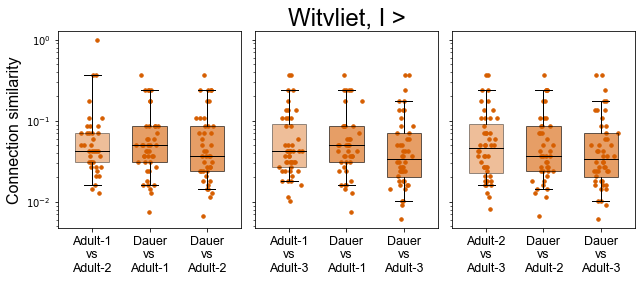

In [103]:
# witvliet type I>

b_width = 0.6; v_width = 0.6; body_alpha1 = 0.6; body_alpha2 = 1.0; ssz=18; fsz=12.5


fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(9,4))
ax1.set_ylabel('Connection similarity', fontsize=16, fontname='Arial')
xpos = np.arange(1,4,1)

temp1 = np.copy(wI_OUT_comp_masked[7,8,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(wI_OUT_comp_masked[7,10,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(wI_OUT_comp_masked[8,10,:]); temp3 = temp3[temp3>=0]
ax1.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax1.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax1.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax1.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax1.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax1.set_xlim(0.4,3.6)
ax1.set_yscale('log');
label = ["Adult-1\nvs\nAdult-2","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-2"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(wI_OUT_comp_masked[7,9,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(wI_OUT_comp_masked[7,10,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(wI_OUT_comp_masked[9,10,:]); temp3 = temp3[temp3>=0]
ax2.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax2.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax2.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax2.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax2.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax2.set_title("Witvliet, I >", fontsize=24, fontname='Arial')
ax2.set_xlim(0.4,3.6)
label = ["Adult-1\nvs\nAdult-3","Dauer\nvs\nAdult-1","Dauer\nvs\nAdult-3"]
ax2.set_xticks(xpos)
ax2.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

temp1 = np.copy(wI_OUT_comp_masked[8,9,:]); temp1 = temp1[temp1>=0]
temp2 = np.copy(wI_OUT_comp_masked[8,10,:]); temp2 = temp2[temp2>=0]
temp3 = np.copy(wI_OUT_comp_masked[9,10,:]); temp3 = temp3[temp3>=0]
ax3.boxplot(temp1, positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.4},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp2, positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
ax3.boxplot(temp3, positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "k", "linewidth": 1.0},\
            boxprops={"facecolor": ('#D65E00'), "edgecolor": "k", "linewidth": 1.0, "alpha": 0.6},\
            whiskerprops={"color": "k", "linewidth": 1.0}, capprops={"color": "k", "linewidth": 1.0})
x = np.random.normal(1, 0.08, size=temp1.size)
ax3.scatter(x, temp1, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(2, 0.08, size=temp2.size)
ax3.scatter(x, temp2, color='#D65E00', marker='o', s=12, alpha=1.0)
x = np.random.normal(3, 0.08, size=temp3.size)
ax3.scatter(x, temp3, color='#D65E00', marker='o', s=12, alpha=1.0)
ax3.set_xlim(0.4,3.6)
label = ["Adult-2\nvs\nAdult-3","Dauer\nvs\nAdult-2","Dauer\nvs\nAdult-3"]
ax3.set_xticks(xpos)
ax3.set_xticklabels(label, fontsize=fsz, rotation=0, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s9d.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


### Connection similarity w.r.t L/R pair

In [104]:
# Partner similarity check

partner_LRsim_comp = np.zeros((com_L_idx[:95].size,norm180_comp_bi.shape[2]))  # 95 X 11
single_neuron_idx = com_L_idx[np.where(com_L_idx==com_R_idx)[0]]  # index for LR_id


for ii in tqdm(range(partner_LRsim_comp.shape[0])):
    for dd in range(partner_LRsim_comp.shape[1]):
        vLL = norm180_comp_bi[com_L_idx[ii],com_L_idx[:95],dd]
        vLR = norm180_comp_bi[com_L_idx[ii],com_R_idx[:95],dd]  # AAL -> L or R
        vRL = norm180_comp_bi[com_R_idx[ii],com_L_idx[:95],dd]
        vRR = norm180_comp_bi[com_R_idx[ii],com_R_idx[:95],dd]  # AAR -> L or R
        vS1 = norm180_comp_bi[com_L_idx[ii],single_neuron_idx,dd]
        vS2 = norm180_comp_bi[com_R_idx[ii],single_neuron_idx,dd]
        
        # compare between 'vLL, vRR' and 'vLR, vRL'
        eudist_LR = np.linalg.norm(vLL - vRR) + np.linalg.norm(vLR - vRL) - np.linalg.norm(vS1 - vS2)
        partner_LRsim_comp[ii,dd] = np.exp(-eudist_LR)

partner_LRsim_comp[np.isnan(partner_LRsim_comp)] = 0  # nan -> 0


100%|██████████| 95/95 [00:00<00:00, 2968.88it/s]


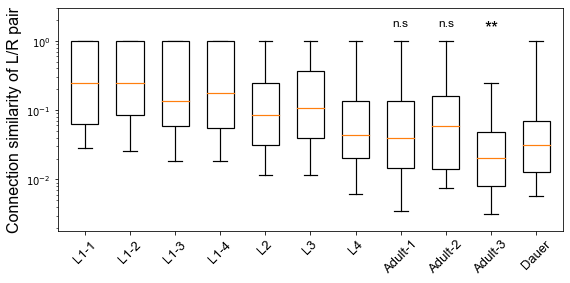

In [105]:
# (plot) partner similarity

b_width = 0.6; lw = 1.2; msz=7; ssz=18; fsz=13


fig, ((ax1)) = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(8,4))
ax1.set_ylabel('Connection similarity of L/R pair', fontsize=16, fontname='Arial')
xpos = np.arange(1,12,1)

ax1.boxplot(partner_LRsim_comp[:,0], positions=[xpos[0]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,1], positions=[xpos[1]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,2], positions=[xpos[2]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,3], positions=[xpos[3]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,4], positions=[xpos[4]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,5], positions=[xpos[5]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,8], positions=[xpos[6]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,6], positions=[xpos[7]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,7], positions=[xpos[8]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,9], positions=[xpos[9]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})
ax1.boxplot(partner_LRsim_comp[:,10], positions=[xpos[10]], widths=b_width, patch_artist=True, whis=(5,95),\
            showmeans=False, showfliers=False, medianprops={"color": "tab:orange", "linewidth": lw},\
            boxprops={"facecolor": ('w'), "edgecolor": "k", "linewidth": lw, "alpha": 1.0},\
            whiskerprops={"color": "k", "linewidth": lw}, capprops={"color": "k", "linewidth": lw})

ax1.set_xlim(0.4,11.6)
ax1.set_yscale('log')
ax1.set_ylim(1.8*10**(-3),3*10**(0))
label = ["L1-1","L1-2","L1-3","L1-4","L2","L3","L4","Adult-1","Adult-2","Adult-3","Dauer"]
ax1.set_xticks(xpos)
ax1.set_xticklabels(label, fontsize=fsz, rotation=45, fontname='Arial')
ax1.text(xpos[7], 1.5*10**(0), "n.s", ha='center', va='bottom', color='k', fontsize=12, fontname='Arial')
ax1.text(xpos[8], 1.5*10**(0), "n.s", ha='center', va='bottom', color='k', fontsize=12, fontname='Arial')
ax1.text(xpos[9], 1.12*10**(0), "**", ha='center', va='bottom', color='k', fontsize=18, fontname='Arial')

fig.tight_layout(pad=1.0)

# plt.savefig(r'D:\fig_s3f.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


---
---

## Motif

In [106]:
# two-cell motif

dauer_2motif = fc.twocell_motif(norm180_comp_bi[:,:,10])
dset7_2motif = fc.twocell_motif(norm180_comp_bi[:,:,6])
dset8_2motif = fc.twocell_motif(norm180_comp_bi[:,:,7])
n2u_2motif = fc.twocell_motif(norm180_comp_bi[:,:,9])


In [107]:
# Type-wise three-cell motif

# 2 cell connection probability
dauer_sensen_2motif = fc.twocell_motif(dauer_SS_mat); dauer_intint_2motif = fc.twocell_motif(dauer_II_mat)
dauer_motmot_2motif = fc.twocell_motif(dauer_MM_mat);
dauer_sensen_2p = [dauer_sensen_2motif[0]/sum(dauer_sensen_2motif), dauer_sensen_2motif[1]/(sum(dauer_sensen_2motif)*2),
                   dauer_sensen_2motif[2]/sum(dauer_sensen_2motif)]
dauer_intint_2p = [dauer_intint_2motif[0]/sum(dauer_intint_2motif), dauer_intint_2motif[1]/(sum(dauer_intint_2motif)*2),
                   dauer_intint_2motif[2]/sum(dauer_intint_2motif)]
dauer_motmot_2p = [dauer_motmot_2motif[0]/sum(dauer_motmot_2motif), dauer_motmot_2motif[1]/(sum(dauer_motmot_2motif)*2),
                   dauer_motmot_2motif[2]/sum(dauer_motmot_2motif)]

dset7_sensen_2motif = fc.twocell_motif(dset7_SS_mat); dset7_intint_2motif = fc.twocell_motif(dset7_II_mat)
dset7_motmot_2motif = fc.twocell_motif(dset7_MM_mat);
dset7_sensen_2p = [dset7_sensen_2motif[0]/sum(dset7_sensen_2motif), dset7_sensen_2motif[1]/(sum(dset7_sensen_2motif)*2),
                   dset7_sensen_2motif[2]/sum(dset7_sensen_2motif)]
dset7_intint_2p = [dset7_intint_2motif[0]/sum(dset7_intint_2motif), dset7_intint_2motif[1]/(sum(dset7_intint_2motif)*2),
                   dset7_intint_2motif[2]/sum(dset7_intint_2motif)]
dset7_motmot_2p = [dset7_motmot_2motif[0]/sum(dset7_motmot_2motif), dset7_motmot_2motif[1]/(sum(dset7_motmot_2motif)*2),
                   dset7_motmot_2motif[2]/sum(dset7_motmot_2motif)]

dset8_sensen_2motif = fc.twocell_motif(dset8_SS_mat); dset8_intint_2motif = fc.twocell_motif(dset8_II_mat)
dset8_motmot_2motif = fc.twocell_motif(dset8_MM_mat);
dset8_sensen_2p = [dset8_sensen_2motif[0]/sum(dset8_sensen_2motif), dset8_sensen_2motif[1]/(sum(dset8_sensen_2motif)*2),
                   dset8_sensen_2motif[2]/sum(dset8_sensen_2motif)]
dset8_intint_2p = [dset8_intint_2motif[0]/sum(dset8_intint_2motif), dset8_intint_2motif[1]/(sum(dset8_intint_2motif)*2),
                   dset8_intint_2motif[2]/sum(dset8_intint_2motif)]
dset8_motmot_2p = [dset8_motmot_2motif[0]/sum(dset8_motmot_2motif), dset8_motmot_2motif[1]/(sum(dset8_motmot_2motif)*2),
                   dset8_motmot_2motif[2]/sum(dset8_motmot_2motif)]

n2u_sensen_2motif = fc.twocell_motif(n2u_SS_mat); n2u_intint_2motif = fc.twocell_motif(n2u_II_mat)
n2u_motmot_2motif = fc.twocell_motif(n2u_MM_mat);
n2u_sensen_2p = [n2u_sensen_2motif[0]/sum(n2u_sensen_2motif), n2u_sensen_2motif[1]/(sum(n2u_sensen_2motif)*2),
                 n2u_sensen_2motif[2]/sum(n2u_sensen_2motif)]
n2u_intint_2p = [n2u_intint_2motif[0]/sum(n2u_intint_2motif), n2u_intint_2motif[1]/(sum(n2u_intint_2motif)*2),
                 n2u_intint_2motif[2]/sum(n2u_intint_2motif)]
n2u_motmot_2p = [n2u_motmot_2motif[0]/sum(n2u_motmot_2motif), n2u_motmot_2motif[1]/(sum(n2u_motmot_2motif)*2),
                 n2u_motmot_2motif[2]/sum(n2u_motmot_2motif)]

# motif probability initializing
dauer_sensen_3p = fc.twop_to_threep(dauer_sensen_2p); dauer_intint_3p = fc.twop_to_threep(dauer_intint_2p)
dauer_motmot_3p = fc.twop_to_threep(dauer_motmot_2p)
dset7_sensen_3p = fc.twop_to_threep(dset7_sensen_2p); dset7_intint_3p = fc.twop_to_threep(dset7_intint_2p)
dset7_motmot_3p = fc.twop_to_threep(dset7_motmot_2p)
dset8_sensen_3p = fc.twop_to_threep(dset8_sensen_2p); dset8_intint_3p = fc.twop_to_threep(dset8_intint_2p)
dset8_motmot_3p = fc.twop_to_threep(dset8_motmot_2p)
n2u_sensen_3p = fc.twop_to_threep(n2u_sensen_2p); n2u_intint_3p = fc.twop_to_threep(n2u_intint_2p)
n2u_motmot_3p = fc.twop_to_threep(n2u_motmot_2p)

# submatrix motif count
dauer_sensen_3motif = fc.threecell_motif(dauer_SS_mat); dauer_intint_3motif = fc.threecell_motif(dauer_II_mat)
dauer_motmot_3motif = fc.threecell_motif(dauer_MM_mat)
dset7_sensen_3motif = fc.threecell_motif(dset7_SS_mat); dset7_intint_3motif = fc.threecell_motif(dset7_II_mat)
dset7_motmot_3motif = fc.threecell_motif(dset7_MM_mat)
dset8_sensen_3motif = fc.threecell_motif(dset8_SS_mat); dset8_intint_3motif = fc.threecell_motif(dset8_II_mat)
dset8_motmot_3motif = fc.threecell_motif(dset8_MM_mat)
n2u_sensen_3motif = fc.threecell_motif(n2u_SS_mat); n2u_intint_3motif = fc.threecell_motif(n2u_II_mat)
n2u_motmot_3motif = fc.threecell_motif(n2u_MM_mat)


100%|██████████| 8436/8436 [00:00<00:00, 52396.66it/s]


In [108]:
# relative value

import itertools

dauer_sensen_3comb = list(itertools.combinations(np.arange(dauer_SS_mat.shape[0]), 3))
dauer_intint_3comb = list(itertools.combinations(np.arange(dauer_II_mat.shape[0]), 3))
dauer_motmot_3comb = list(itertools.combinations(np.arange(dauer_MM_mat.shape[0]), 3))
dset7_sensen_3comb = list(itertools.combinations(np.arange(dset7_SS_mat.shape[0]), 3))
dset7_intint_3comb = list(itertools.combinations(np.arange(dset7_II_mat.shape[0]), 3))
dset7_motmot_3comb = list(itertools.combinations(np.arange(dset7_MM_mat.shape[0]), 3))
dset8_sensen_3comb = list(itertools.combinations(np.arange(dset8_SS_mat.shape[0]), 3))
dset8_intint_3comb = list(itertools.combinations(np.arange(dset8_II_mat.shape[0]), 3))
dset8_motmot_3comb = list(itertools.combinations(np.arange(dset8_MM_mat.shape[0]), 3))
n2u_sensen_3comb = list(itertools.combinations(np.arange(n2u_SS_mat.shape[0]), 3))
n2u_intint_3comb = list(itertools.combinations(np.arange(n2u_II_mat.shape[0]), 3))
n2u_motmot_3comb = list(itertools.combinations(np.arange(n2u_MM_mat.shape[0]), 3))

dauer_sensen_theo3m = len(dauer_sensen_3comb) * dauer_sensen_3p
dauer_intint_theo3m = len(dauer_intint_3comb) * dauer_intint_3p
dauer_motmot_theo3m = len(dauer_motmot_3comb) * dauer_motmot_3p
dset7_sensen_theo3m = len(dset7_sensen_3comb) * dset7_sensen_3p
dset7_intint_theo3m = len(dset7_intint_3comb) * dset7_intint_3p
dset7_motmot_theo3m = len(dset7_motmot_3comb) * dset7_motmot_3p
dset8_sensen_theo3m = len(dset8_sensen_3comb) * dset8_sensen_3p
dset8_intint_theo3m = len(dset8_intint_3comb) * dset8_intint_3p
dset8_motmot_theo3m = len(dset8_motmot_3comb) * dset8_motmot_3p
n2u_sensen_theo3m = len(n2u_sensen_3comb) * n2u_sensen_3p
n2u_intint_theo3m = len(n2u_intint_3comb) * n2u_intint_3p
n2u_motmot_theo3m = len(n2u_motmot_3comb) * n2u_motmot_3p

dauer_sensen_rel3m = dauer_sensen_3motif / dauer_sensen_theo3m
dauer_intint_rel3m = dauer_intint_3motif / dauer_intint_theo3m
dauer_motmot_rel3m = dauer_motmot_3motif / dauer_motmot_theo3m
dset7_sensen_rel3m = dset7_sensen_3motif / dset7_sensen_theo3m
dset7_intint_rel3m = dset7_intint_3motif / dset7_intint_theo3m
dset7_motmot_rel3m = dset7_motmot_3motif / dset7_motmot_theo3m
dset8_sensen_rel3m = dset8_sensen_3motif / dset8_sensen_theo3m
dset8_intint_rel3m = dset8_intint_3motif / dset8_intint_theo3m
dset8_motmot_rel3m = dset8_motmot_3motif / dset8_motmot_theo3m
n2u_sensen_rel3m = n2u_sensen_3motif / n2u_sensen_theo3m
n2u_intint_rel3m = n2u_intint_3motif / n2u_intint_theo3m
n2u_motmot_rel3m = n2u_motmot_3motif / n2u_motmot_theo3m


In [109]:
# generate multiple constrained ER

import igraph as ig

repeat = 1000    # change

dauer_sensen_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dauer_cER_mat = fc.constrained_ER(dauer_SS_mat.shape[0], dauer_sensen_2motif)
    g = ig.Graph.Weighted_Adjacency(dauer_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dauer_sensen_cER_3m[ii,:] = order_change
dauer_intint_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dauer_cER_mat = fc.constrained_ER(dauer_II_mat.shape[0], dauer_intint_2motif)
    g = ig.Graph.Weighted_Adjacency(dauer_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dauer_intint_cER_3m[ii,:] = order_change
dauer_motmot_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dauer_cER_mat = fc.constrained_ER(dauer_MM_mat.shape[0], dauer_motmot_2motif)
    g = ig.Graph.Weighted_Adjacency(dauer_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dauer_motmot_cER_3m[ii,:] = order_change

dset7_sensen_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dset7_cER_mat = fc.constrained_ER(dset7_SS_mat.shape[0], dset7_sensen_2motif)
    g = ig.Graph.Weighted_Adjacency(dset7_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dset7_sensen_cER_3m[ii,:] = order_change
dset7_intint_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dset7_cER_mat = fc.constrained_ER(dset7_II_mat.shape[0], dset7_intint_2motif)
    g = ig.Graph.Weighted_Adjacency(dset7_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dset7_intint_cER_3m[ii,:] = order_change
dset7_motmot_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dset7_cER_mat = fc.constrained_ER(dset7_MM_mat.shape[0], dset7_motmot_2motif)
    g = ig.Graph.Weighted_Adjacency(dset7_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dset7_motmot_cER_3m[ii,:] = order_change

dset8_sensen_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dset8_cER_mat = fc.constrained_ER(dset8_SS_mat.shape[0], dset8_sensen_2motif)
    g = ig.Graph.Weighted_Adjacency(dset8_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dset8_sensen_cER_3m[ii,:] = order_change
dset8_intint_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dset8_cER_mat = fc.constrained_ER(dset8_II_mat.shape[0], dset8_intint_2motif)
    g = ig.Graph.Weighted_Adjacency(dset8_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dset8_intint_cER_3m[ii,:] = order_change
dset8_motmot_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    dset8_cER_mat = fc.constrained_ER(dset8_MM_mat.shape[0], dset8_motmot_2motif)
    g = ig.Graph.Weighted_Adjacency(dset8_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    dset8_motmot_cER_3m[ii,:] = order_change

n2u_sensen_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    n2u_cER_mat = fc.constrained_ER(n2u_SS_mat.shape[0], n2u_sensen_2motif)
    g = ig.Graph.Weighted_Adjacency(n2u_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    n2u_sensen_cER_3m[ii,:] = order_change
n2u_intint_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    n2u_cER_mat = fc.constrained_ER(n2u_II_mat.shape[0], n2u_intint_2motif)
    g = ig.Graph.Weighted_Adjacency(n2u_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    n2u_intint_cER_3m[ii,:] = order_change
n2u_motmot_cER_3m = np.zeros((repeat,16))
for ii in tqdm(range(repeat)):
    n2u_cER_mat = fc.constrained_ER(n2u_MM_mat.shape[0], n2u_motmot_2motif)
    g = ig.Graph.Weighted_Adjacency(n2u_cER_mat)
    temp = np.copy(np.array(g.triad_census()))
    order_change = np.copy(temp)
    order_change[9] = temp[8]; order_change[10] = temp[9]; order_change[8] = temp[10]
    order_change[12] = temp[13]; order_change[13] = temp[12]
    n2u_motmot_cER_3m[ii,:] = order_change


100%|██████████| 1000/1000 [00:00<00:00, 1838.25it/s]


In [110]:
# triangles

dauer_sensen_tri = sum(dauer_sensen_3motif[9:])
dauer_ss_tri_adj = (dauer_sensen_tri / sum(dauer_sensen_3motif))
dset7_sensen_tri = sum(dset7_sensen_3motif[9:])
dset7_ss_tri_adj = (dset7_sensen_tri / sum(dset7_sensen_3motif))
dset8_sensen_tri = sum(dset8_sensen_3motif[9:])
dset8_ss_tri_adj = (dset8_sensen_tri / sum(dset8_sensen_3motif))
n2u_sensen_tri = sum(n2u_sensen_3motif[9:])
n2u_ss_tri_adj = (n2u_sensen_tri / sum(n2u_sensen_3motif))

dauer_intint_tri = sum(dauer_intint_3motif[9:])
dauer_ii_tri_adj = (dauer_intint_tri / sum(dauer_intint_3motif))
dset7_intint_tri = sum(dset7_intint_3motif[9:])
dset7_ii_tri_adj = (dset7_intint_tri / sum(dset7_intint_3motif))
dset8_intint_tri = sum(dset8_intint_3motif[9:])
dset8_ii_tri_adj = (dset8_intint_tri / sum(dset8_intint_3motif))
n2u_intint_tri = sum(n2u_intint_3motif[9:])
n2u_ii_tri_adj = (n2u_intint_tri / sum(n2u_intint_3motif))

dauer_motmot_tri = sum(dauer_motmot_3motif[9:])
dauer_mm_tri_adj = (dauer_motmot_tri / sum(dauer_motmot_3motif))
dset7_motmot_tri = sum(dset7_motmot_3motif[9:])
dset7_mm_tri_adj = (dset7_motmot_tri / sum(dset7_motmot_3motif))
dset8_motmot_tri = sum(dset8_motmot_3motif[9:])
dset8_mm_tri_adj = (dset8_motmot_tri / sum(dset8_motmot_3motif))
n2u_motmot_tri = sum(n2u_motmot_3motif[9:])
n2u_mm_tri_adj = (n2u_motmot_tri / sum(n2u_motmot_3motif))


In [111]:
# proportion for random network

# cER
dauer_sensen_theo3m_temp = np.mean(dauer_sensen_cER_3m, axis=0)
dset7_sensen_theo3m_temp = np.mean(dset7_sensen_cER_3m, axis=0)
dset8_sensen_theo3m_temp = np.mean(dset8_sensen_cER_3m, axis=0)
n2u_sensen_theo3m_temp = np.mean(n2u_sensen_cER_3m, axis=0)
dauer_intint_theo3m_temp = np.mean(dauer_intint_cER_3m, axis=0)
dset7_intint_theo3m_temp = np.mean(dset7_intint_cER_3m, axis=0)
dset8_intint_theo3m_temp = np.mean(dset8_intint_cER_3m, axis=0)
n2u_intint_theo3m_temp = np.mean(n2u_intint_cER_3m, axis=0)
dauer_motmot_theo3m_temp = np.mean(dauer_motmot_cER_3m, axis=0)
dset7_motmot_theo3m_temp = np.mean(dset7_motmot_cER_3m, axis=0)
dset8_motmot_theo3m_temp = np.mean(dset8_motmot_cER_3m, axis=0)
n2u_motmot_theo3m_temp = np.mean(n2u_motmot_cER_3m, axis=0)

dauer_sensen_tri_rand = sum(dauer_sensen_theo3m_temp[9:])
dauer_ss_tri_adj_rand = (dauer_sensen_tri_rand / sum(dauer_sensen_theo3m_temp))
dset7_sensen_tri_rand = sum(dset7_sensen_theo3m_temp[9:])
dset7_ss_tri_adj_rand = (dset7_sensen_tri_rand / sum(dset7_sensen_theo3m_temp))
dset8_sensen_tri_rand = sum(dset8_sensen_theo3m_temp[9:])
dset8_ss_tri_adj_rand = (dset8_sensen_tri_rand / sum(dset8_sensen_theo3m_temp))
n2u_sensen_tri_rand = sum(n2u_sensen_theo3m_temp[9:])
n2u_ss_tri_adj_rand = (n2u_sensen_tri_rand / sum(n2u_sensen_theo3m_temp))

dauer_intint_tri_rand = sum(dauer_intint_theo3m_temp[9:])
dauer_ii_tri_adj_rand = (dauer_intint_tri_rand / sum(dauer_intint_theo3m_temp))
dset7_intint_tri_rand = sum(dset7_intint_theo3m_temp[9:])
dset7_ii_tri_adj_rand = (dset7_intint_tri_rand / sum(dset7_intint_theo3m_temp))
dset8_intint_tri_rand = sum(dset8_intint_theo3m_temp[9:])
dset8_ii_tri_adj_rand = (dset8_intint_tri_rand / sum(dset8_intint_theo3m_temp))
n2u_intint_tri_rand = sum(n2u_intint_theo3m_temp[9:])
n2u_ii_tri_adj_rand = (n2u_intint_tri_rand / sum(n2u_intint_theo3m_temp))

dauer_motmot_tri_rand = sum(dauer_motmot_theo3m_temp[9:])
dauer_mm_tri_adj_rand = (dauer_motmot_tri_rand / sum(dauer_motmot_theo3m_temp))
dset7_motmot_tri_rand = sum(dset7_motmot_theo3m_temp[9:])
dset7_mm_tri_adj_rand = (dset7_motmot_tri_rand / sum(dset7_motmot_theo3m_temp))
dset8_motmot_tri_rand = sum(dset8_motmot_theo3m_temp[9:])
dset8_mm_tri_adj_rand = (dset8_motmot_tri_rand / sum(dset8_motmot_theo3m_temp))
n2u_motmot_tri_rand = sum(n2u_motmot_theo3m_temp[9:])
n2u_mm_tri_adj_rand = (n2u_motmot_tri_rand / sum(n2u_motmot_theo3m_temp))


In [112]:
# (for violin plot)

dset7_ss_tri_violin_adj = np.sum(dset7_sensen_cER_3m[:,9:], axis=1) / np.sum(dset7_sensen_cER_3m, axis=1)
dset8_ss_tri_violin_adj = np.sum(dset8_sensen_cER_3m[:,9:], axis=1) / np.sum(dset8_sensen_cER_3m, axis=1)
n2u_ss_tri_violin_adj = np.sum(n2u_sensen_cER_3m[:,9:], axis=1) / np.sum(n2u_sensen_cER_3m, axis=1)
dauer_ss_tri_violin_adj = np.sum(dauer_sensen_cER_3m[:,9:], axis=1) / np.sum(dauer_sensen_cER_3m, axis=1)

dset7_ii_tri_violin_adj = np.sum(dset7_intint_cER_3m[:,9:], axis=1) / np.sum(dset7_intint_cER_3m, axis=1)
dset8_ii_tri_violin_adj = np.sum(dset8_intint_cER_3m[:,9:], axis=1) / np.sum(dset8_intint_cER_3m, axis=1)
n2u_ii_tri_violin_adj = np.sum(n2u_intint_cER_3m[:,9:], axis=1) / np.sum(n2u_intint_cER_3m, axis=1)
dauer_ii_tri_violin_adj = np.sum(dauer_intint_cER_3m[:,9:], axis=1) / np.sum(dauer_intint_cER_3m, axis=1)

dset7_mm_tri_violin_adj = np.sum(dset7_motmot_cER_3m[:,9:], axis=1) / np.sum(dset7_motmot_cER_3m, axis=1)
dset8_mm_tri_violin_adj = np.sum(dset8_motmot_cER_3m[:,9:], axis=1) / np.sum(dset8_motmot_cER_3m, axis=1)
n2u_mm_tri_violin_adj = np.sum(n2u_motmot_cER_3m[:,9:], axis=1) / np.sum(n2u_motmot_cER_3m, axis=1)
dauer_mm_tri_violin_adj = np.sum(dauer_motmot_cER_3m[:,9:], axis=1) / np.sum(dauer_motmot_cER_3m, axis=1)


In [113]:
# proportion for random network

# cER
dauer_sensen_theo3m_temp_cER = np.mean(dauer_sensen_cER_3m, axis=0)
dset7_sensen_theo3m_temp_cER = np.mean(dset7_sensen_cER_3m, axis=0)
dset8_sensen_theo3m_temp_cER = np.mean(dset8_sensen_cER_3m, axis=0)
n2u_sensen_theo3m_temp_cER = np.mean(n2u_sensen_cER_3m, axis=0)
dauer_intint_theo3m_temp_cER = np.mean(dauer_intint_cER_3m, axis=0)
dset7_intint_theo3m_temp_cER = np.mean(dset7_intint_cER_3m, axis=0)
dset8_intint_theo3m_temp_cER = np.mean(dset8_intint_cER_3m, axis=0)
n2u_intint_theo3m_temp_cER = np.mean(n2u_intint_cER_3m, axis=0)
dauer_motmot_theo3m_temp_cER = np.mean(dauer_motmot_cER_3m, axis=0)
dset7_motmot_theo3m_temp_cER = np.mean(dset7_motmot_cER_3m, axis=0)
dset8_motmot_theo3m_temp_cER = np.mean(dset8_motmot_cER_3m, axis=0)
n2u_motmot_theo3m_temp_cER = np.mean(n2u_motmot_cER_3m, axis=0)

dauer_sensen_tri_rand_cER = sum(dauer_sensen_theo3m_temp_cER[9:])
dauer_ss_tri_adj_rand_cER = (dauer_sensen_tri_rand_cER / sum(dauer_sensen_theo3m_temp_cER))
dset7_sensen_tri_rand_cER = sum(dset7_sensen_theo3m_temp_cER[9:])
dset7_ss_tri_adj_rand_cER = (dset7_sensen_tri_rand_cER / sum(dset7_sensen_theo3m_temp_cER))
dset8_sensen_tri_rand_cER = sum(dset8_sensen_theo3m_temp_cER[9:])
dset8_ss_tri_adj_rand_cER = (dset8_sensen_tri_rand_cER / sum(dset8_sensen_theo3m_temp_cER))
n2u_sensen_tri_rand_cER = sum(n2u_sensen_theo3m_temp_cER[9:])
n2u_ss_tri_adj_rand_cER = (n2u_sensen_tri_rand_cER / sum(n2u_sensen_theo3m_temp_cER))
dauer_intint_tri_rand_cER = sum(dauer_intint_theo3m_temp_cER[9:])
dauer_ii_tri_adj_rand_cER = (dauer_intint_tri_rand_cER / sum(dauer_intint_theo3m_temp_cER))
dset7_intint_tri_rand_cER = sum(dset7_intint_theo3m_temp_cER[9:])
dset7_ii_tri_adj_rand_cER = (dset7_intint_tri_rand_cER / sum(dset7_intint_theo3m_temp_cER))
dset8_intint_tri_rand_cER = sum(dset8_intint_theo3m_temp_cER[9:])
dset8_ii_tri_adj_rand_cER = (dset8_intint_tri_rand_cER / sum(dset8_intint_theo3m_temp_cER))
n2u_intint_tri_rand_cER = sum(n2u_intint_theo3m_temp_cER[9:])
n2u_ii_tri_adj_rand_cER = (n2u_intint_tri_rand_cER / sum(n2u_intint_theo3m_temp_cER))
dauer_motmot_tri_rand_cER = sum(dauer_motmot_theo3m_temp_cER[9:])
dauer_mm_tri_adj_rand_cER = (dauer_motmot_tri_rand_cER / sum(dauer_motmot_theo3m_temp_cER))
dset7_motmot_tri_rand_cER = sum(dset7_motmot_theo3m_temp_cER[9:])
dset7_mm_tri_adj_rand_cER = (dset7_motmot_tri_rand_cER / sum(dset7_motmot_theo3m_temp_cER))
dset8_motmot_tri_rand_cER = sum(dset8_motmot_theo3m_temp_cER[9:])
dset8_mm_tri_adj_rand_cER = (dset8_motmot_tri_rand_cER / sum(dset8_motmot_theo3m_temp_cER))
n2u_motmot_tri_rand_cER = sum(n2u_motmot_theo3m_temp_cER[9:])
n2u_mm_tri_adj_rand_cER = (n2u_motmot_tri_rand_cER / sum(n2u_motmot_theo3m_temp_cER))

dset7_ss_tri_violin_adj_cER = np.sum(dset7_sensen_cER_3m[:,9:], axis=1) / np.sum(dset7_sensen_cER_3m, axis=1)
dset8_ss_tri_violin_adj_cER = np.sum(dset8_sensen_cER_3m[:,9:], axis=1) / np.sum(dset8_sensen_cER_3m, axis=1)
n2u_ss_tri_violin_adj_cER = np.sum(n2u_sensen_cER_3m[:,9:], axis=1) / np.sum(n2u_sensen_cER_3m, axis=1)
dauer_ss_tri_violin_adj_cER = np.sum(dauer_sensen_cER_3m[:,9:], axis=1) / np.sum(dauer_sensen_cER_3m, axis=1)
dset7_ii_tri_violin_adj_cER = np.sum(dset7_intint_cER_3m[:,9:], axis=1) / np.sum(dset7_intint_cER_3m, axis=1)
dset8_ii_tri_violin_adj_cER = np.sum(dset8_intint_cER_3m[:,9:], axis=1) / np.sum(dset8_intint_cER_3m, axis=1)
n2u_ii_tri_violin_adj_cER = np.sum(n2u_intint_cER_3m[:,9:], axis=1) / np.sum(n2u_intint_cER_3m, axis=1)
dauer_ii_tri_violin_adj_cER = np.sum(dauer_intint_cER_3m[:,9:], axis=1) / np.sum(dauer_intint_cER_3m, axis=1)
dset7_mm_tri_violin_adj_cER = np.sum(dset7_motmot_cER_3m[:,9:], axis=1) / np.sum(dset7_motmot_cER_3m, axis=1)
dset8_mm_tri_violin_adj_cER = np.sum(dset8_motmot_cER_3m[:,9:], axis=1) / np.sum(dset8_motmot_cER_3m, axis=1)
n2u_mm_tri_violin_adj_cER = np.sum(n2u_motmot_cER_3m[:,9:], axis=1) / np.sum(n2u_motmot_cER_3m, axis=1)
dauer_mm_tri_violin_adj_cER = np.sum(dauer_motmot_cER_3m[:,9:], axis=1) / np.sum(dauer_motmot_cER_3m, axis=1)


In [114]:
# adult mean

adults_ss_tri_mean = np.copy((dset7_ss_tri_adj+dset8_ss_tri_adj+n2u_ss_tri_adj) / 3)
adults_ii_tri_mean = np.copy((dset7_ii_tri_adj+dset8_ii_tri_adj+n2u_ii_tri_adj) / 3)
adults_mm_tri_mean = np.copy((dset7_mm_tri_adj+dset8_mm_tri_adj+n2u_mm_tri_adj) / 3)

adults_ss_tri_cER_mean = np.copy((dset7_ss_tri_violin_adj_cER+dset8_ss_tri_violin_adj_cER+n2u_ss_tri_violin_adj_cER) / 3)
adults_ii_tri_cER_mean = np.copy((dset7_ii_tri_violin_adj_cER+dset8_ii_tri_violin_adj_cER+n2u_ii_tri_violin_adj_cER) / 3)
adults_mm_tri_cER_mean = np.copy((dset7_mm_tri_violin_adj_cER+dset8_mm_tri_violin_adj_cER+n2u_mm_tri_violin_adj_cER) / 3)


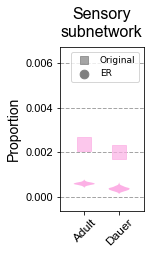

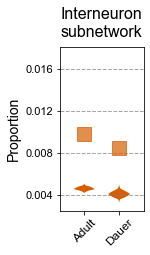

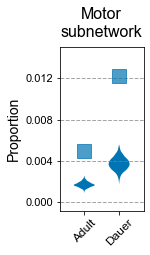

In [115]:
# (plot) adult mean

L = ["Adult","Dauer"]
ER_a = 1.0; msize=14; bw=0.6; fsz=12; yfsz=11


fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(1.5,3.0))
# sensory
xpos = [1,2]
ax1.set_title("Sensory\nsubnetwork", y=1.03, fontsize=16, fontname='Arial')
ax1.plot(xpos[0], adults_ss_tri_mean, marker='s', ms=msize, color='#FCB0E5', alpha=0.7)
ax1.plot(xpos[1], dauer_ss_tri_adj, marker='s', ms=msize, color='#FCB0E5', alpha=0.7)

violin = ax1.violinplot([adults_ss_tri_cER_mean,dauer_ss_tri_violin_adj_cER],\
                        positions=xpos, widths=bw, showmeans=False,\
                        showextrema=False, showmedians=False, quantiles=None, points=100)
violin['bodies'][0].set_facecolor('#FCB0E5'); violin['bodies'][1].set_facecolor('#FCB0E5')
violin['bodies'][0].set_alpha(ER_a); violin['bodies'][1].set_alpha(ER_a)

ax1.scatter(-10,-10, marker='s', s=75, color='tab:gray', alpha=0.7, label='Original')
ax1.scatter(-10,-10, marker='o', s=75, color='tab:gray', alpha=ER_a, label='ER')
ax1.legend(bbox_to_anchor=(1.0, 1.0), loc='upper right', fontsize=9)

ax1.set_ylabel('Proportion', fontsize=14, fontname='Arial')
ax1.yaxis.grid(True, color='tab:gray', alpha=0.7, linestyle='dashed', linewidth=1)
ax1.set_yticks(np.arange(0,0.0065,0.002))
ax1.set_yticklabels(["0.000","0.002","0.004","0.006"], fontsize=yfsz, fontname='Arial')
ax1.set_xlim(0.3, 2.7)
ax1.set_ylim(-0.0006, 0.0067)
ax1.set_xticks(xpos)
ax1.set_xticklabels(L, fontsize=fsz, rotation=45, fontname='Arial')

# plt.savefig(r'D:\fig_6b1.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(1.5,3.0))
# inter
ax1.set_title("Interneuron\nsubnetwork", y=1.03, fontsize=16, fontname='Arial')
ax1.plot(xpos[0], adults_ii_tri_mean, marker='s', ms=msize, color='#D65E00', alpha=0.7)
ax1.plot(xpos[1], dauer_ii_tri_adj, marker='s', ms=msize, color='#D65E00', alpha=0.7)

violin = ax1.violinplot([adults_ii_tri_cER_mean,dauer_ii_tri_violin_adj_cER],\
                        positions=xpos, widths=bw, showmeans=False,\
                        showextrema=False, showmedians=False, quantiles=None, points=100)
violin['bodies'][0].set_facecolor('#D65E00'); violin['bodies'][1].set_facecolor('#D65E00')
violin['bodies'][0].set_alpha(ER_a); violin['bodies'][1].set_alpha(ER_a)

ax1.set_ylabel('Proportion', fontsize=14, fontname='Arial')
ax1.yaxis.grid(True, color='tab:gray', alpha=0.7, linestyle='dashed', linewidth=1)
ax1.set_yticks(np.arange(0,0.017,0.004))
ax1.set_yticklabels(["0.000","0.004","0.008","0.012","0.016"], fontsize=yfsz, fontname='Arial')
ax1.set_xlim(0.3, 2.7)
ax1.set_ylim(0.0025, 0.018)
ax1.set_xticks(xpos)
ax1.set_xticklabels(L, fontsize=fsz, rotation=45, fontname='Arial')

# plt.savefig(r'D:\fig_6b2.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


fig, ((ax1)) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(1.5,3.0))
# motor
ax1.set_title("Motor\nsubnetwork", y=1.03, fontsize=16, fontname='Arial')
ax1.plot(xpos[0], adults_mm_tri_mean, marker='s', ms=msize, color='#0174B3', alpha=0.7)
ax1.plot(xpos[1], dauer_mm_tri_adj, marker='s', ms=msize, color='#0174B3', alpha=0.7)

violin = ax1.violinplot([adults_mm_tri_cER_mean,dauer_mm_tri_violin_adj_cER],\
                        positions=xpos, widths=bw, showmeans=False,\
                        showextrema=False, showmedians=False, quantiles=None, points=100)
violin['bodies'][0].set_facecolor('#0174B3'); violin['bodies'][1].set_facecolor('#0174B3')
violin['bodies'][0].set_alpha(ER_a); violin['bodies'][1].set_alpha(ER_a)

ax1.set_ylabel('Proportion', fontsize=14, fontname='Arial')
ax1.yaxis.grid(True, color='tab:gray', alpha=0.7, linestyle='dashed', linewidth=1)
ax1.set_yticks(np.arange(0,0.015,0.004))
ax1.set_yticklabels(["0.000","0.004","0.008","0.012"], fontsize=yfsz, fontname='Arial')
ax1.set_xlim(0.3, 2.7)
ax1.set_ylim(-0.0008, 0.015)
ax1.set_xticks(xpos)
ax1.set_xticklabels(L, fontsize=fsz, rotation=45, fontname='Arial')

# plt.savefig(r'D:\fig_6b3.svg', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()


---
---